In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [2]:
# read in the new cleaned datasheet
df = pd.read_excel('..\Data Cleanup\cleaned_data.xlsx', sheet_name = 'master')

Reference   AppMethod  \
97   Schnabel 2014 Inactivation of Vegetative Micro...  fumigation   
98   Schnabel 2014 Inactivation of Vegetative Micro...  fumigation   
99   Schnabel 2014 Inactivation of Vegetative Micro...  fumigation   
100  Schnabel 2014 Inactivation of Vegetative Micro...  fumigation   
101  Schnabel 2014 Inactivation of Vegetative Micro...  fumigation   

                   Surface  Loading LoadingUn  LPosRec   Area AreaUn  \
97   Glass Bottle Interior  40000.0  CFU/cm^3      NaN  250.0   cm^3   
98   Glass Bottle Interior  40000.0  CFU/cm^3      NaN  250.0   cm^3   
99   Glass Bottle Interior  40000.0  CFU/cm^3      NaN  250.0   cm^3   
100  Glass Bottle Interior  40000.0  CFU/cm^3      NaN  250.0   cm^3   
101  Glass Bottle Interior  40000.0  CFU/cm^3      NaN  250.0   cm^3   

     ConcDose ConcDoseUn   ...    Pavement  Water  Soil  OutdoorMisc  \
97     7700.0          J   ...           0      0     0            0   
98     7700.0          J   ...           0      0     0            0   
99     7700.0          J   ...           0      0     0            0   
100    7700.0          J   ...           0      0     0            0   
101    7700.0          J   ...           0      0     0            0   

     UndergroundInterior UndergroundCarpet  UndergroundNonCarpet  \
97                     0                 0                     0   
98                     0                 0                     0   
99                     0                 0                     0   
100                    0                 0                     0   
101                    0                 0                     0   

     UndergroundCeilings  UndergroundMisc TotalApp  
97                     0                0        1  
98                     0                0        1  
99                     0                0        1  
100                    0                0        1  
101                    0                0        1  

[5 rows x 48 columns]

In [3]:
params = [
    ("surfaceCategory", "IndoorInterior", "Interior Walls"),
    ("surfaceCategory", "IndoorExterior", "Exterior Walls"),
    ("surfaceCategory", "Carpet", "Carpeted Flooring"),
    ("surfaceCategory", "NonCarpet", "Non-Carpeted Flooring"),
    ("surfaceCategory", "Ceilings", "Ceiling"),
    ("surfaceCategory", "HVAC", "HVAC and Duct Work"),
    ("surfaceCategory", "Misc", "Miscellaneous"),
    ("appMeth", "liquid spray", "Liquid Spray"),
    ("appMeth", "foam spray", "Foam Spray"),
    ("appMeth", "physical", "Physical"),
    ("appMeth", "fumigation", "Fumigation"),
    ("appMeth", "fogging", "Fogging"),
    ("appMeth", "aerosol", "Aerosol"),
    ("appMeth", "liquid wipe", "Liquid Wipe")
]

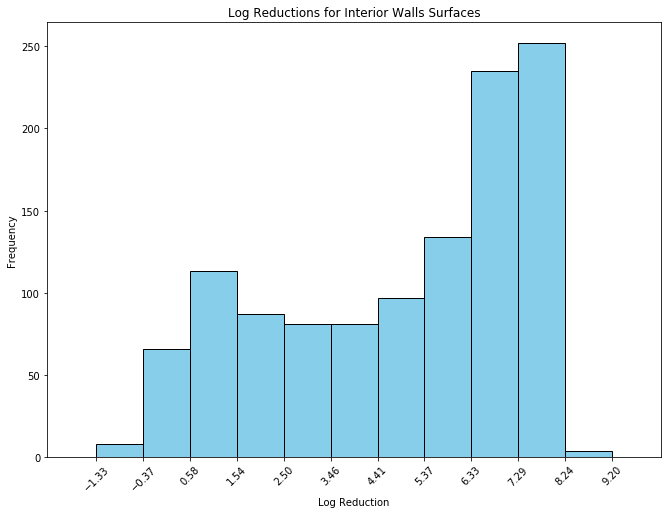

1165


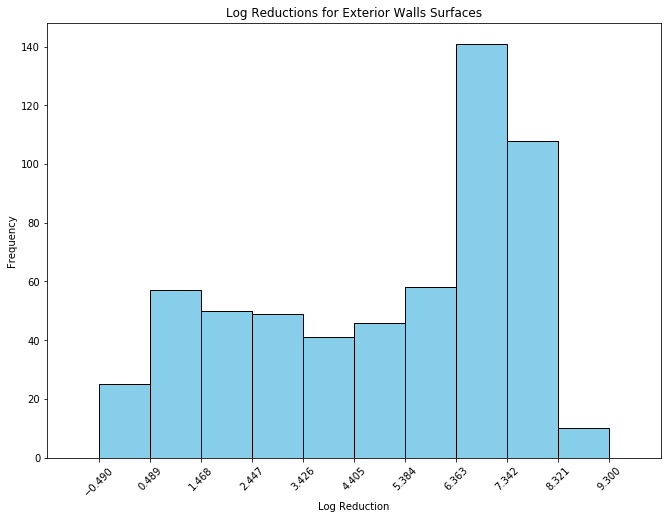

589


KeyError: 'Carpet'

<Figure size 792x576 with 0 Axes>

In [4]:
# histograms of LR for all application methods and surface categories
def LRHistograms(parameterColumn, columnLabel, title):

    if parameterColumn == 'surfaceCategory':
        
        plt.figure(figsize=(11,8))
    
        valid_data = df[(df[columnLabel] == 1) & (df['EffMeas'] == 'LR')]
    
        binSize = round(1 + (3.322 * math.log10(len(valid_data.index))))
    
        counts, bins, bars = plt.hist(x = valid_data.Eff.dropna(), bins=binSize, color='skyblue', edgecolor='black')

        plt.xlim(valid_data['Eff'].min() - 1, valid_data['Eff'].max() + 1)
        plt.xticks(bins)
        plt.xlabel('Log Reduction')
        plt.ylabel('Frequency')
    
        plt.xticks(rotation=45, fontsize=10)
    
        plt.title('Log Reductions for ' + title + ' Surfaces')
    
        plt.show()
        print(len(valid_data))
        
    elif parameterColumn == 'appMeth':
        
        plt.figure(figsize=(11,8))
    
        valid_data = df[(df['AppMethod'] == columnLabel) & (df['EffMeas'] == 'LR')]
    
        binSize = round(1 + (3.322 * math.log10(len(valid_data.index))))
    
        counts, bins, bars = plt.hist(x = valid_data.Eff.dropna(), bins=binSize, color='skyblue', edgecolor='black')

        plt.xlim(valid_data['Eff'].min() - 1, valid_data['Eff'].max() + 1)
        plt.xticks(bins)
        plt.xlabel('Log Reduction')
        plt.ylabel('Frequency')
    
        plt.xticks(rotation=45, fontsize=10)
    
        plt.title('Log Reductions for ' + title)
    
        plt.show()
        print(len(valid_data))
        
for p in params:
    LRHistograms(*p)

In [48]:
params = [
    ("surfaceCategory", "Interior Walls", "InteriorWalls", "CFU/cm^2"),
    ("surfaceCategory", "Interior Walls", "InteriorWalls", "CFU/cm^3"),
    ("surfaceCategory", "Exterior Walls", "ExteriorWalls", "CFU/cm^2"),
    ("surfaceCategory", "Exterior Walls", "ExteriorWalls", "CFU/cm^3"),
    ("surfaceCategory", "Carpeted Flooring", "Carpet", "CFU/cm^2"),
    ("surfaceCategory", "Carpeted Flooring", "Carpet", "CFU/cm^3"),
    ("surfaceCategory", "Non-Carpeted Flooring", "NonCarpet", "CFU/cm^2"),
    ("surfaceCategory", "Non-Carpeted Flooring", "NonCarpet", "CFU/cm^3"),
    ("surfaceCategory", "Ceiling", "Ceilings", "CFU/cm^2"),
    ("surfaceCategory", "Ceiling", "Ceilings", "CFU/cm^3"),
    ("surfaceCategory", "HVAC and Duct Work", "HVAC", "CFU/cm^2"),
    ("surfaceCategory", "HVAC and Duct Work", "HVAC", "CFU/cm^3"),
    ("surfaceCategory", "Miscellaneous", "Misc", "CFU/cm^2"),
    ("surfaceCategory", "Miscellaneous", "Misc", "CFU/cm^3"),
    ("appMeth", "Liquid Spray", "liquid spray", "CFU/cm^2"),
    ("appMeth", "Liquid Spray", "liquid spray", "CFU/cm^3"),
    ("appMeth", "Foam Spray", "foam spray", "CFU/cm^2"),
    ("appMeth", "Foam Spray", "foam spray", "CFU/cm^3"),
    ("appMeth", "Physical", "physical", "CFU/cm^2"),
    ("appMeth", "Physical", "physical", "CFU/cm^3"),
    ("appMeth", "Fogging", "fogging", "CFU/cm^2"),
    ("appMeth", "Fogging", "fogging", "CFU/cm^3"),
    ("appMeth", "Fumigation", "fumigation", "CFU/cm^2"),
    ("appMeth", "Fumigation", "fumigation", "CFU/cm^3"),
    ("appMeth", "Aerosol", "aerosol", "CFU/cm^2"),
    ("appMeth", "Aerosol", "aerosol", "CFU/cm^3"),
    ("appMeth", "Liquid Wipe", "liquid wipe", "CFU/cm^2"),
    ("appMeth", "Liquid Wipe", "liquid wipe", "CFU/cm^3")
]

1011


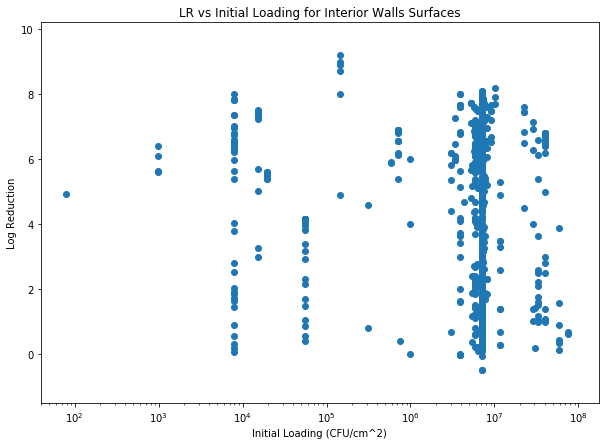

525


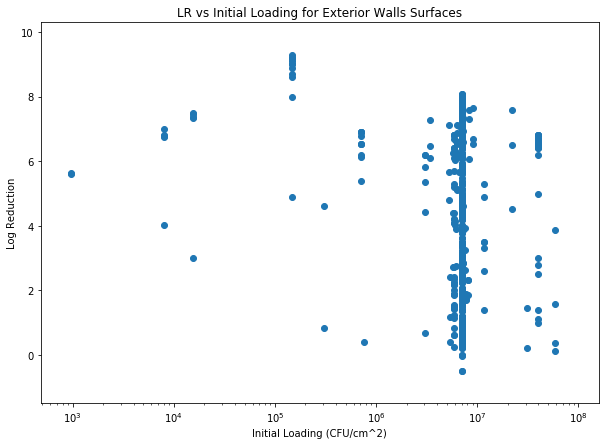

342


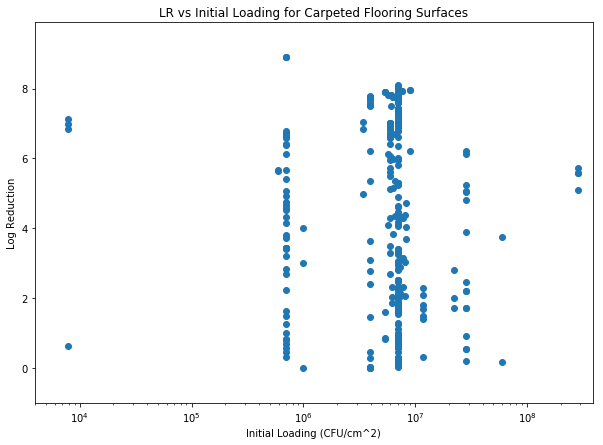

808


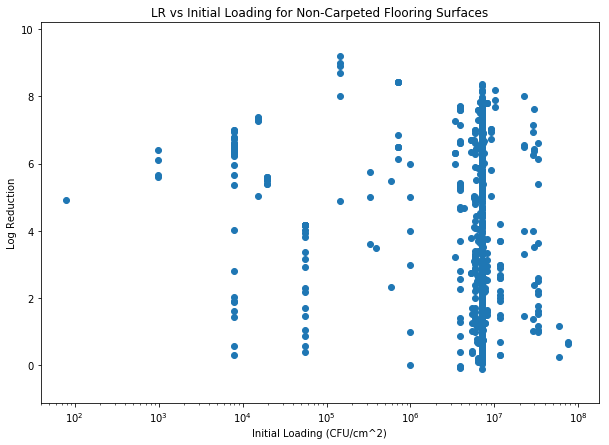

428


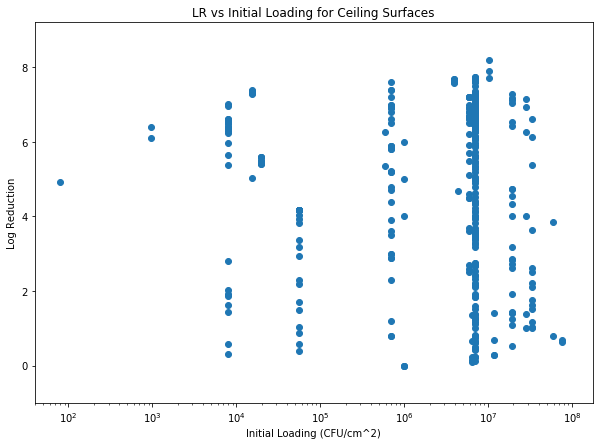

446


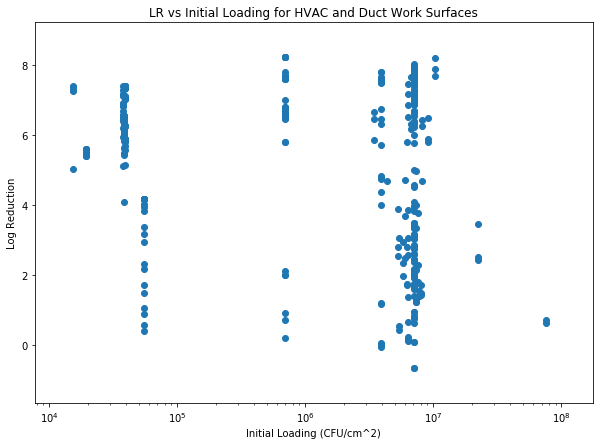

184


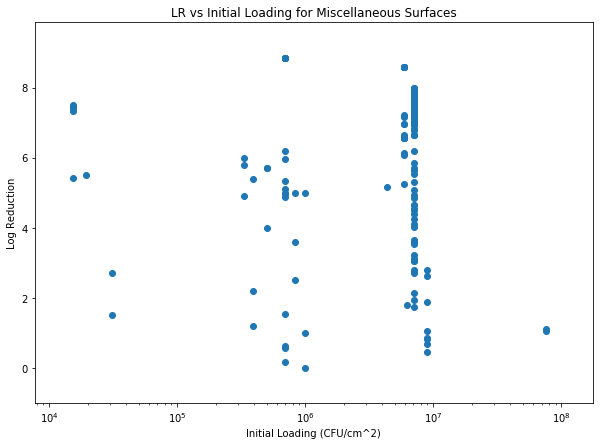

669


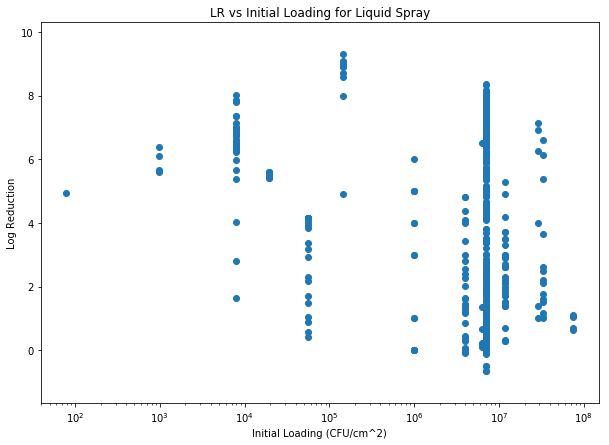

59


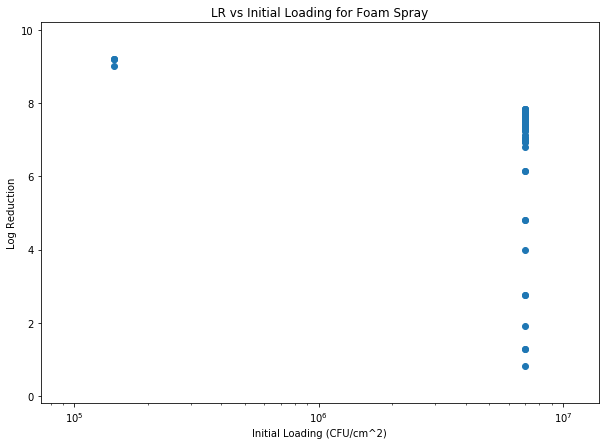

47


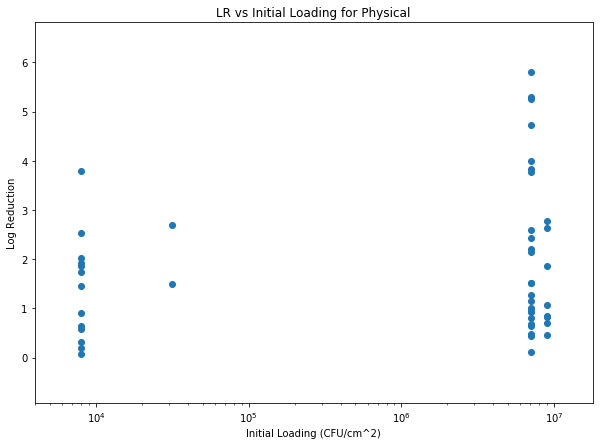

16


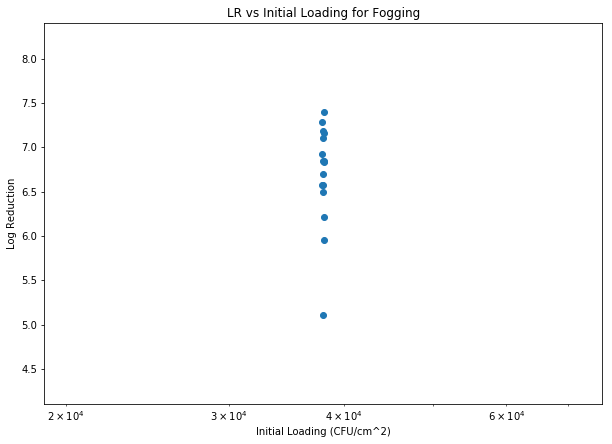

1732


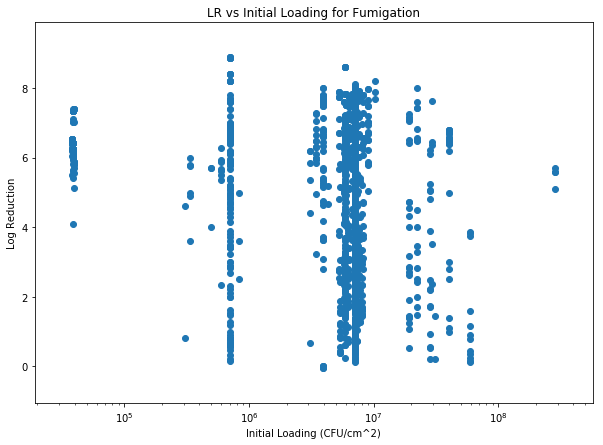

5


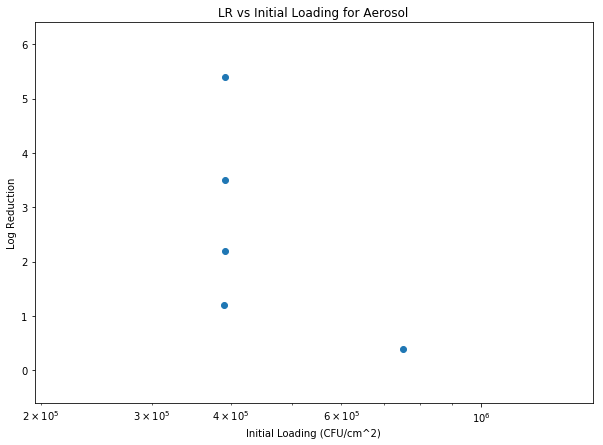

20


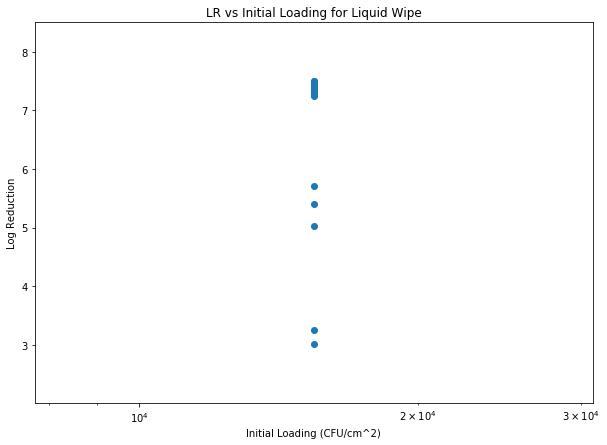

In [49]:
# scatter plots of LR vs Loading for the surface categories and the application methods
def LRScatter(parameterColumn, title, columnLabel, units):
    
    if parameterColumn == 'surfaceCategory':
        valid_data = df[(df['EffMeas'] == 'LR') & ( df['LoadingUn'] == units) & (df[columnLabel] == 1)]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.Loading, valid_data.Eff)

            plt.ylim(valid_data['Eff'].min() - 1, valid_data['Eff'].max() + 1)
            plt.xlim(valid_data['Loading'].min() - (0.5 * valid_data['Loading'].min()), valid_data['Loading'].max() + 100000000)

            plt.xscale('log')

            plt.ylabel('Log Reduction')
            plt.xlabel('Initial Loading (' + units + ')')

            plt.title('LR vs Initial Loading for ' + title + ' Surfaces')

            plt.show()
    
    elif parameterColumn == 'appMeth':
        valid_data = df[(df['EffMeas'] == 'LR') & ( df['LoadingUn'] == units) & (df['AppMethod'] == columnLabel)]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.Loading, valid_data.Eff)

            plt.ylim(valid_data['Eff'].min() - 1, valid_data['Eff'].max() + 1)
            plt.xlim(valid_data['Loading'].min() - (0.5 * valid_data['Loading'].min()), valid_data['Loading'].max() + valid_data['Loading'].max())

            plt.xscale('log')

            plt.ylabel('Log Reduction')
            plt.xlabel('Initial Loading (' + units + ')')

            plt.title('LR vs Initial Loading for ' + title)

            plt.show()
        
for p in params:
    LRScatter(*p)

Text(0,0.5,'Number of Records')

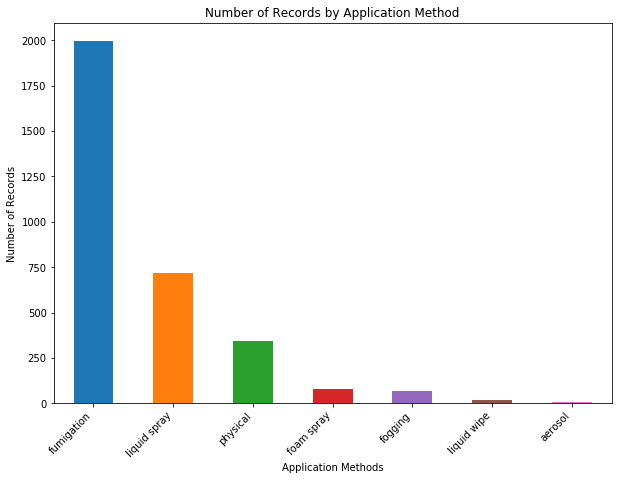

In [45]:
# bar graph of number of records for all application methods
ax = df['AppMethod'].value_counts().plot(kind='bar', figsize=(10,7), title="Number of Records by Application Method")

plt.xticks(rotation=45, ha='right')

ax.set_xlabel("Application Methods")
ax.set_ylabel("Number of Records")

Text(0.5,1,'Number of Records by Surface Category')

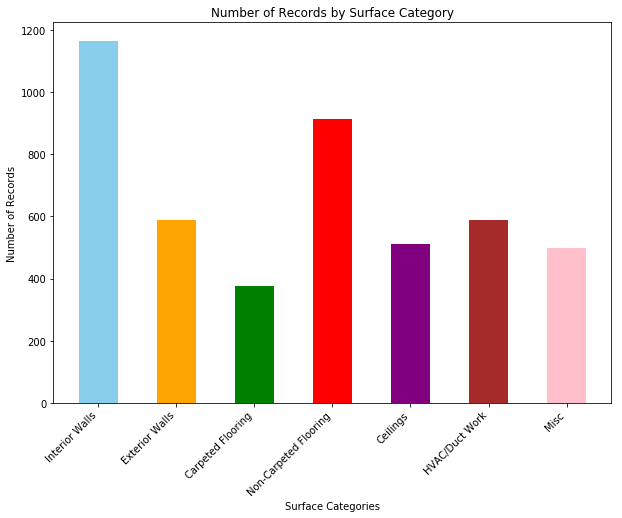

In [46]:
# bar graph of number of records for all surface categories
categoryBreakdown = [('Interior Walls', len(df[(df['InteriorWalls'] == 1)])),
                    ('Exterior Walls', len(df[(df['ExteriorWalls'] == 1)])),
                    ('Carpeted Flooring', len(df[(df['Carpet'] == 1)])),
                    ('Non-Carpeted Flooring', len(df[(df['NonCarpet'] == 1)])),
                    ('Ceilings', len(df[(df['Ceilings'] == 1)])),
                    ('HVAC/Duct Work', len(df[(df['HVAC'] == 1)])),
                    ('Misc', len(df[(df['Misc'] == 1)]))]

labels, ys = zip(*categoryBreakdown)

xs = np.arange(len(labels))

plt.figure(figsize=(10,7))
plt.bar(xs, ys, width=0.5, align='center', color=['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])

plt.xticks(xs, labels, rotation=45, ha='right')

plt.xlabel("Surface Categories")
plt.ylabel("Number of Records")
plt.title('Number of Records by Surface Category')

In [5]:
deconAgents = df.DeconAgent.unique().tolist()

5


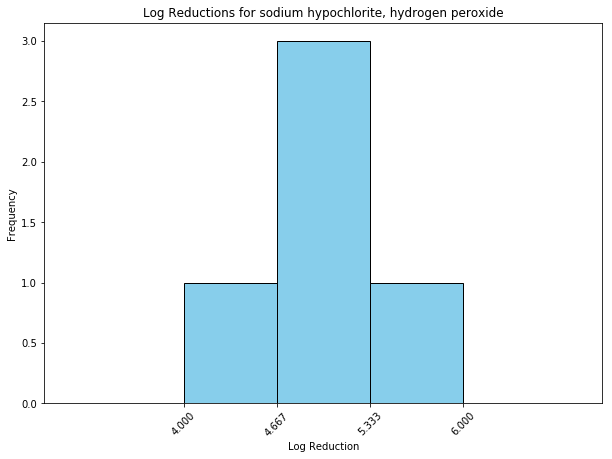

203


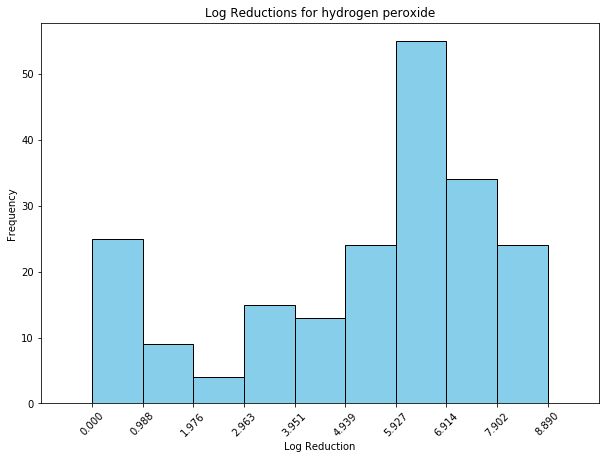

36


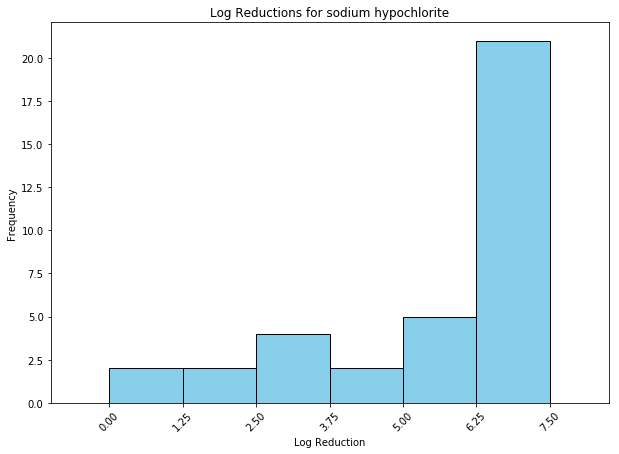

23


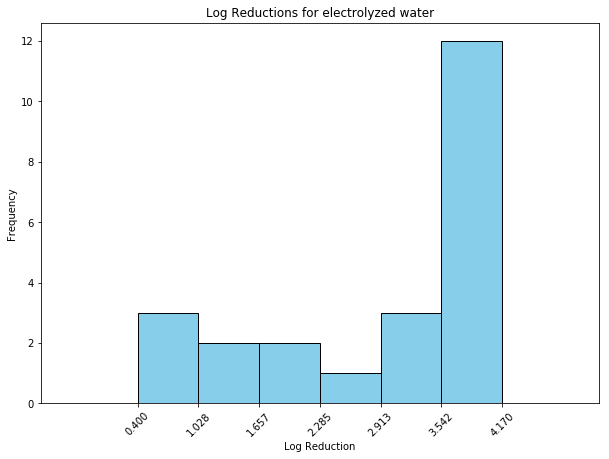

307


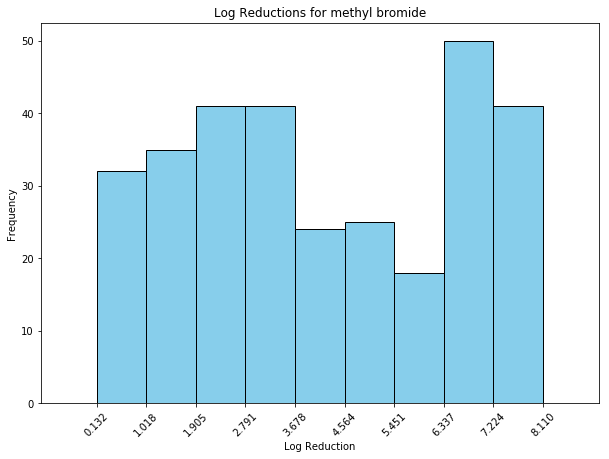

576


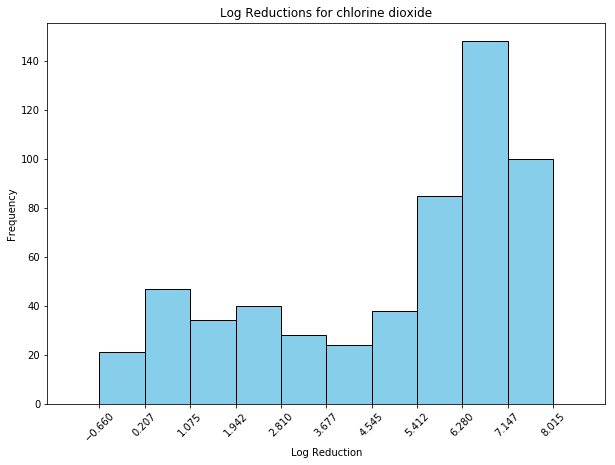

123


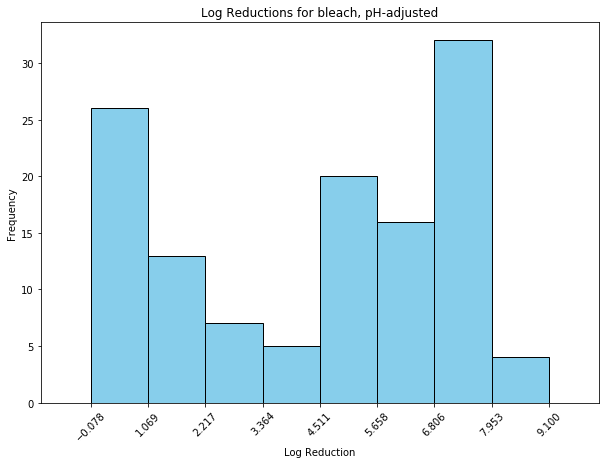

4


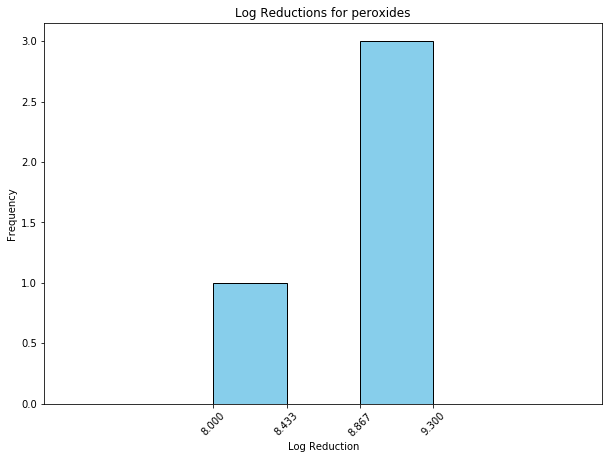

4


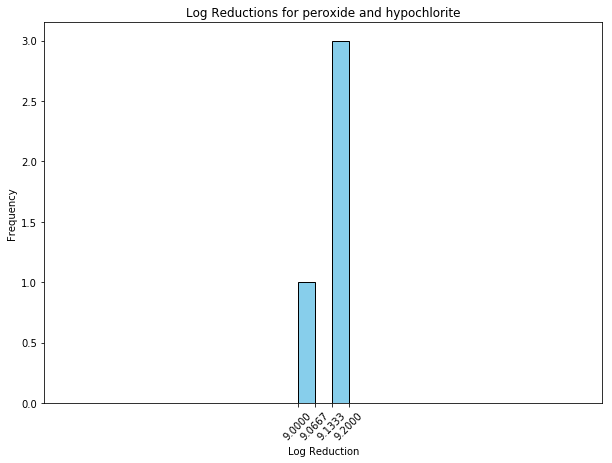

16


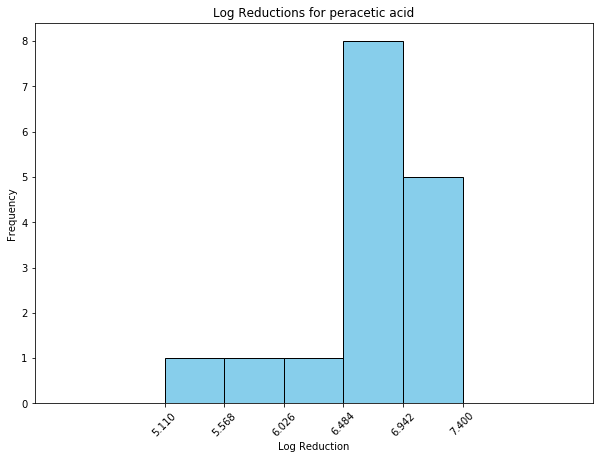

28


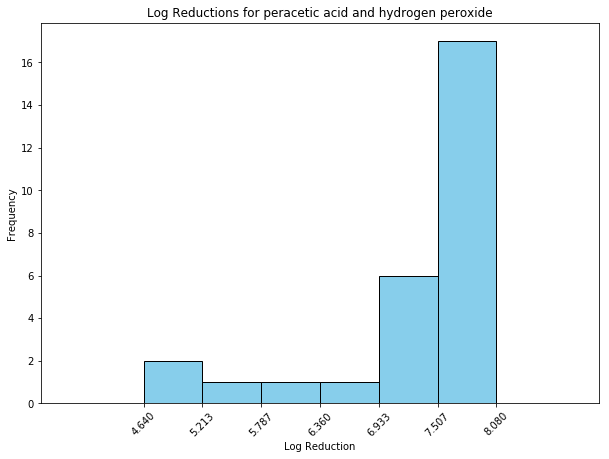

37


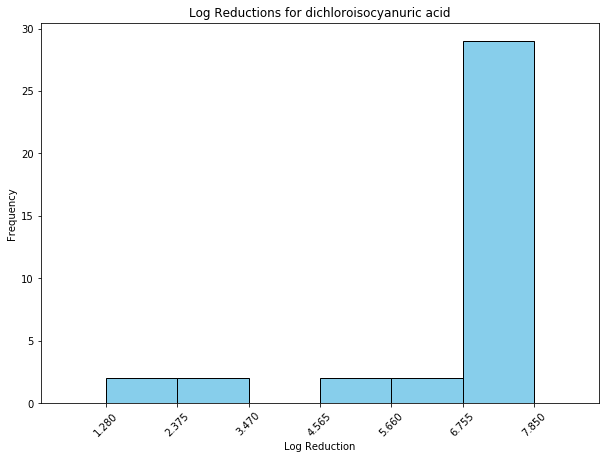

11


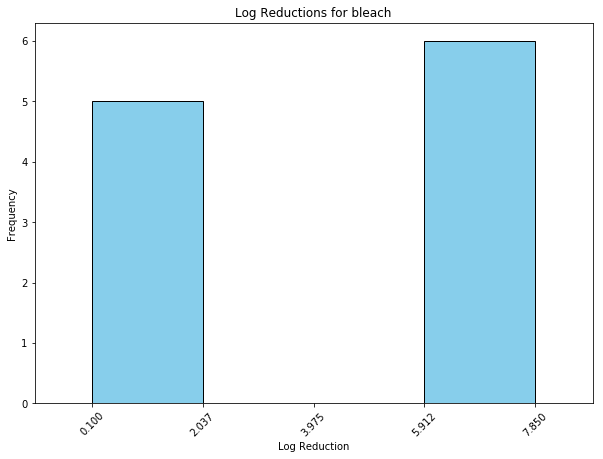

2


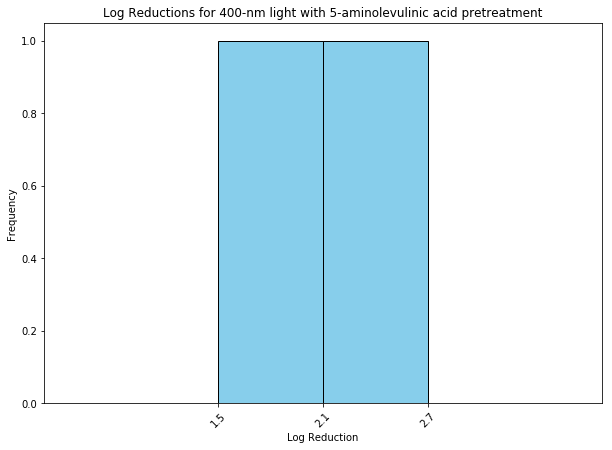

18


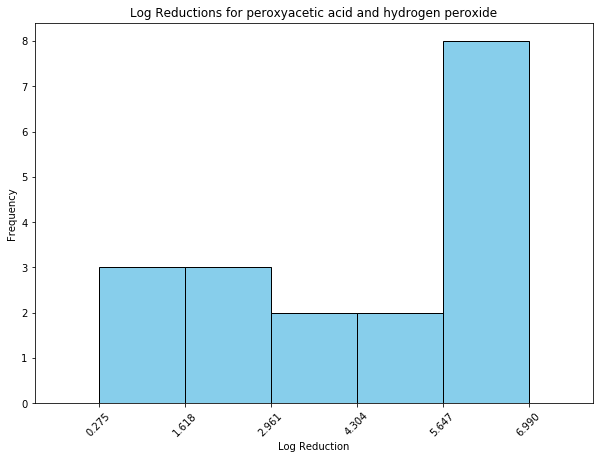

8


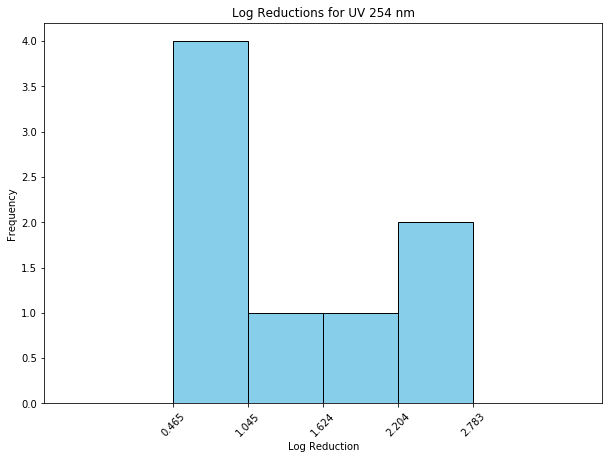

3


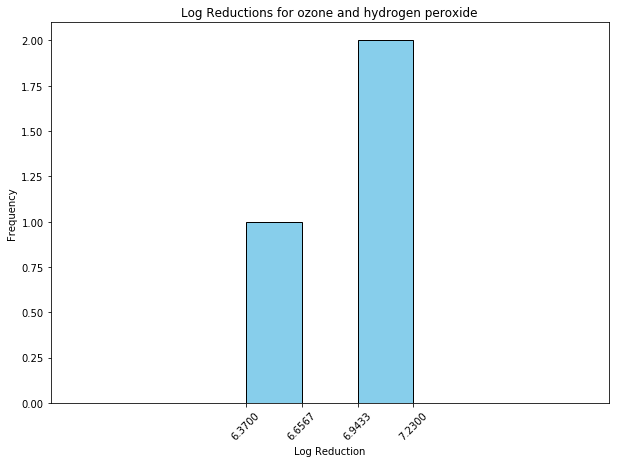

354


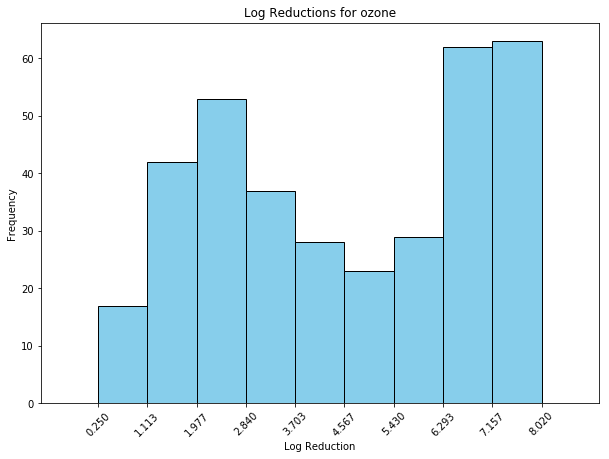

3


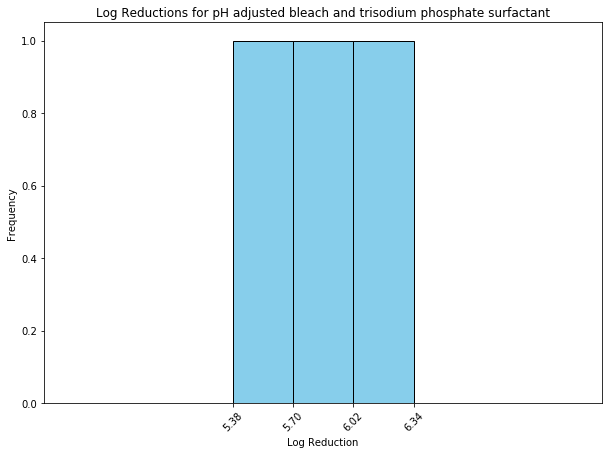

12


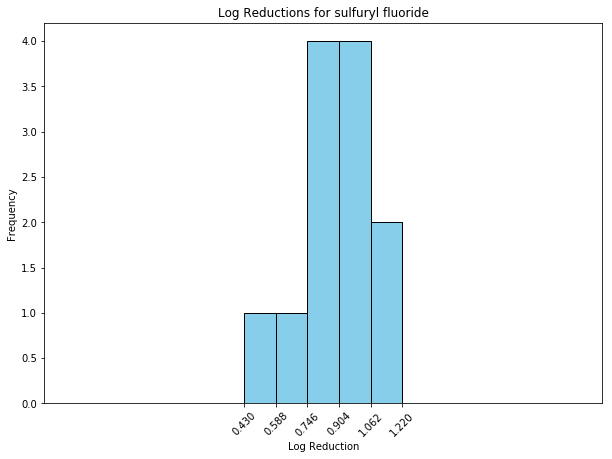

72


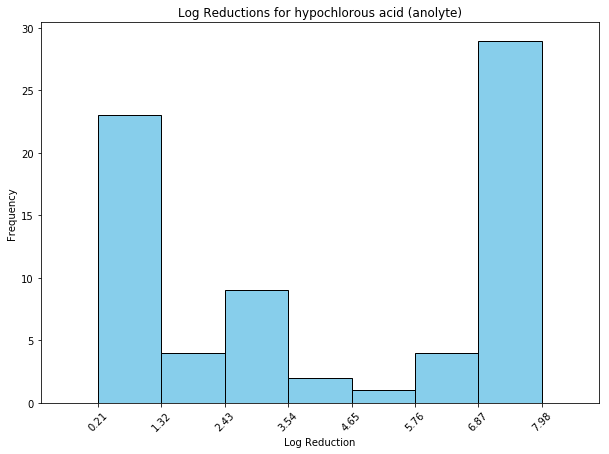

24


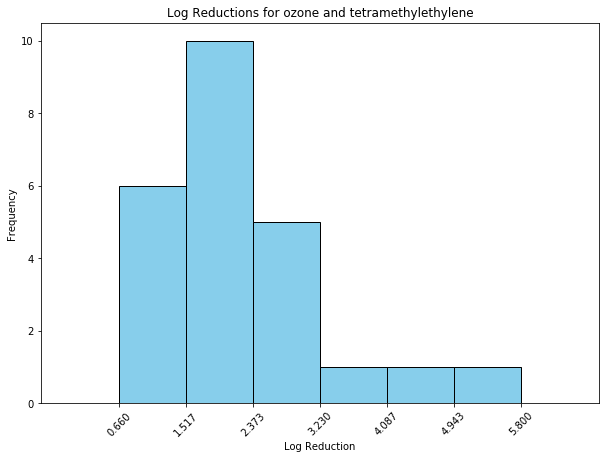

23


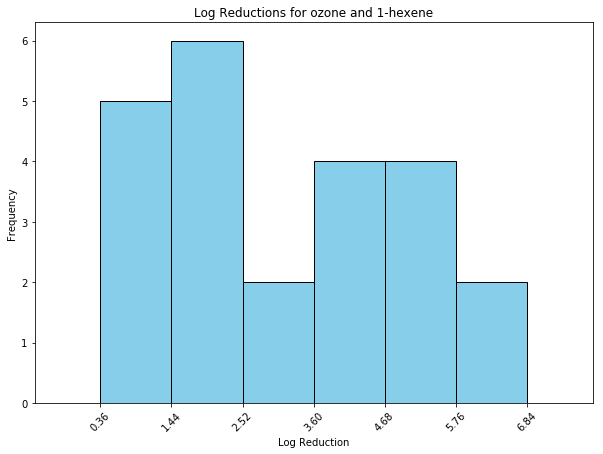

5


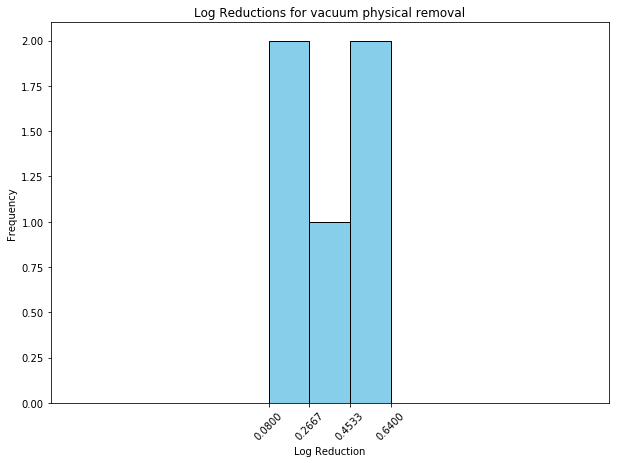

6


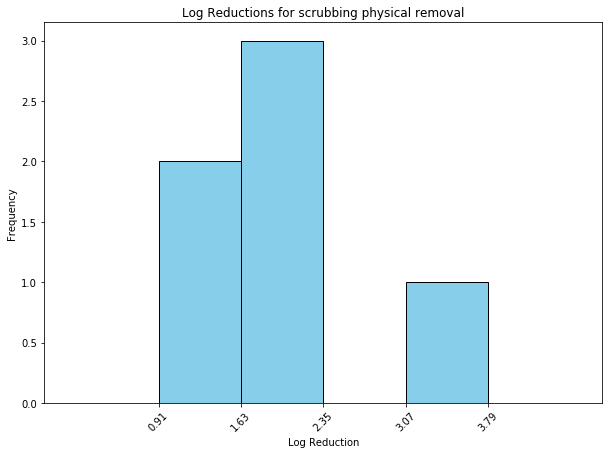

2


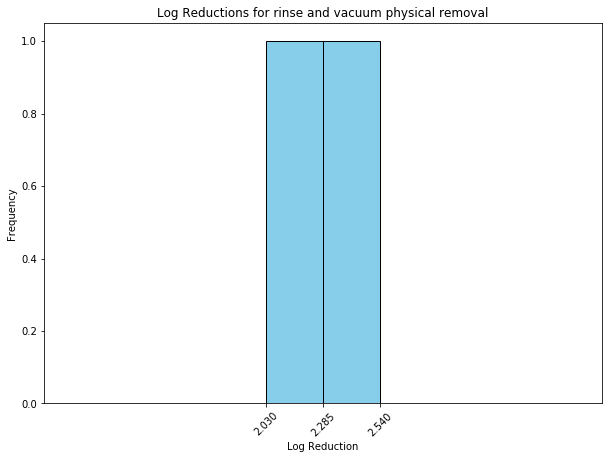

190


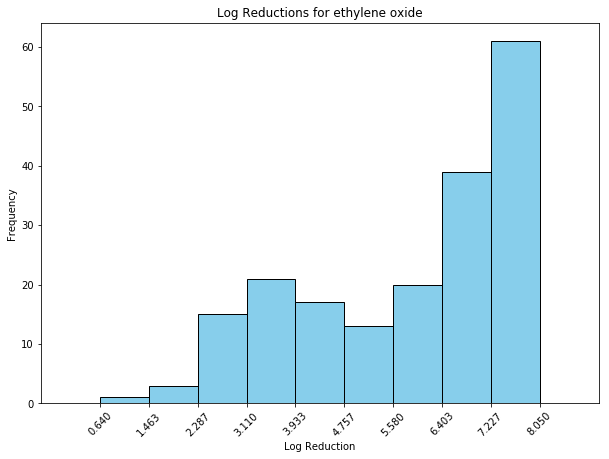

32


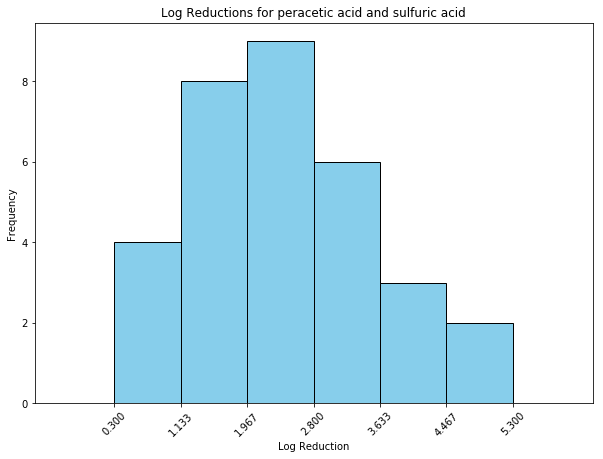

168


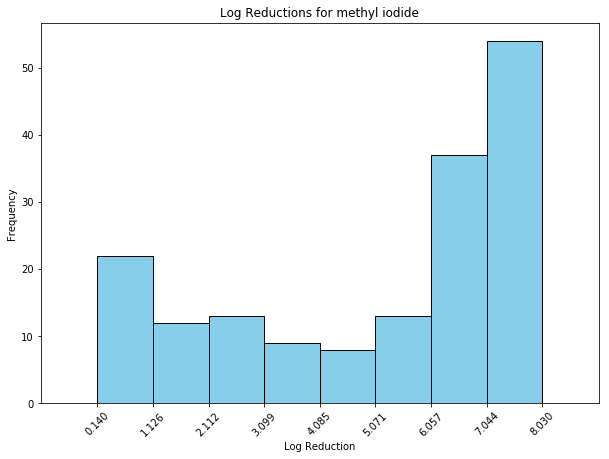

9


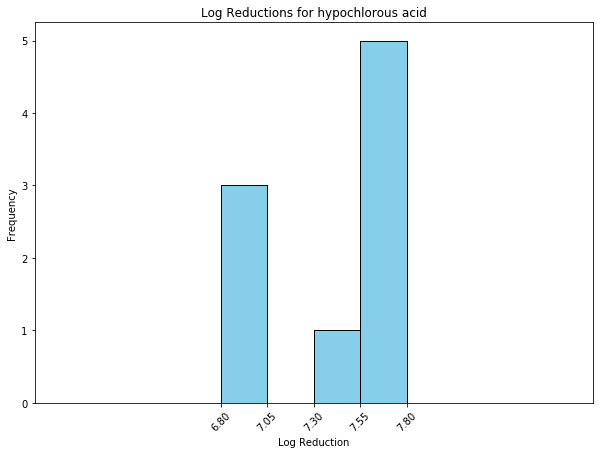

18


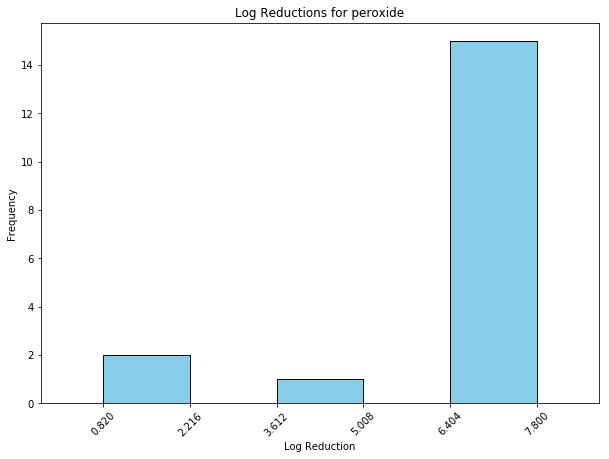

18


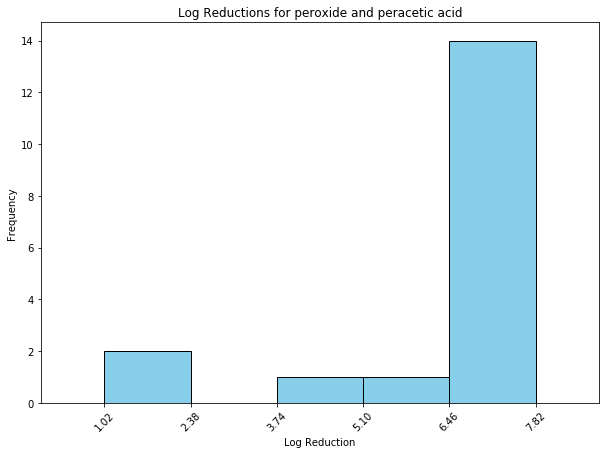

77


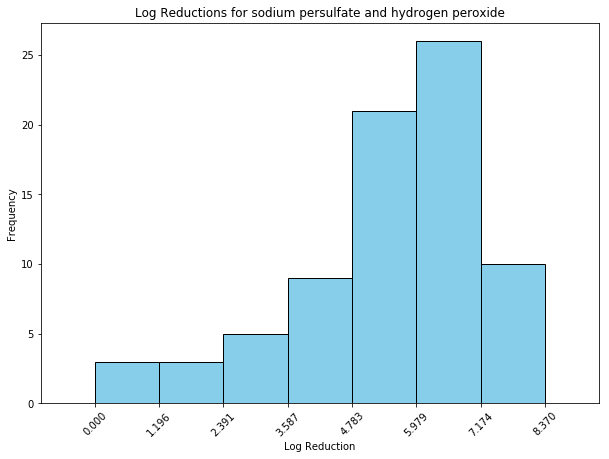

51


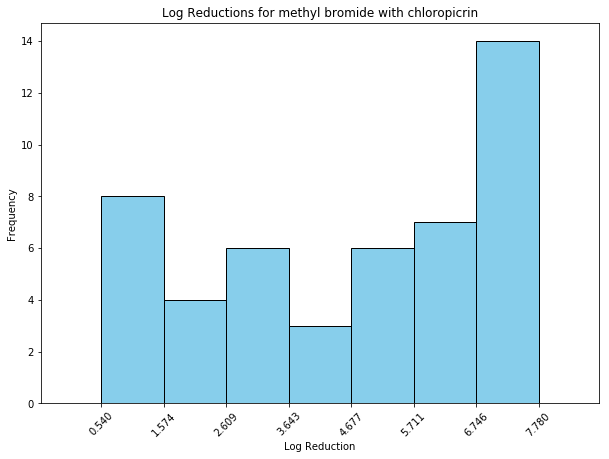

6


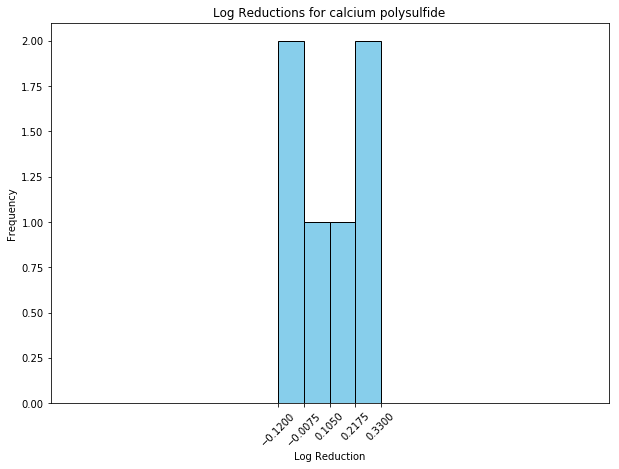

29


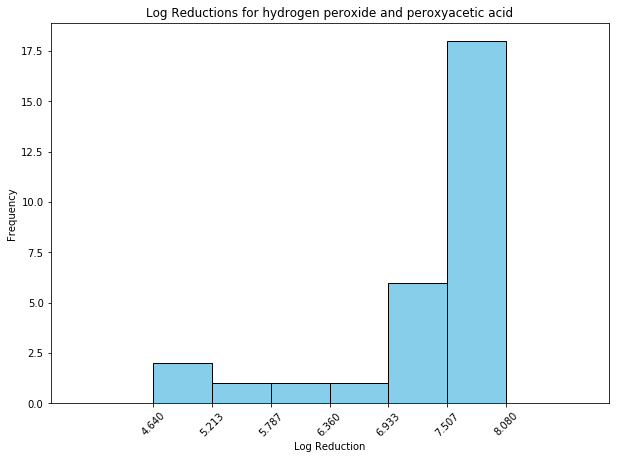

18


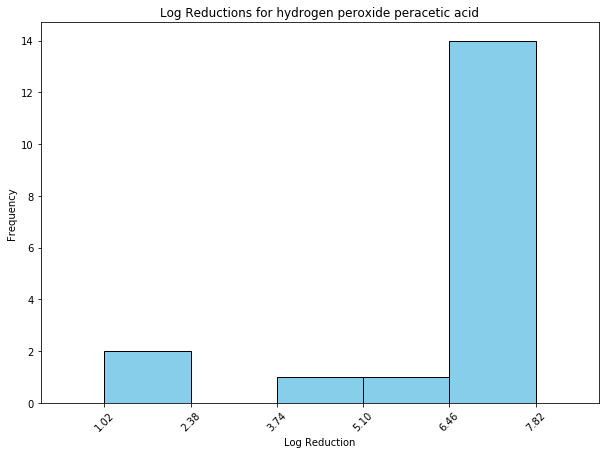

1


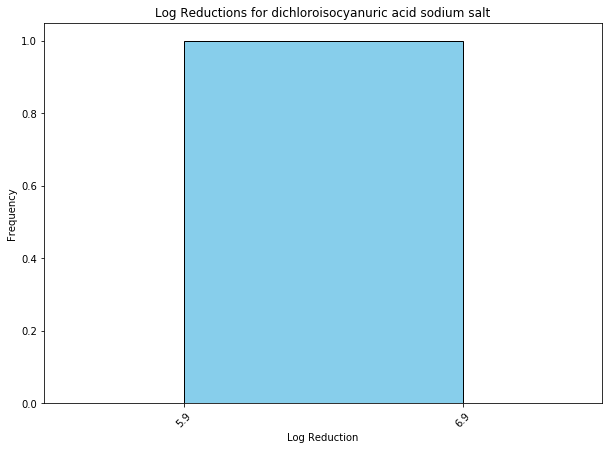

1


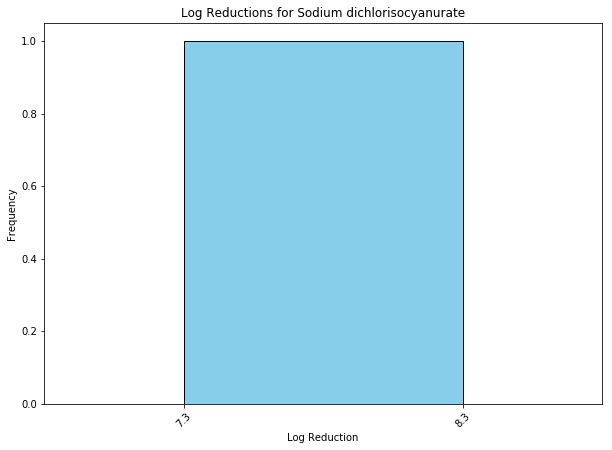

1


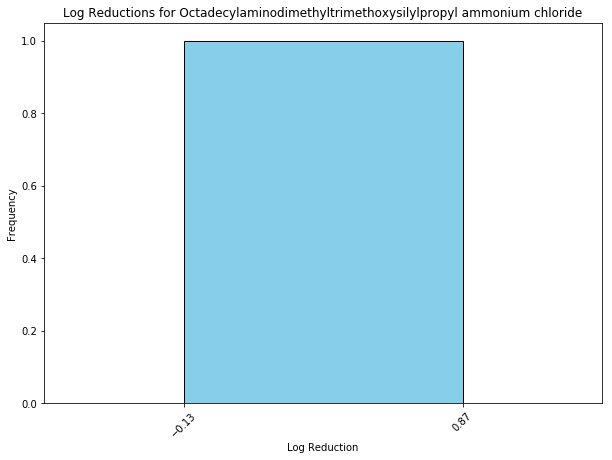

24


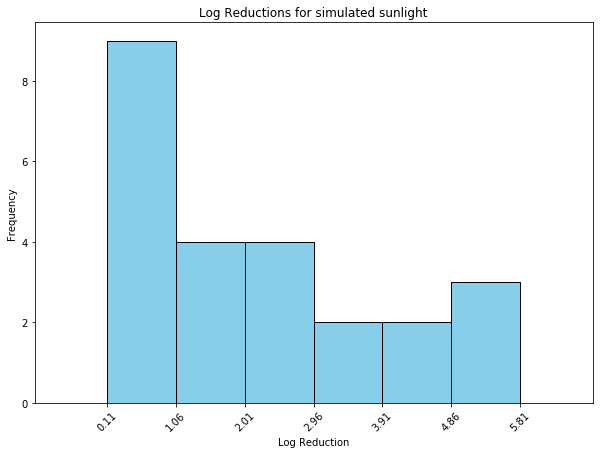

In [30]:
# histograms of LR for all decon agents
for i in deconAgents:
    
    valid_data = df[(df['EffMeas'] == 'LR') & (df['DeconAgent'] == i)]
    
    if len(valid_data) > 0:
        print(len(valid_data))
        
        plt.figure(figsize=(10,7))
        
        binSize = round(1 + (3.322 * math.log10(len(valid_data.index))))
    
        counts, bins, bars = plt.hist(x = valid_data.Eff.dropna(), bins=binSize, color='skyblue', edgecolor='black')

        plt.xlim(valid_data['Eff'].min() - 1, valid_data['Eff'].max() + 1)
        plt.xticks(bins)
        plt.xlabel('Log Reduction')
        plt.ylabel('Frequency')
    
        plt.xticks(rotation=45, fontsize=10)
    
        plt.title('Log Reductions for ' + i)
    
        plt.show()
        

5


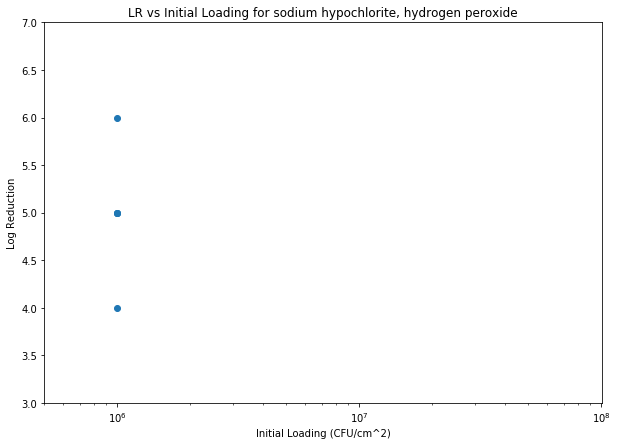

186


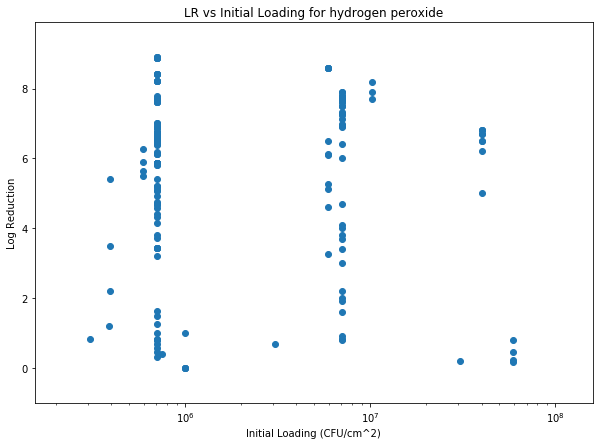

25


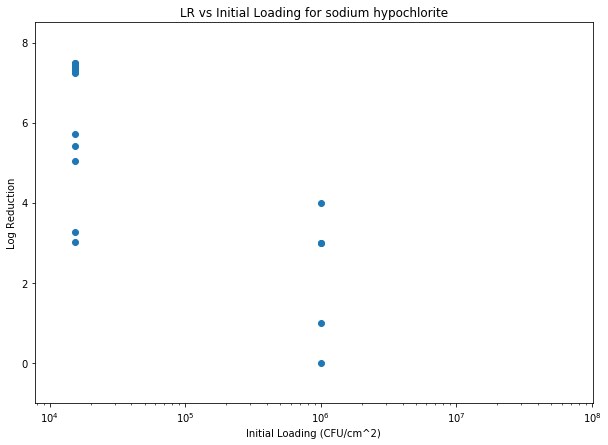

23


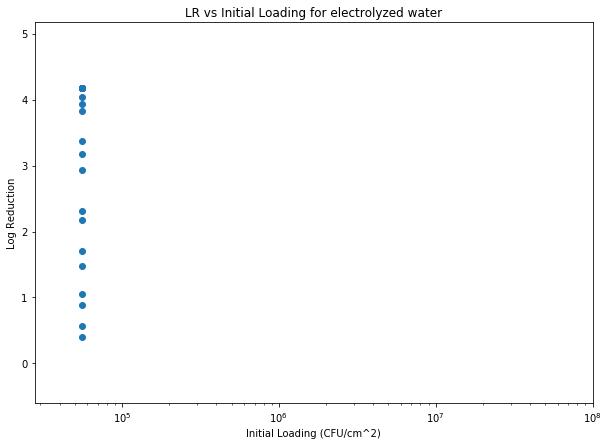

307


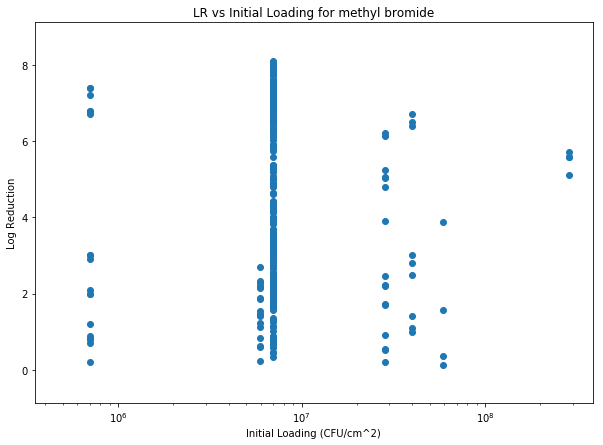

576


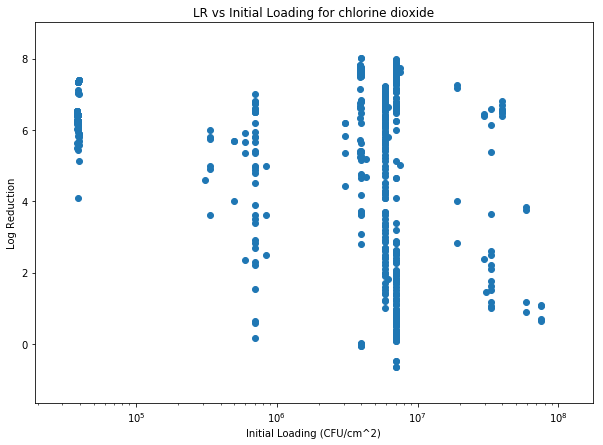

123


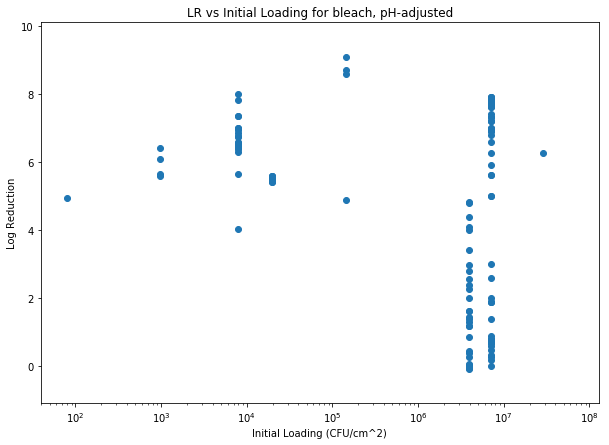

4


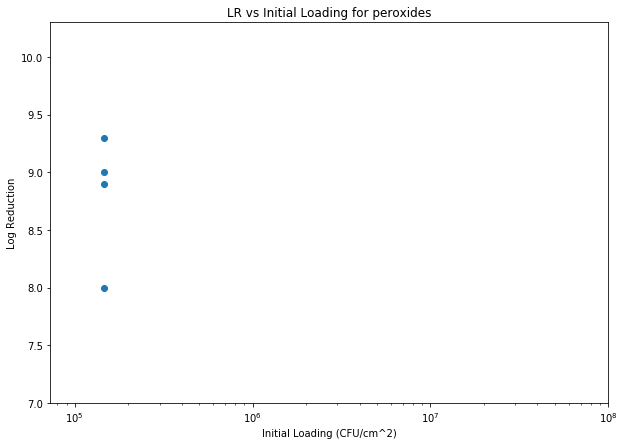

4


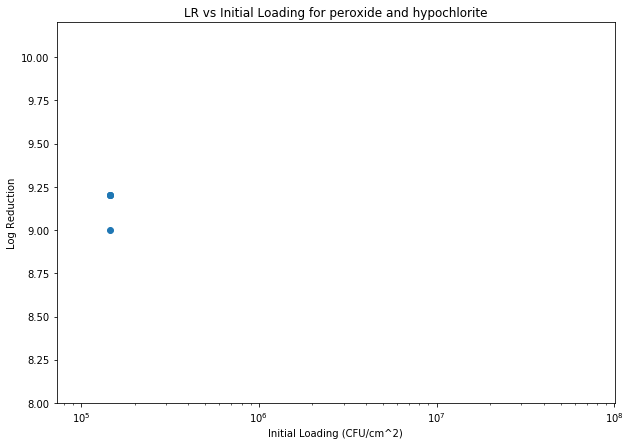

16


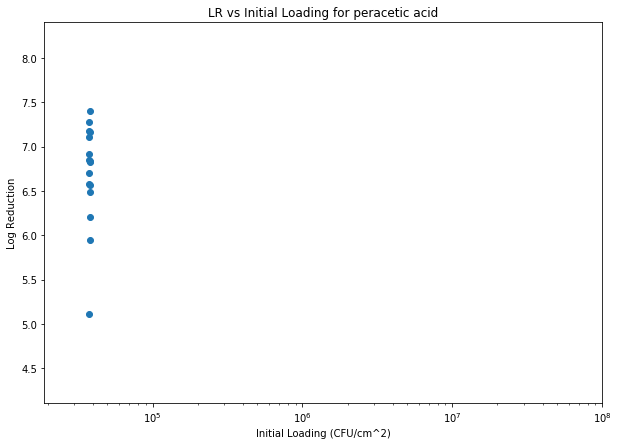

28


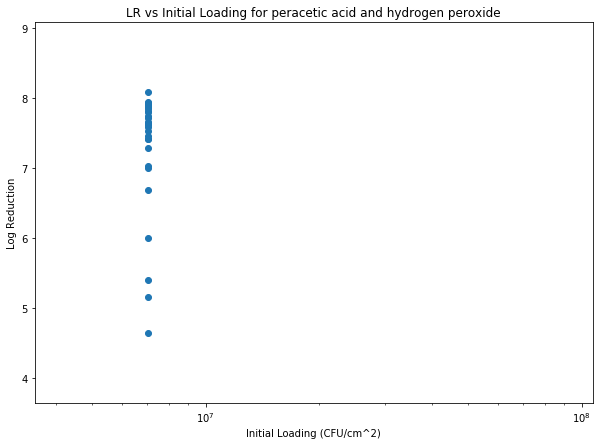

37


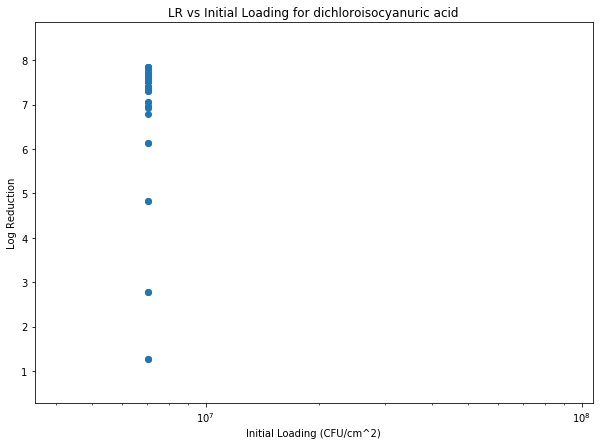

11


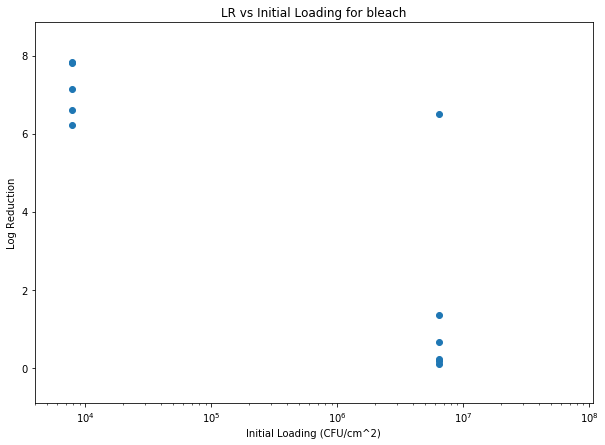

2


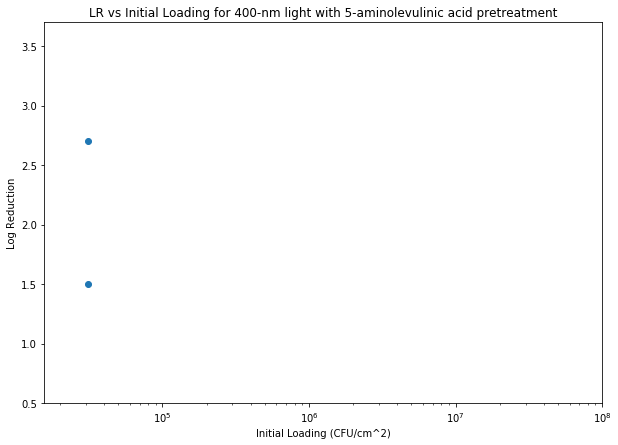

4


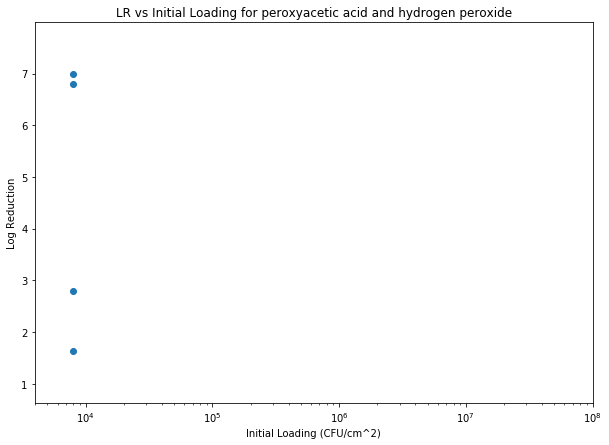

8


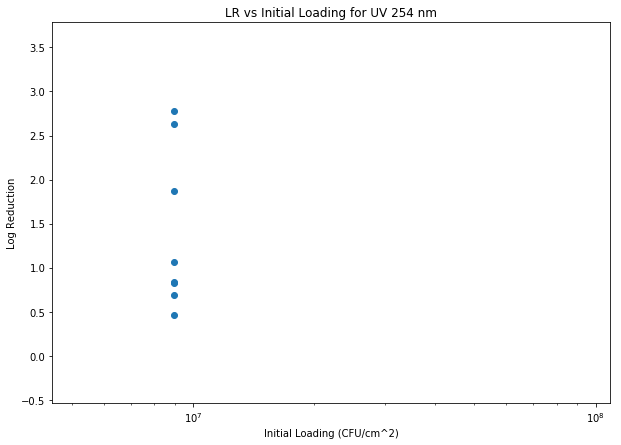

354


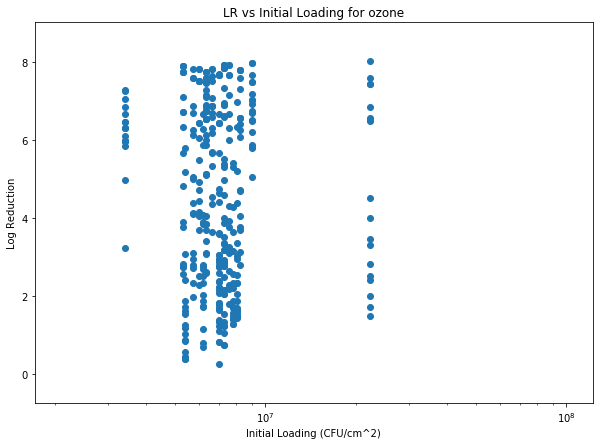

3


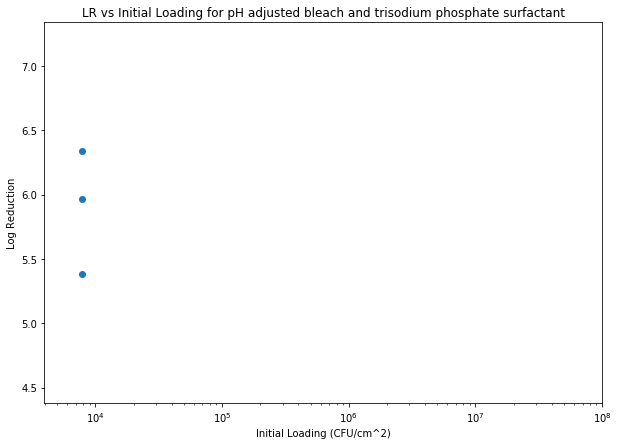

12


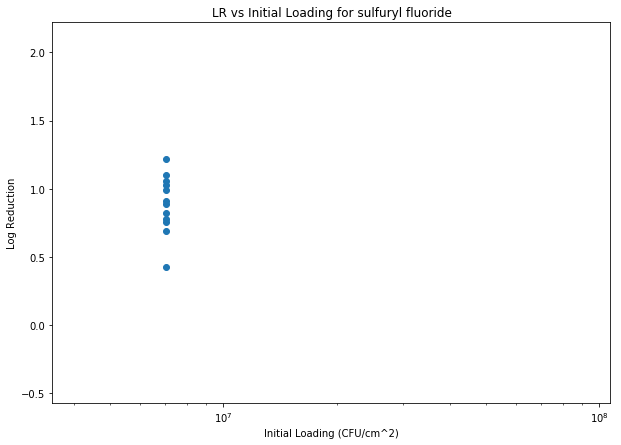

72


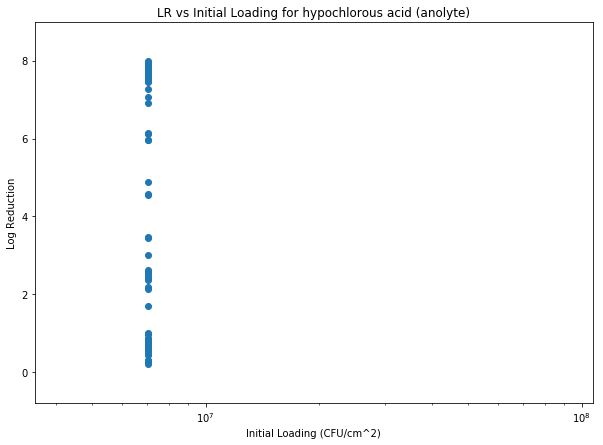

24


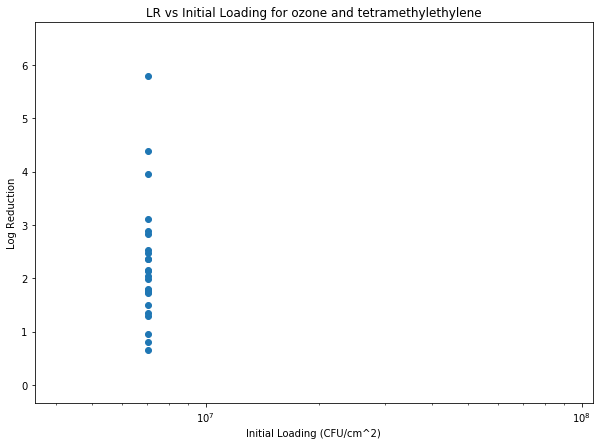

23


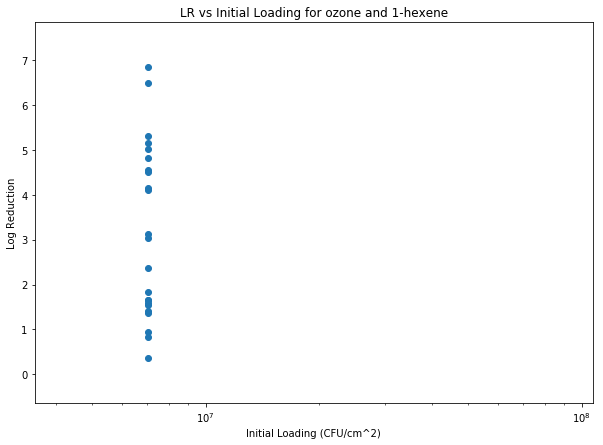

5


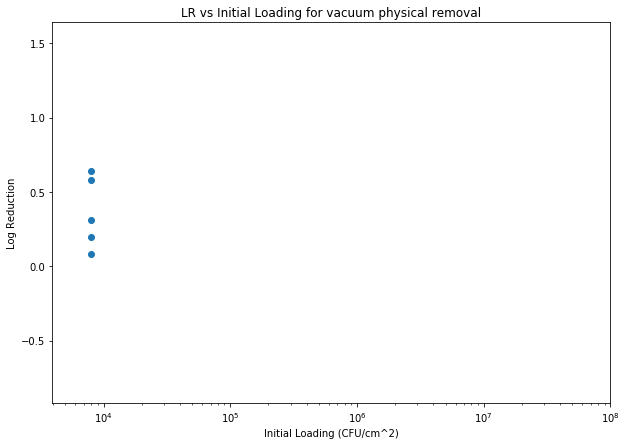

6


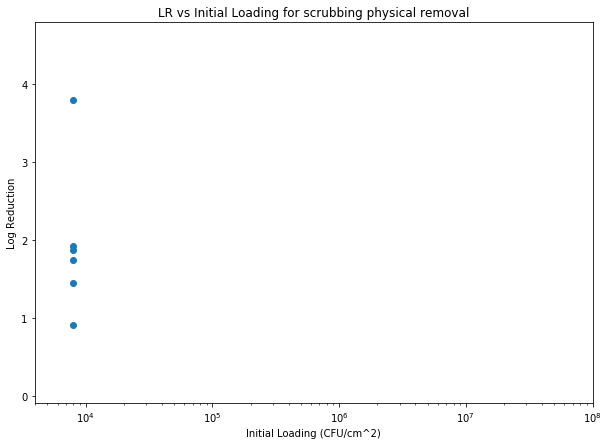

2


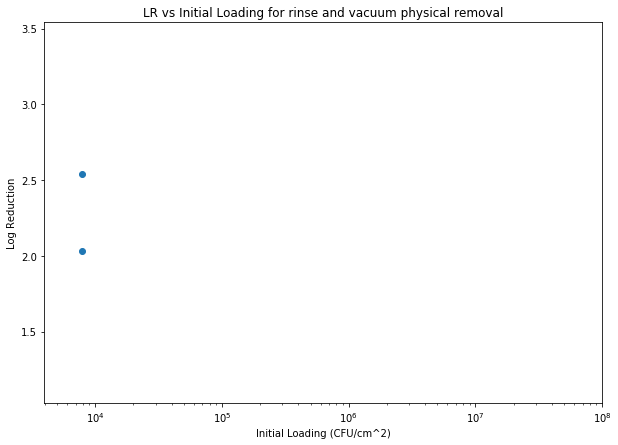

190


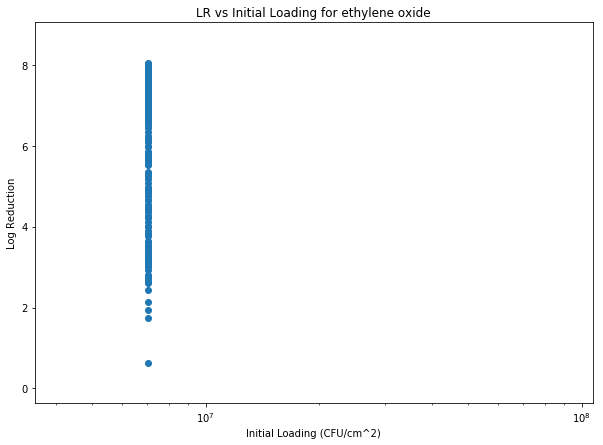

32


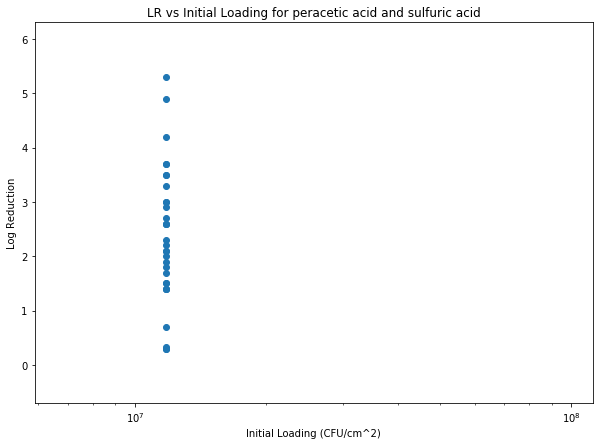

168


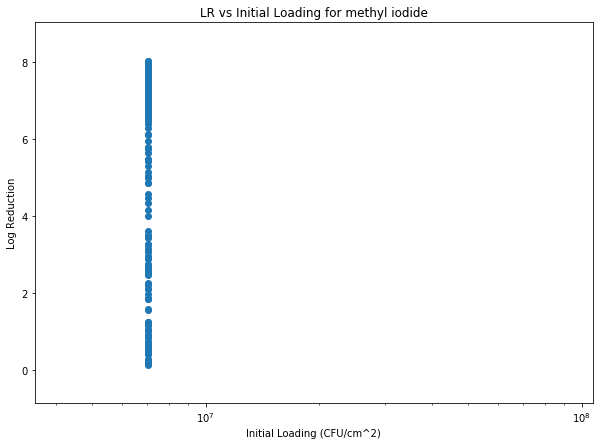

9


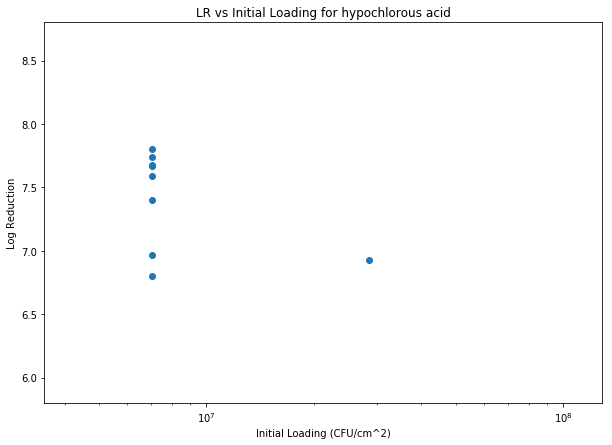

18


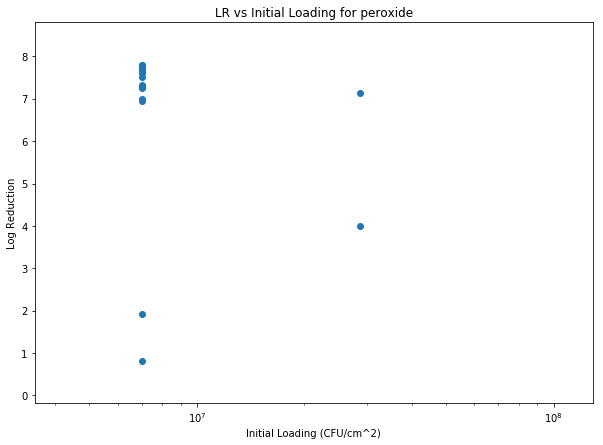

18


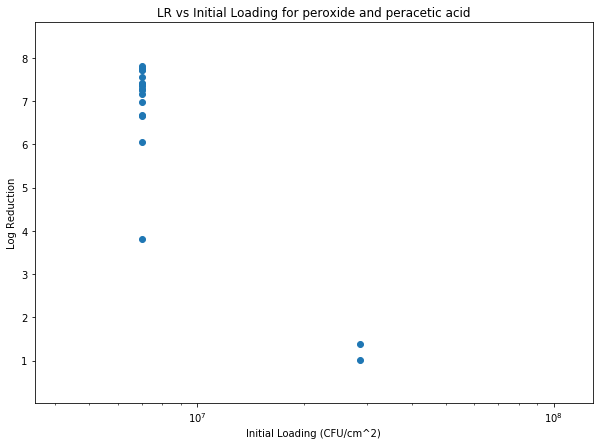

77


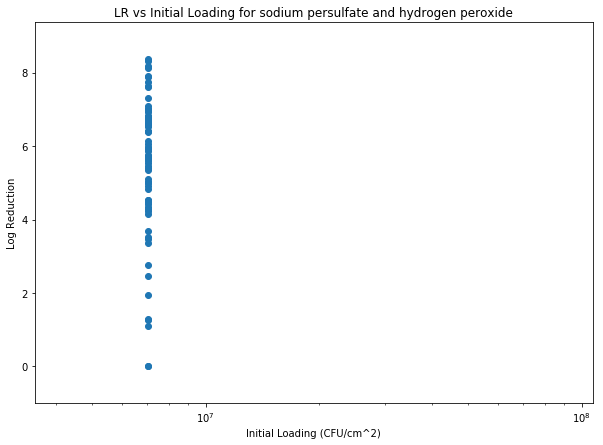

51


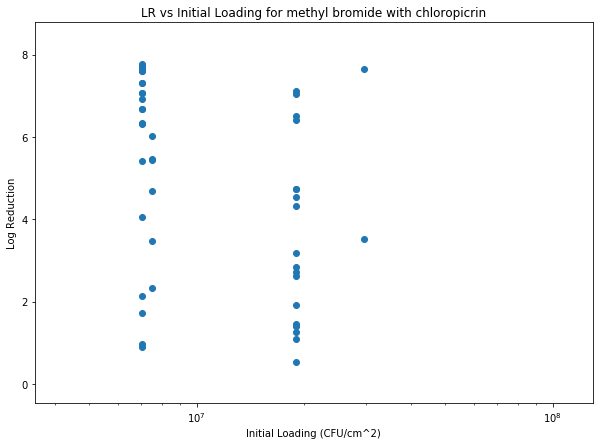

6


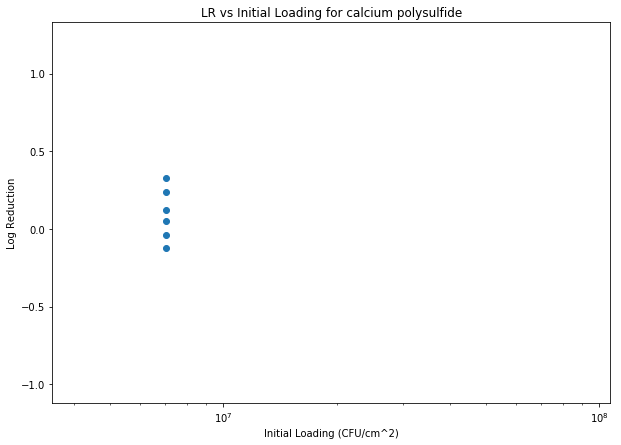

29


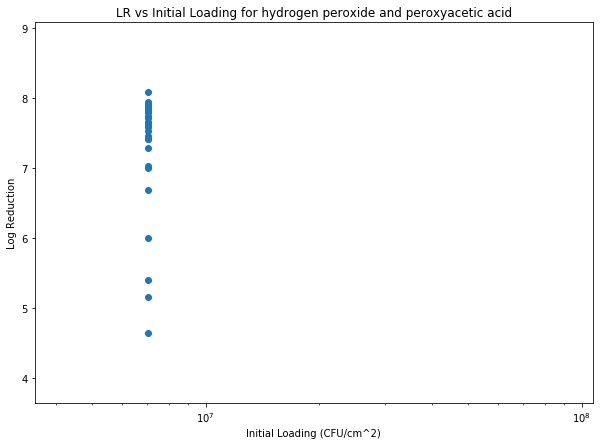

18


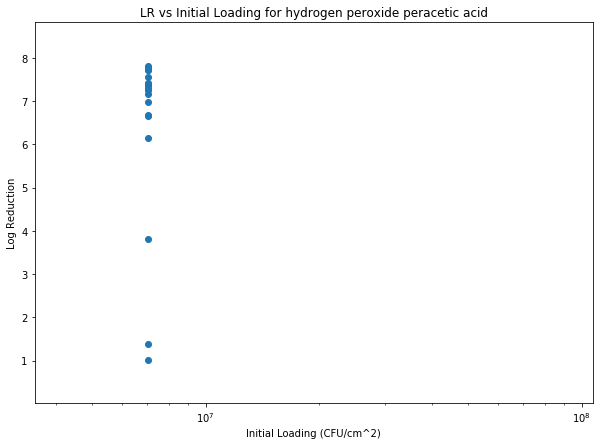

1


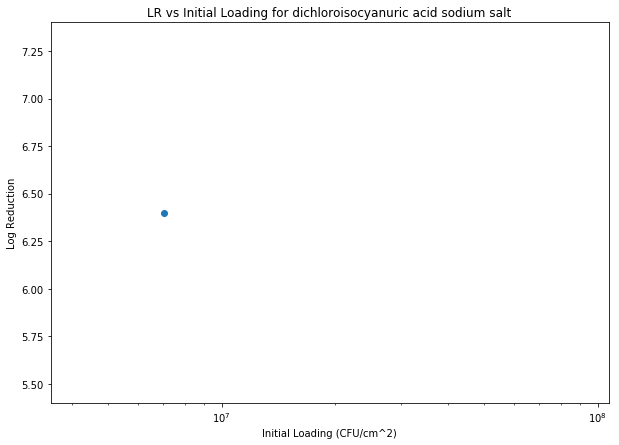

1


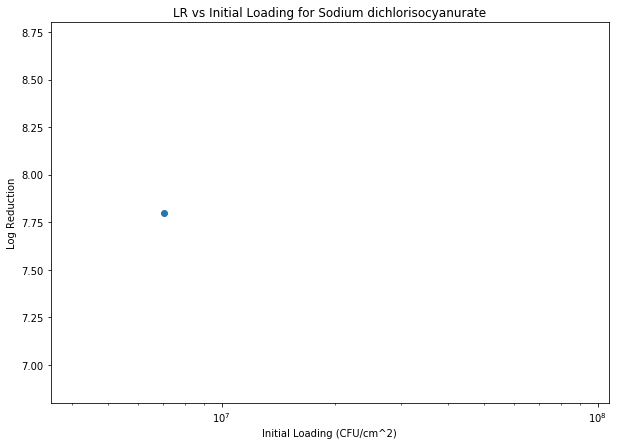

1


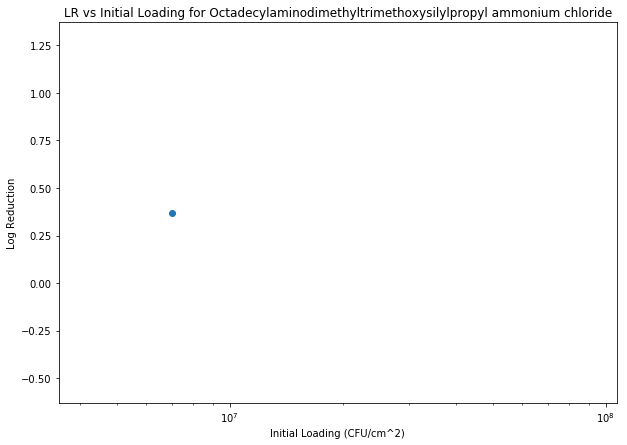

24


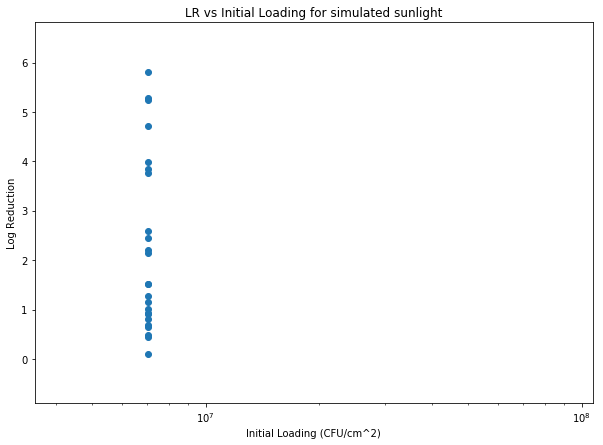

In [51]:
# scatter plots of LR vs Loading for all decon agents
for i in deconAgents:

    valid_data = df[(df['EffMeas'] == 'LR') & (df['LoadingUn'] == 'CFU/cm^2') & (df['DeconAgent'] == i) & (df['Loading'] == df['Loading'])]
    
    if len(valid_data) > 0:
        print(len(valid_data))
        
        plt.figure(figsize=(10,7))

        plt.scatter(valid_data.Loading, valid_data.Eff)

        plt.ylim(valid_data['Eff'].min() - 1, valid_data['Eff'].max() + 1)
        plt.xlim(valid_data['Loading'].min() - (0.5 * valid_data['Loading'].min()), valid_data['Loading'].max() + 100000000)

        plt.xscale('log')

        plt.ylabel('Log Reduction')
        plt.xlabel('Initial Loading (CFU/cm^2)')

        plt.title('LR vs Initial Loading for ' + i)

        plt.show()

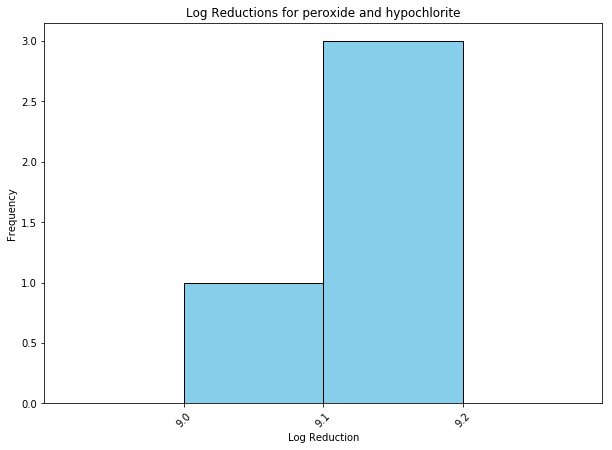

In [40]:
# fixed the one LR histogram for that decon agent that just didn't want to cooperate
valid_data = df[(df['EffMeas'] == 'LR') & (df['DeconAgent'] == 'peroxide and hypochlorite')]
        
plt.figure(figsize=(10,7))
        
binSize = round(1 + (3.322 * math.log10(len(valid_data.index))))
    
counts, bins, bars = plt.hist(x = valid_data.Eff.dropna(), bins=2, color='skyblue', edgecolor='black')

plt.xlim(valid_data['Eff'].min() - 0.1, valid_data['Eff'].max() + 0.1)
plt.xticks(bins)
plt.xlabel('Log Reduction')
plt.ylabel('Frequency')
    
plt.xticks(rotation=45, fontsize=10)
    
plt.title('Log Reductions for peroxide and hypochlorite')
    
plt.show()

In [35]:
params = [
    ("surfaceCategory", "Interior Walls", "InteriorWalls"),
    ("surfaceCategory", "Exterior Walls", "ExteriorWalls"),
    ("surfaceCategory", "Carpeted Flooring", "Carpet"),
    ("surfaceCategory", "Non-Carpeted Flooring", "NonCarpet"),
    ("surfaceCategory", "Ceiling", "Ceilings"),
    ("surfaceCategory", "HVAC and Duct Work", "HVAC"),
    ("surfaceCategory", "Miscellaneous", "Misc"),
    ("appMeth", "Liquid Spray", "liquid spray"),
    ("appMeth", "Foam Spray", "foam spray"),
    ("appMeth", "Physical", "physical"),
    ("appMeth", "Fogging", "fogging"),
    ("appMeth", "Fumigation", "fumigation"),
    ("appMeth", "Aerosol", "aerosol"),
    ("appMeth", "Liquid Wipe", "liquid wipe")
]

963


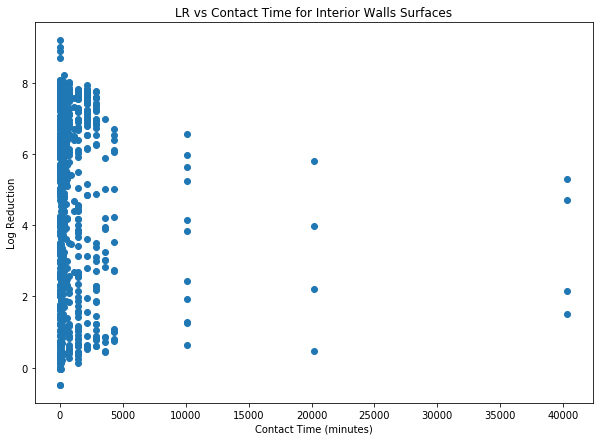

507


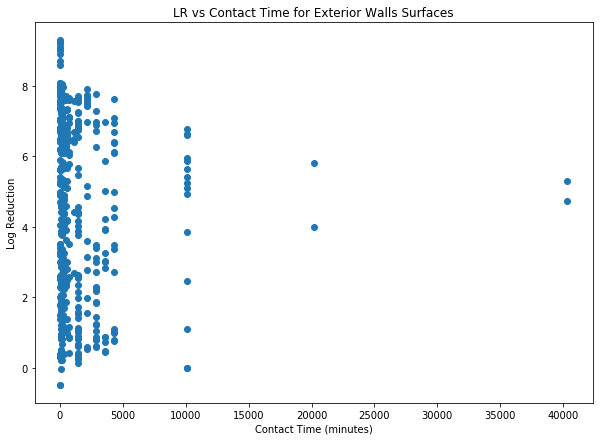

338


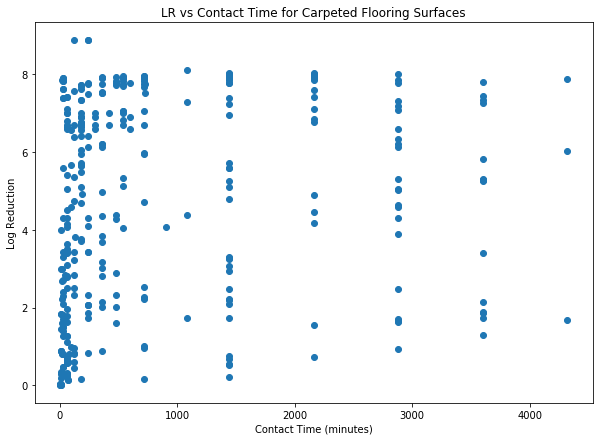

772


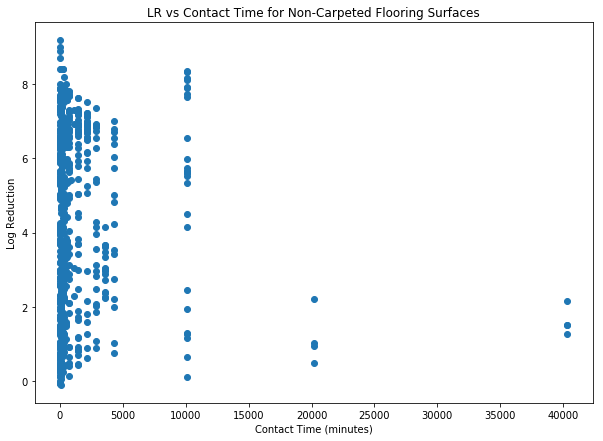

404


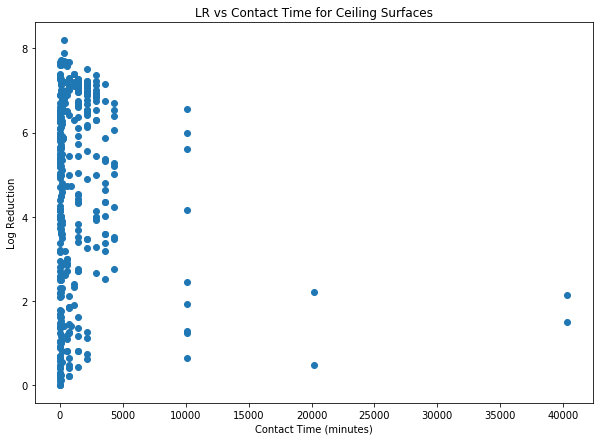

440


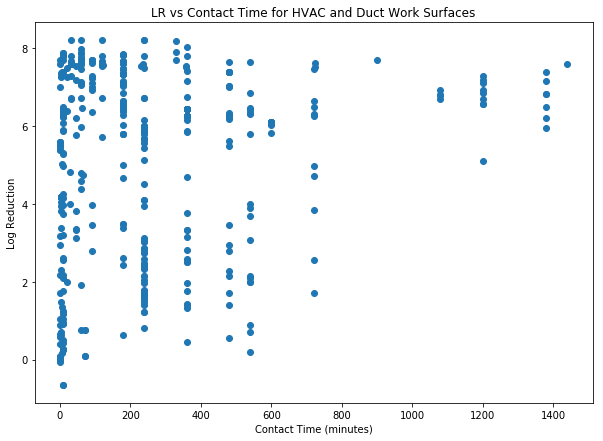

166


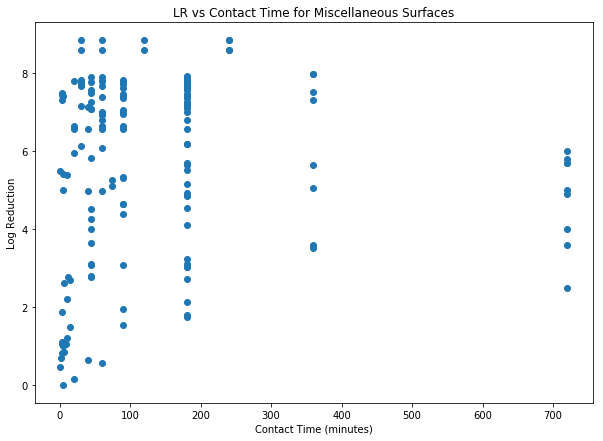

600


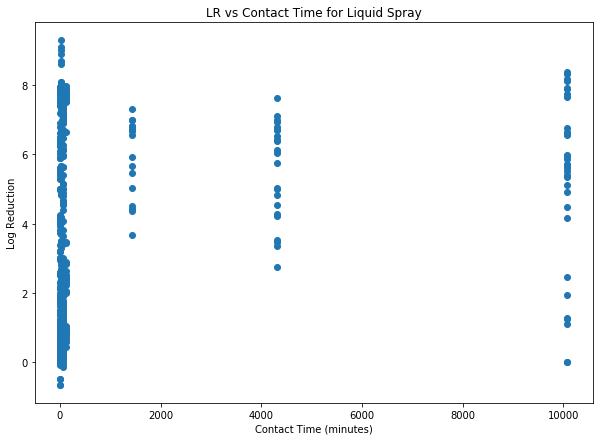

59


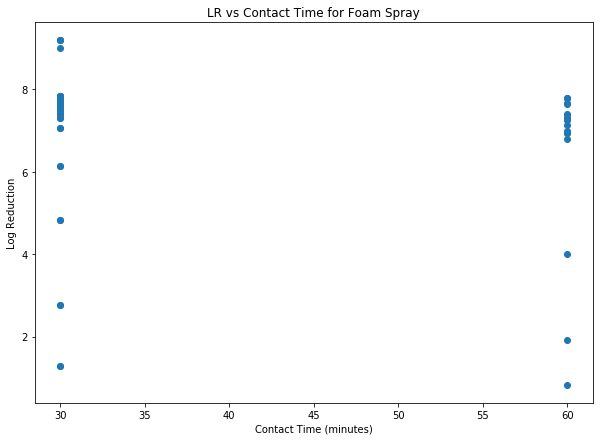

34


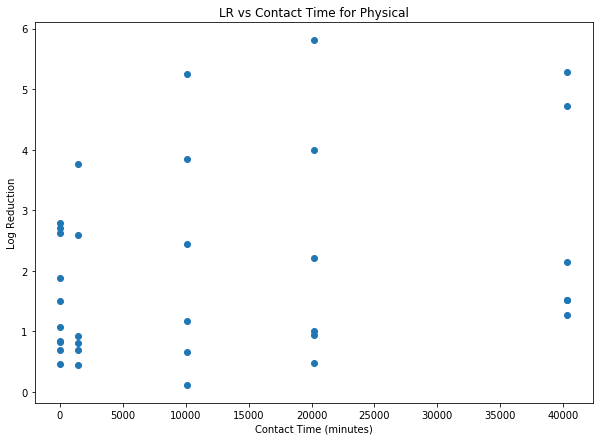

16


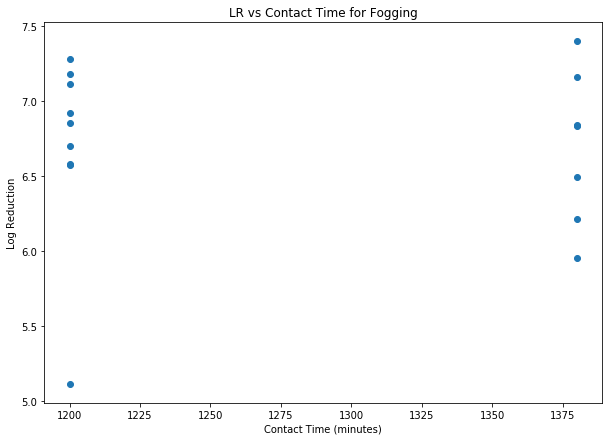

1732


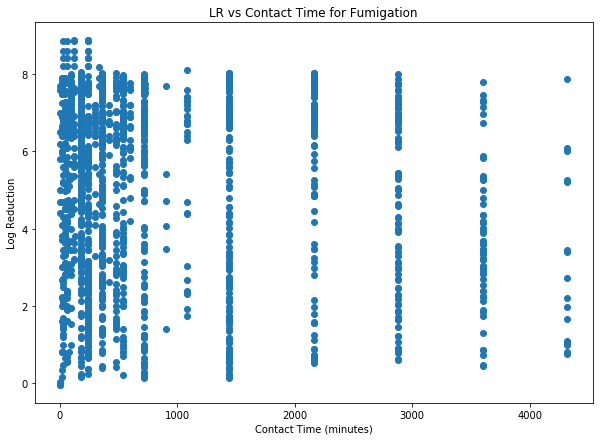

5


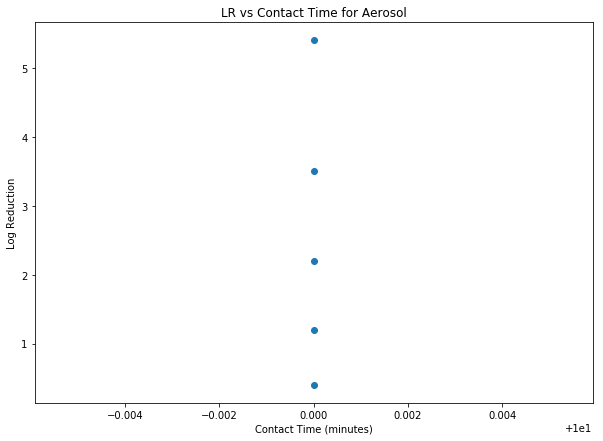

20


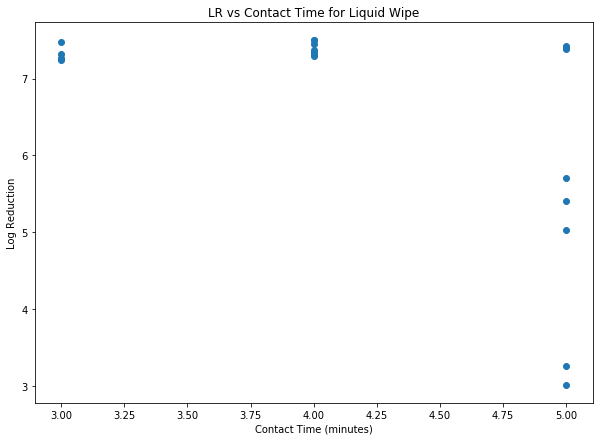

In [29]:
# scatter plots of LR vs Contact Time for the surface categories and the application methods
def ContTimeScatter(parameterColumn, title, columnLabel):
    
    if parameterColumn == 'surfaceCategory':
        valid_data = df[(df['EffMeas'] == 'LR') & (df[columnLabel] == 1) & (df['ContTime'] == df['ContTime'])]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.ContTime, valid_data.Eff)

            plt.xlabel('Contact Time (minutes)')
            plt.ylabel('Log Reduction')
        
            plt.title('LR vs Contact Time for ' + title + ' Surfaces')

            plt.show()
    
    elif parameterColumn == 'appMeth':
        valid_data = df[(df['EffMeas'] == 'LR') & (df['ContTime'] == df['ContTime']) & (df['AppMethod'] == columnLabel)]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.ContTime, valid_data.Eff)

            plt.ylabel('Log Reduction')
            plt.xlabel('Contact Time (minutes)')

            plt.title('LR vs Contact Time for ' + title)

            plt.show()
        
for p in params:
    ContTimeScatter(*p)

5


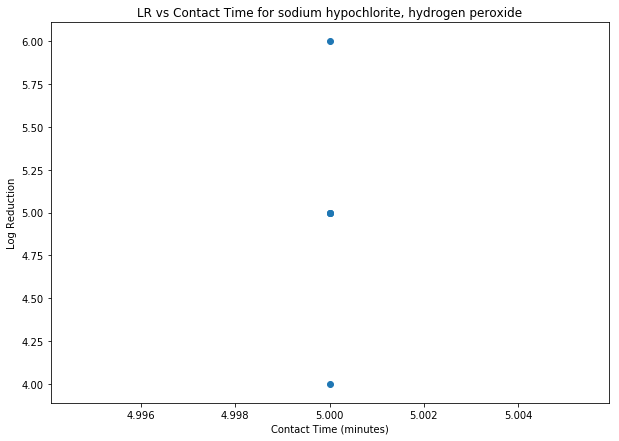

203


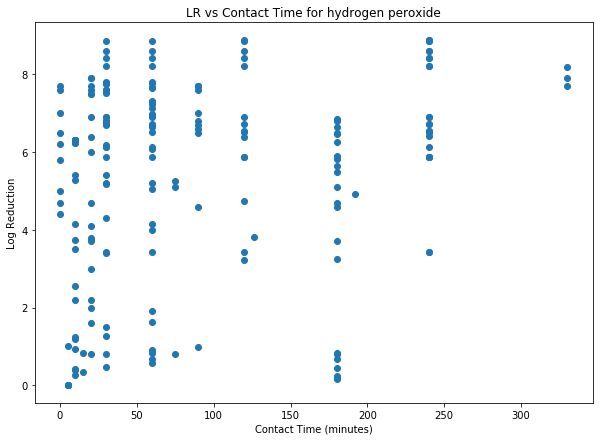

36


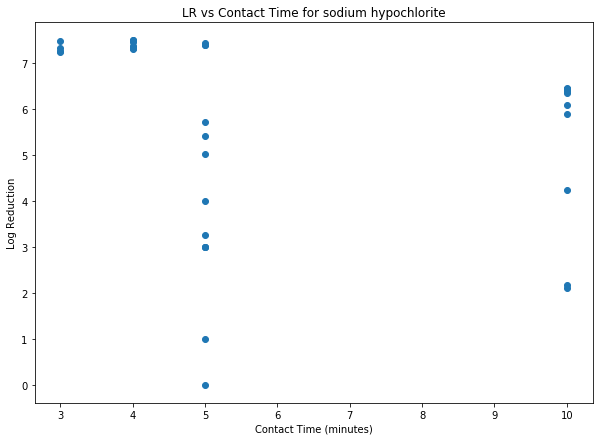

23


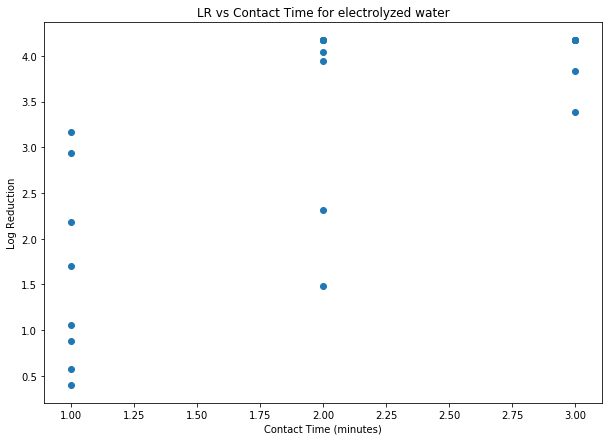

307


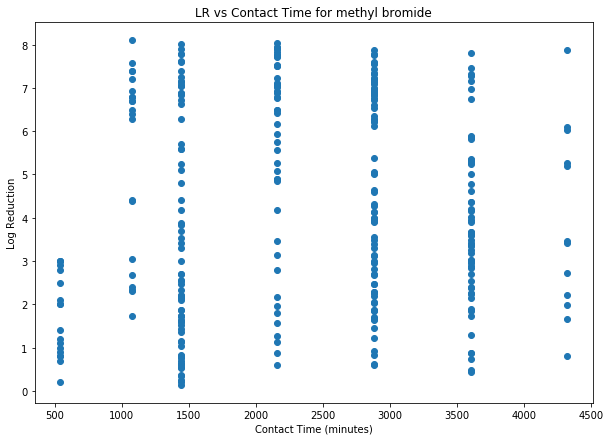

576


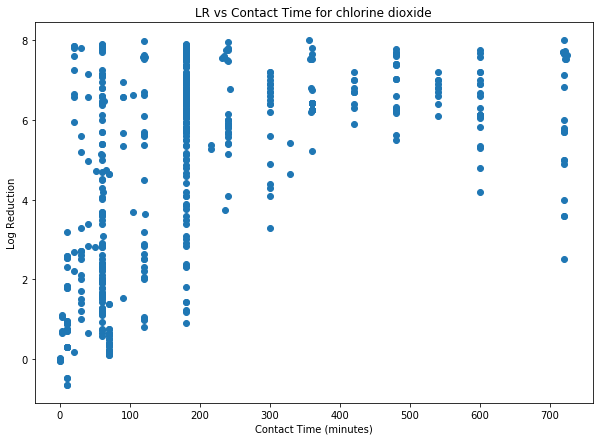

104


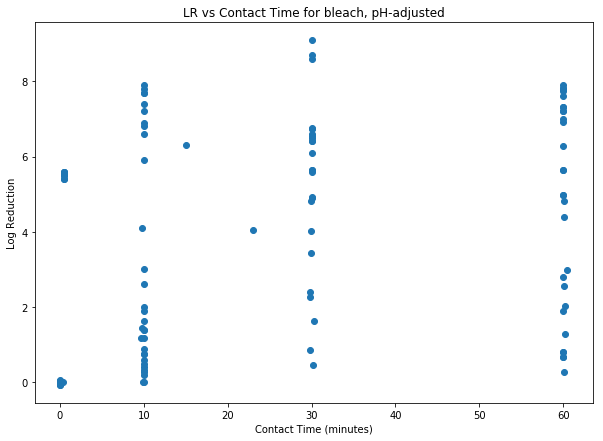

4


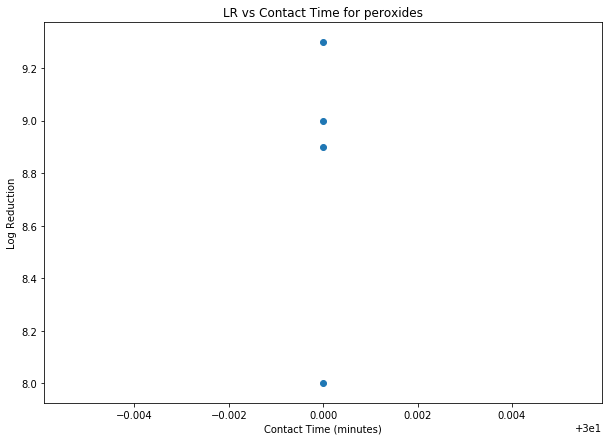

4


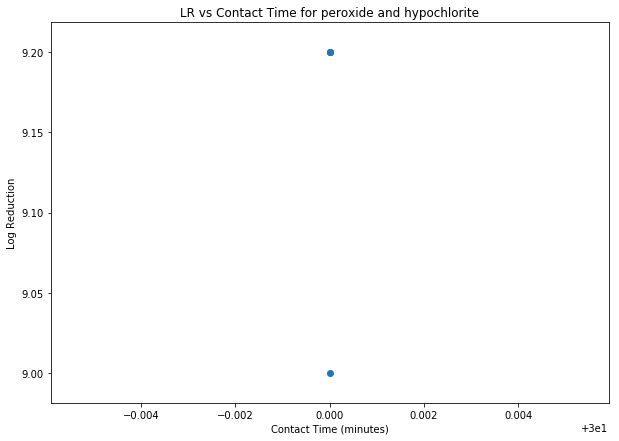

16


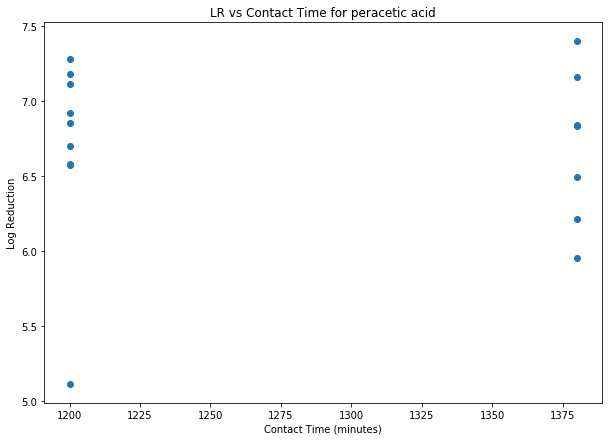

28


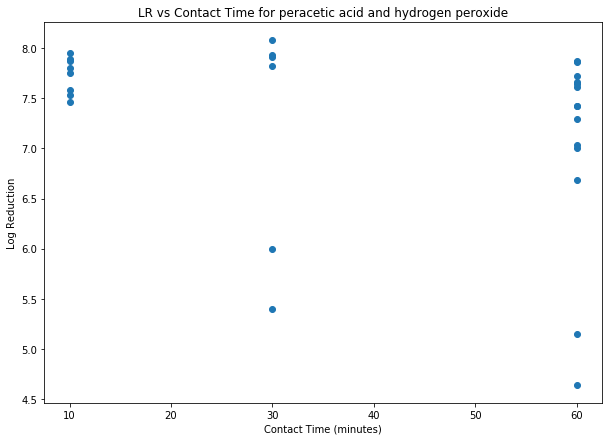

37


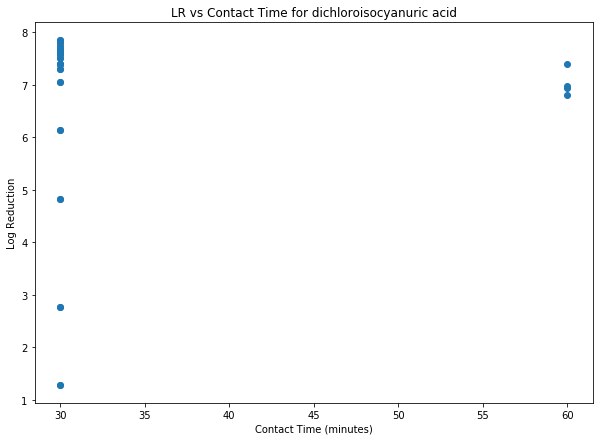

6


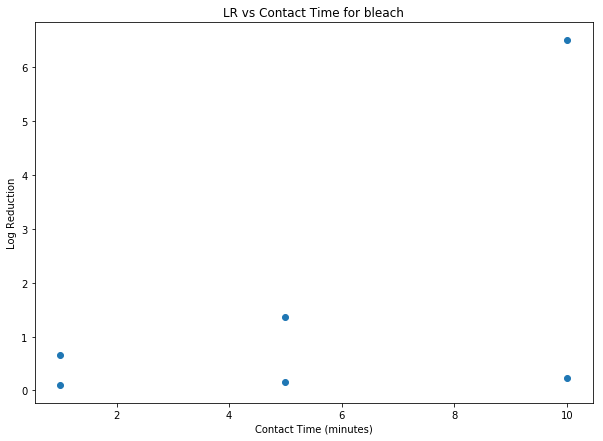

2


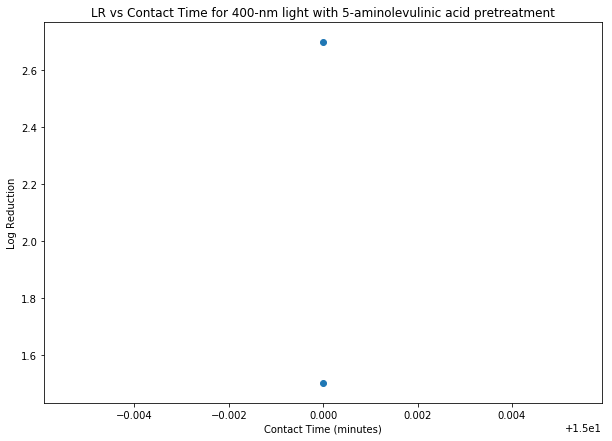

18


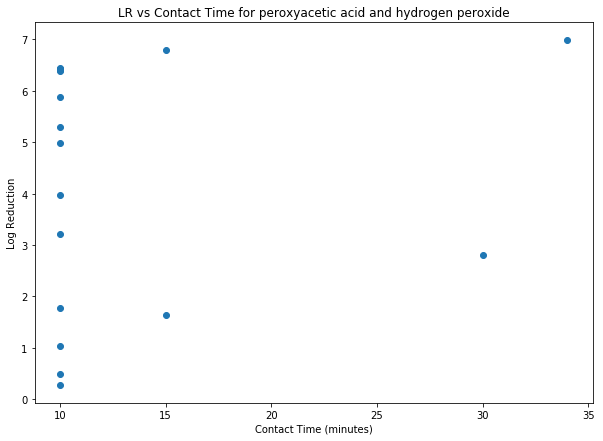

8


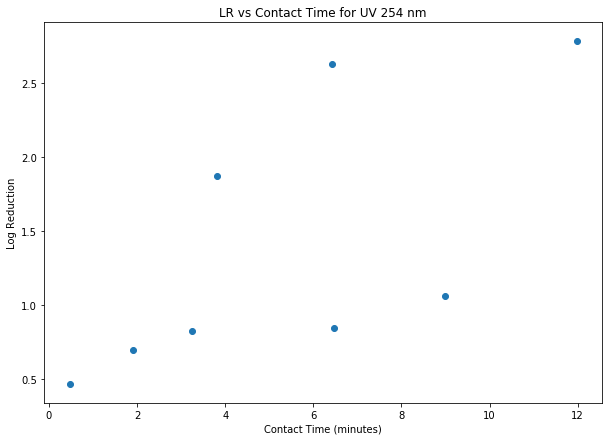

3


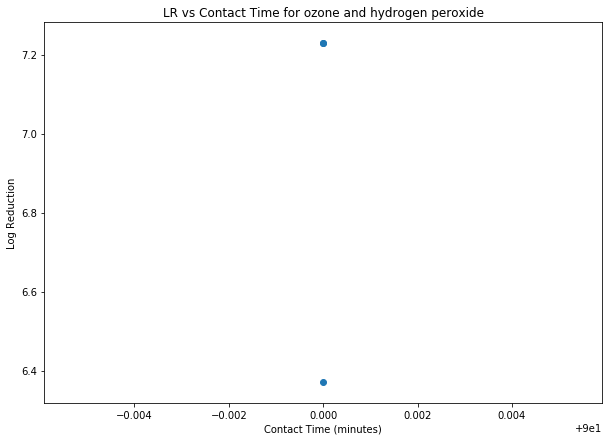

354


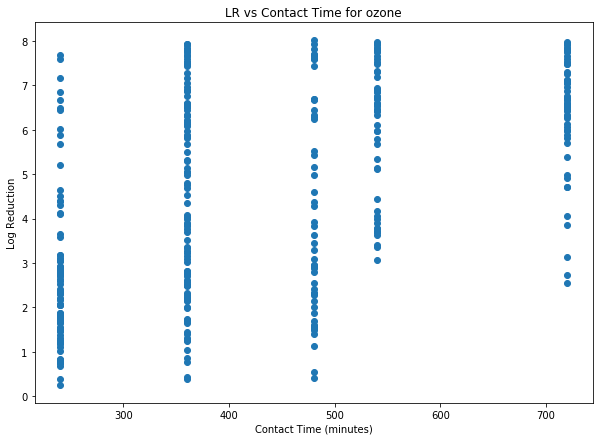

3


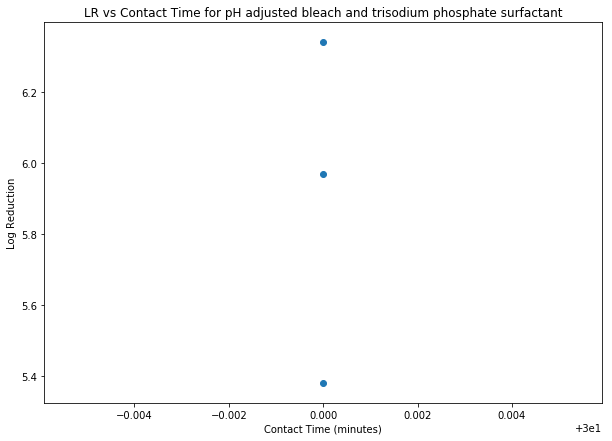

12


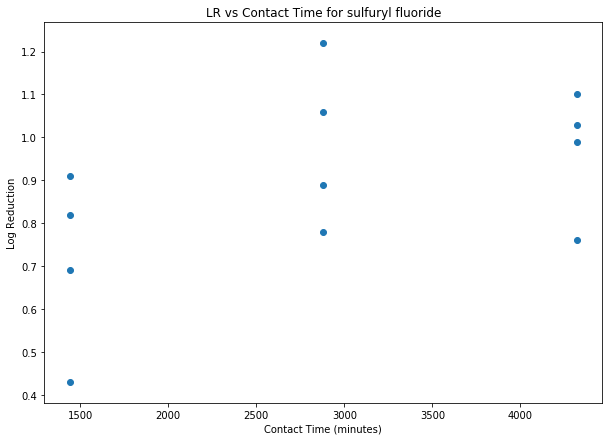

72


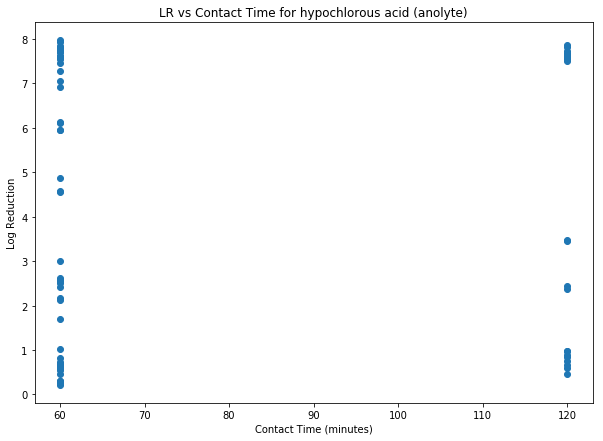

24


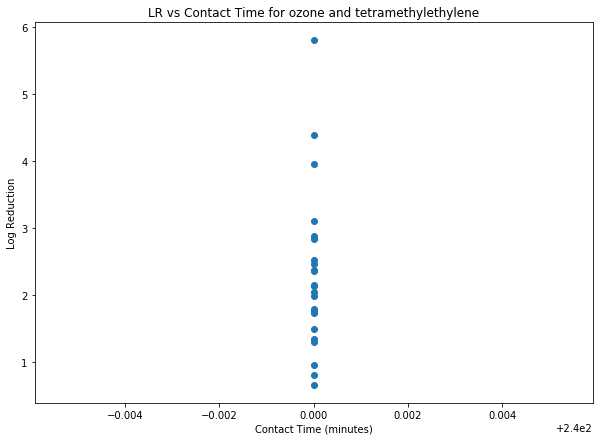

23


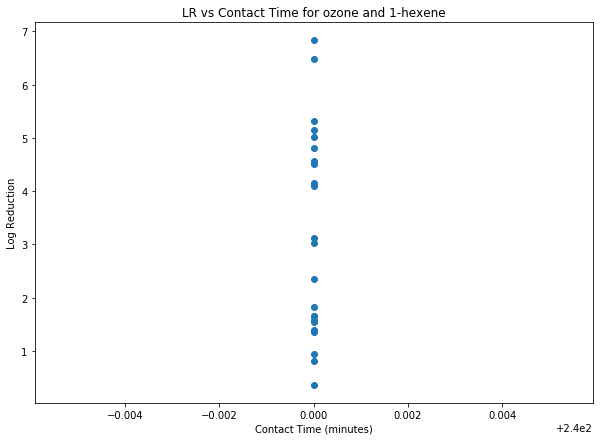

190


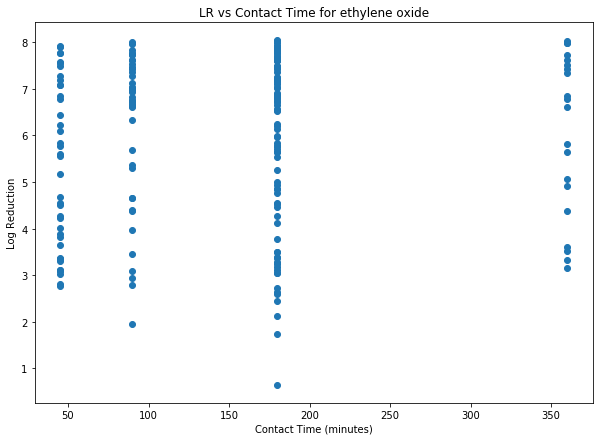

32


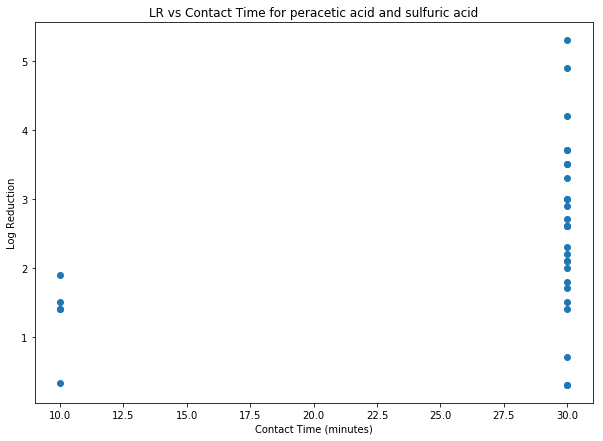

168


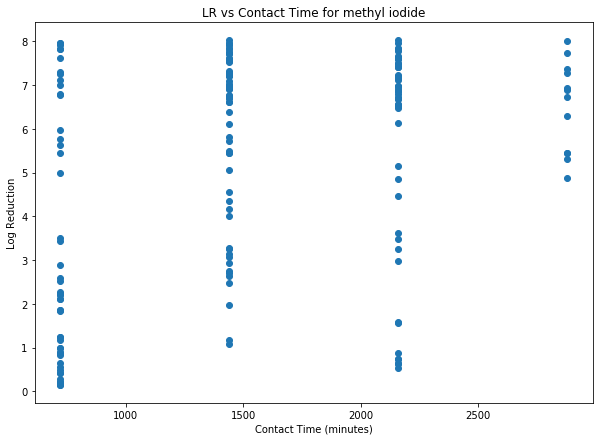

77


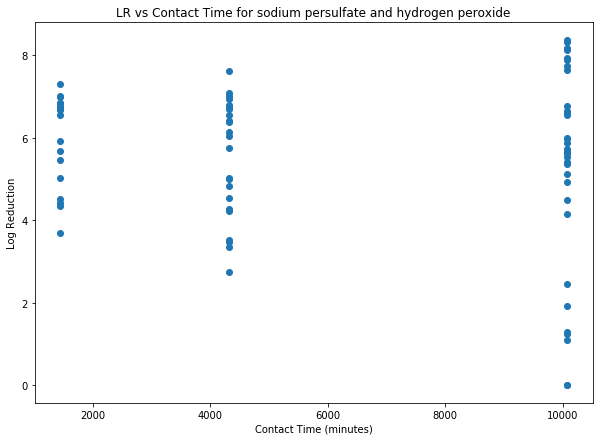

51


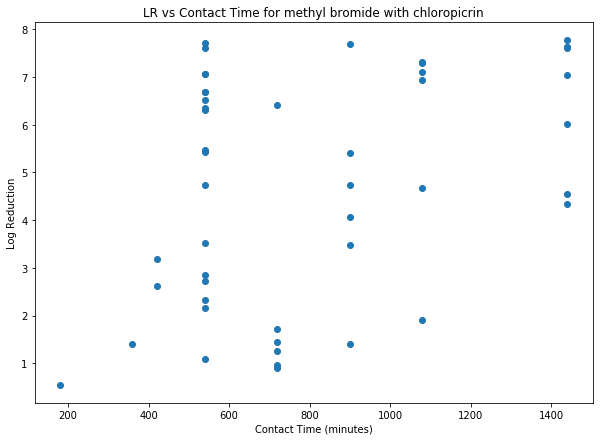

6


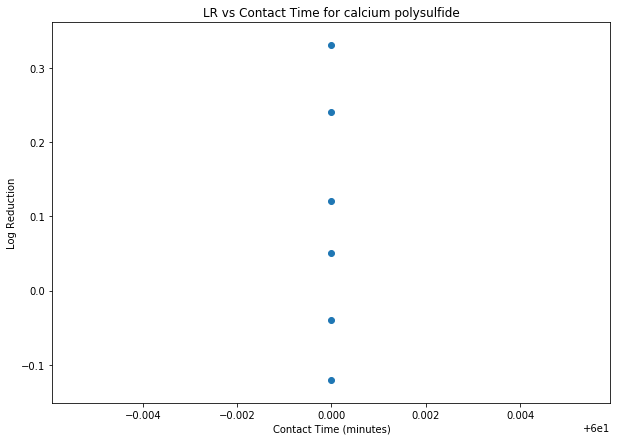

29


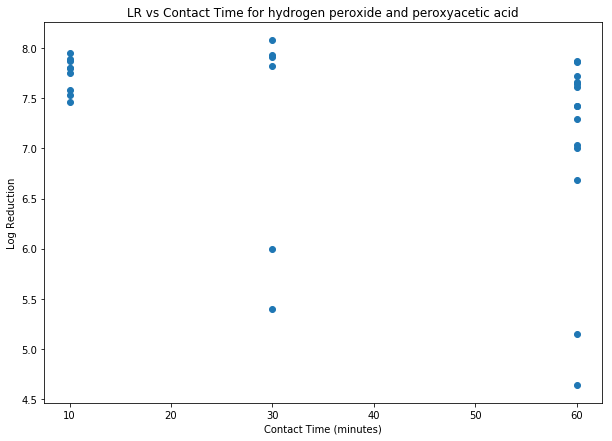

18


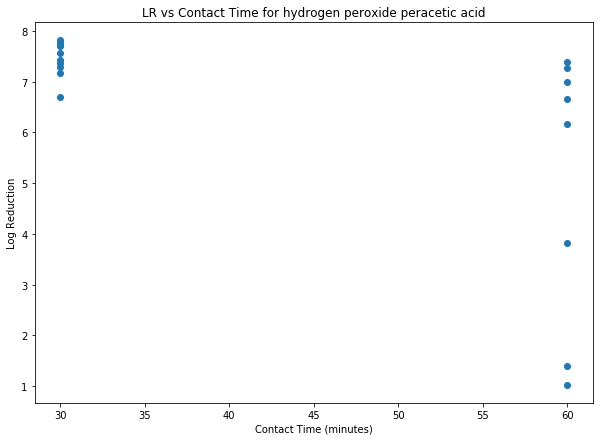

1


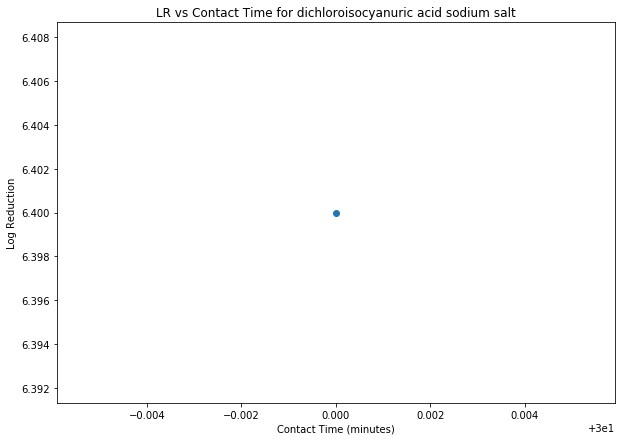

1


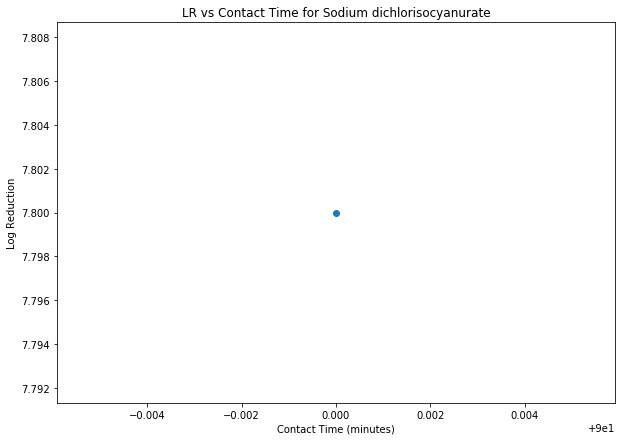

1


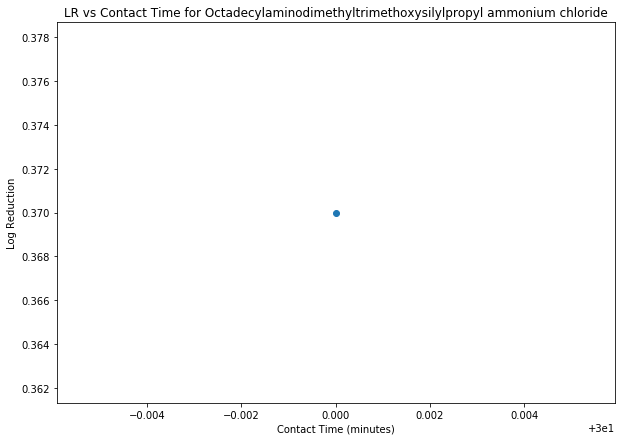

24


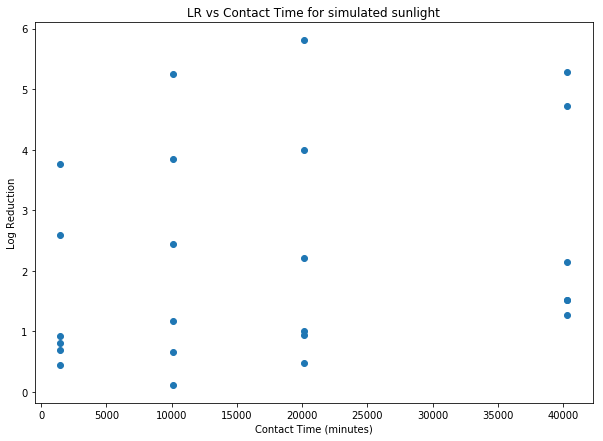

In [33]:
# scatter plots of LR vs Contact Time for all decon agents
for i in deconAgents:

    valid_data = df[(df['EffMeas'] == 'LR') & (df['DeconAgent'] == i) & (df['ContTime'] == df['ContTime'])]
    
    if len(valid_data) > 0:
        print(len(valid_data))
        
        plt.figure(figsize=(10,7))

        plt.scatter(valid_data.ContTime, valid_data.Eff)

        plt.ylabel('Log Reduction')
        plt.xlabel('Contact Time (minutes)')

        plt.title('LR vs Contact Time for ' + i)

        plt.show()

142


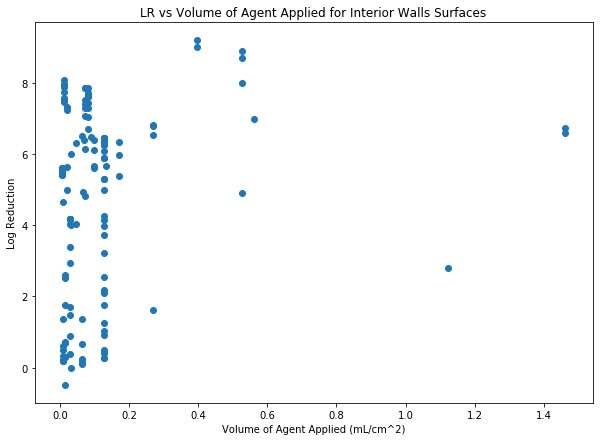

41


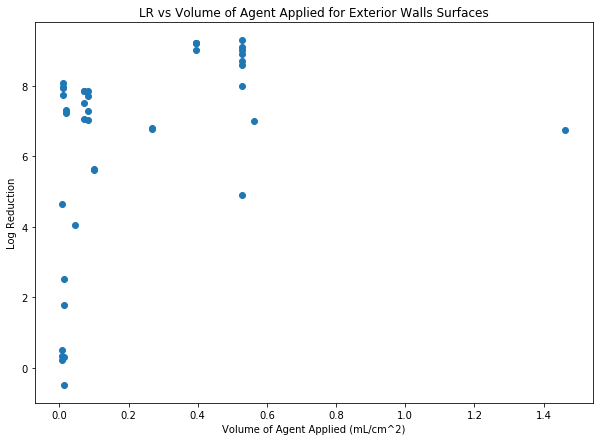

13


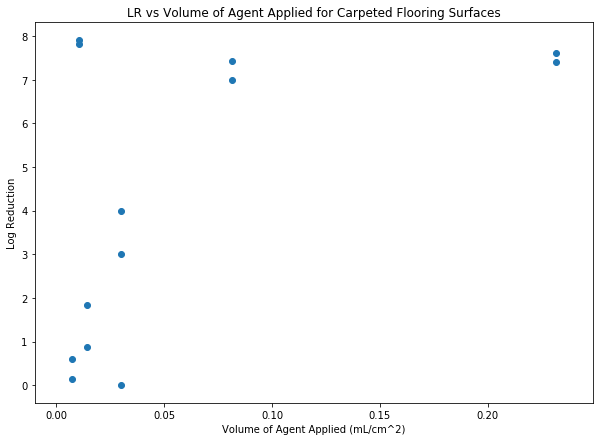

133


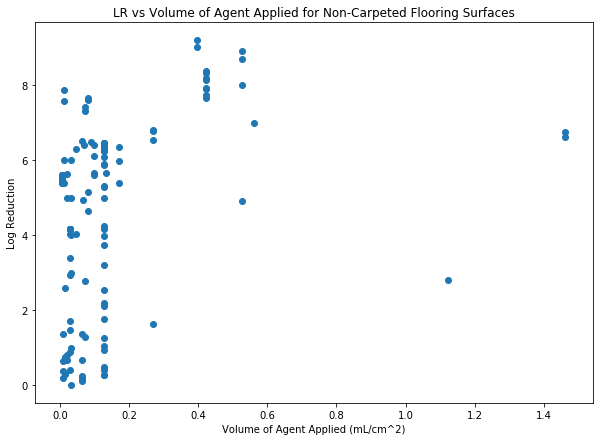

90


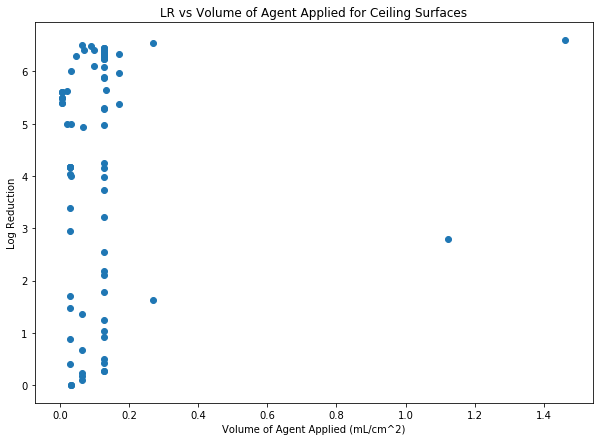

78


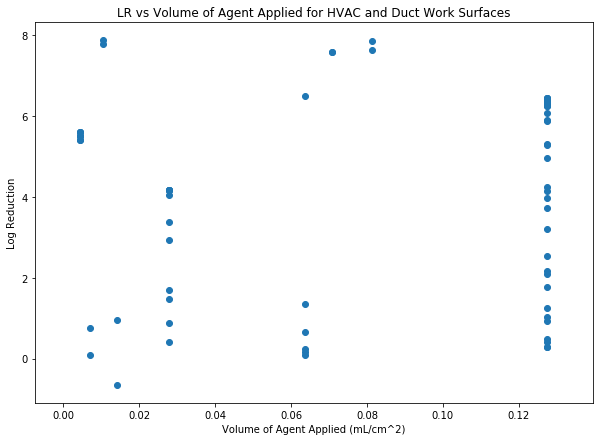

4


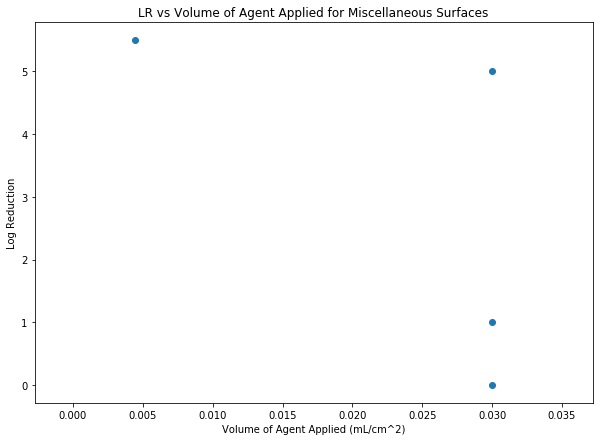

183


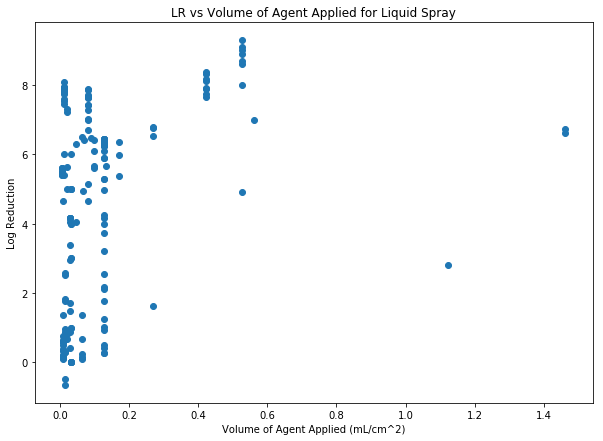

18


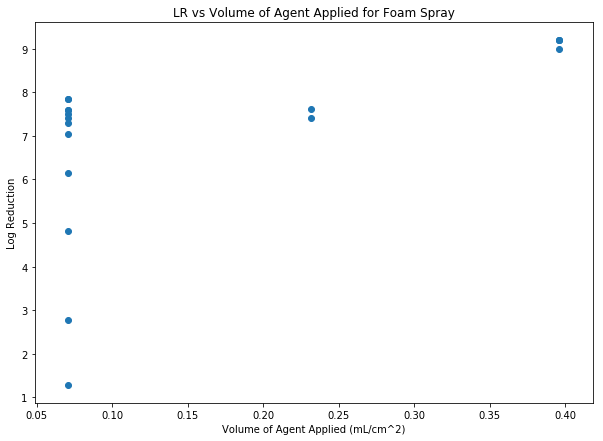

In [36]:
# scatter plots of LR vs VolApp for the surface categories and the application methods
def VolAppScatter(parameterColumn, title, columnLabel):
    
    if parameterColumn == 'surfaceCategory':
        valid_data = df[(df['EffMeas'] == 'LR') & (df[columnLabel] == 1) & (df['VolApp'] == df['VolApp']) & (df['VolAppUn'] == 'mL/cm^2')]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.VolApp, valid_data.Eff)

            plt.xlabel('Volume of Agent Applied (mL/cm^2)')
            plt.ylabel('Log Reduction')
        
            plt.title('LR vs Volume of Agent Applied for ' + title + ' Surfaces')

            plt.show()
    
    elif parameterColumn == 'appMeth':
        valid_data = df[(df['EffMeas'] == 'LR') & (df['VolApp'] == df['VolApp']) & (df['VolAppUn'] == 'mL/cm^2') & (df['AppMethod'] == columnLabel)]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.VolApp, valid_data.Eff)

            plt.ylabel('Log Reduction')
            plt.xlabel('Volume of Agent Applied (mL/cm^2)')

            plt.title('LR vs Volume of Agent Applied for ' + title)

            plt.show()
        
for p in params:
    VolAppScatter(*p)

5


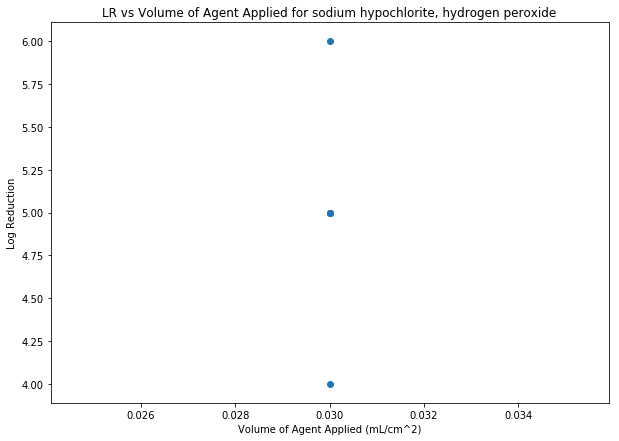

22


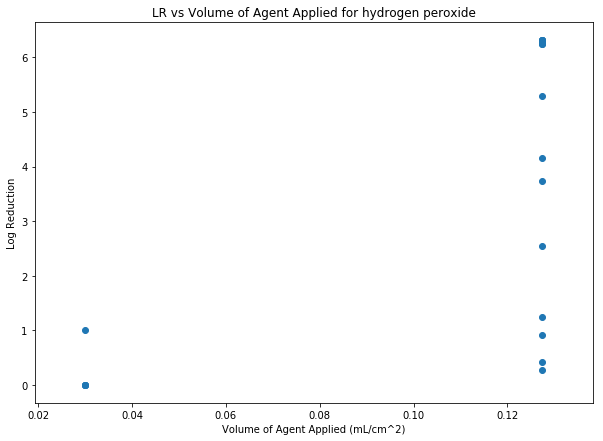

16


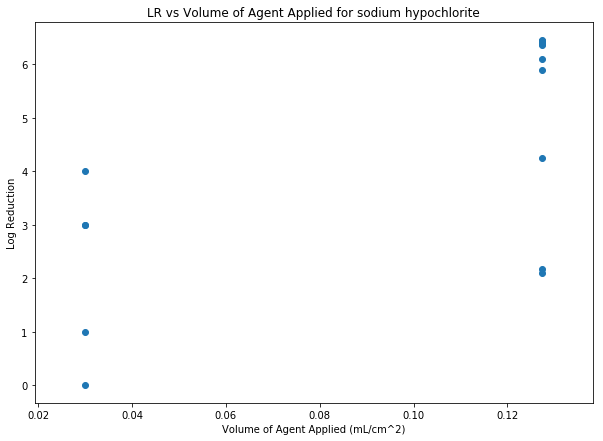

12


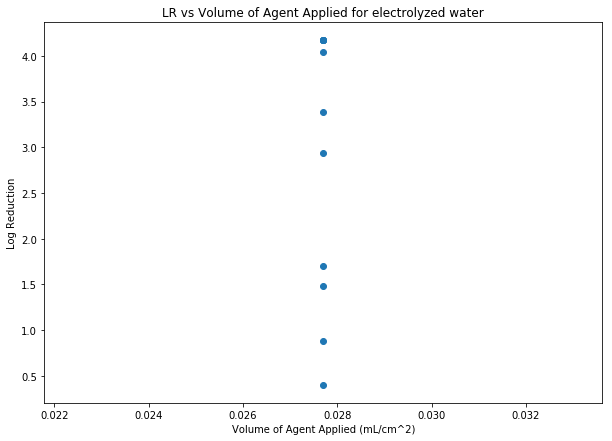

28


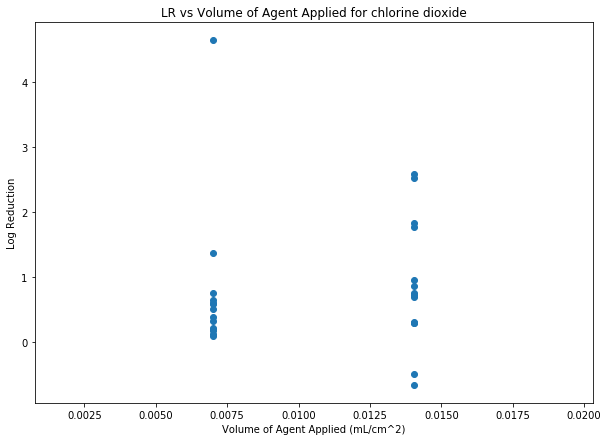

33


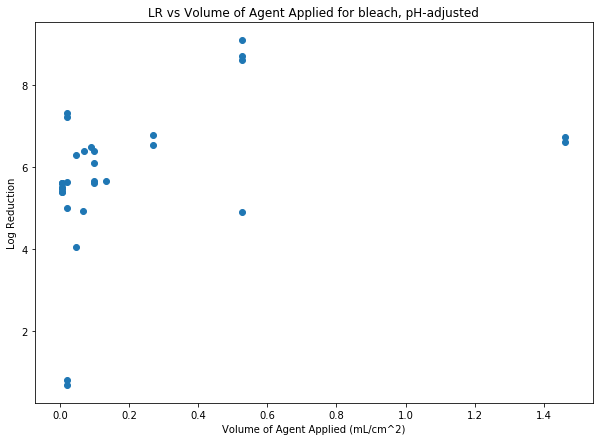

4


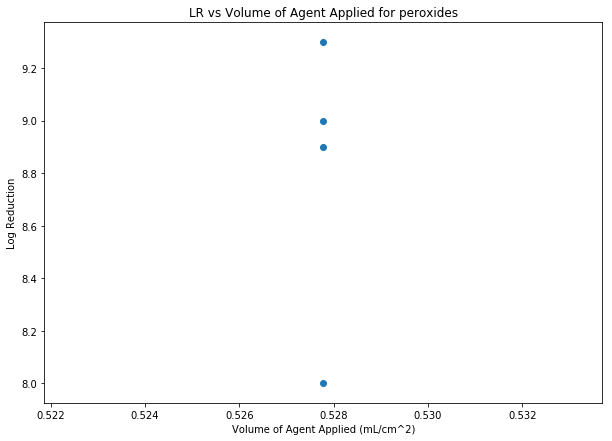

4


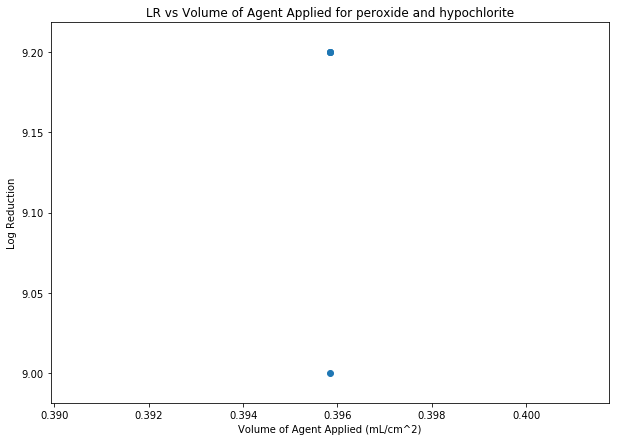

28


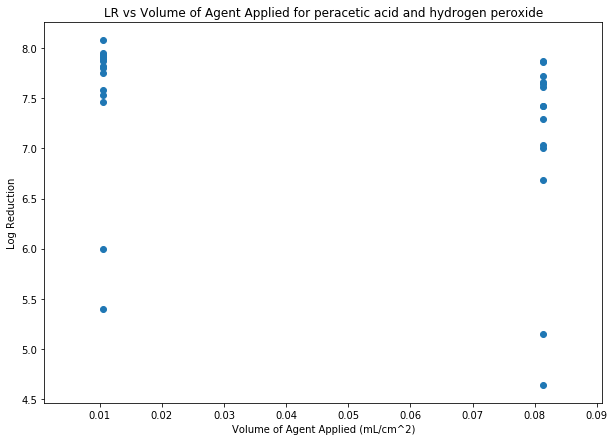

14


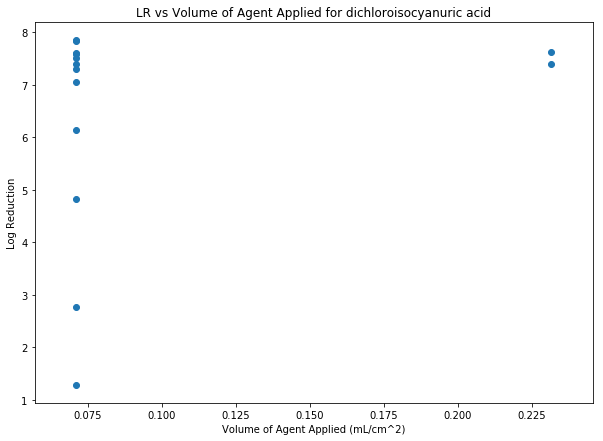

6


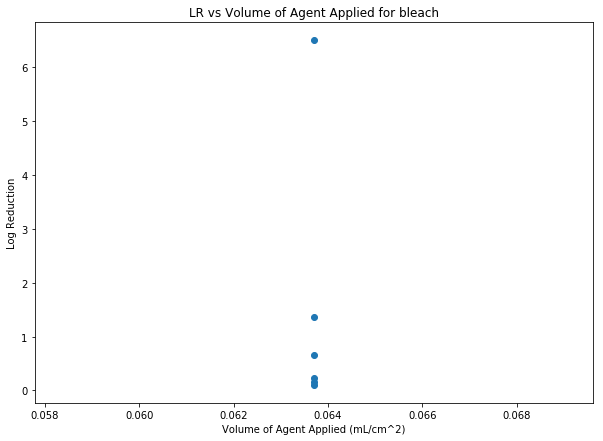

18


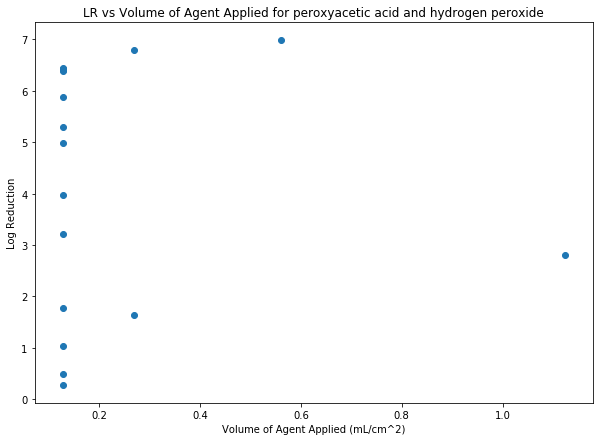

3


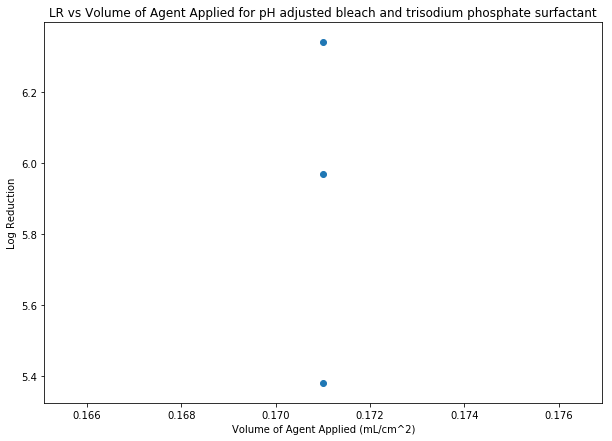

8


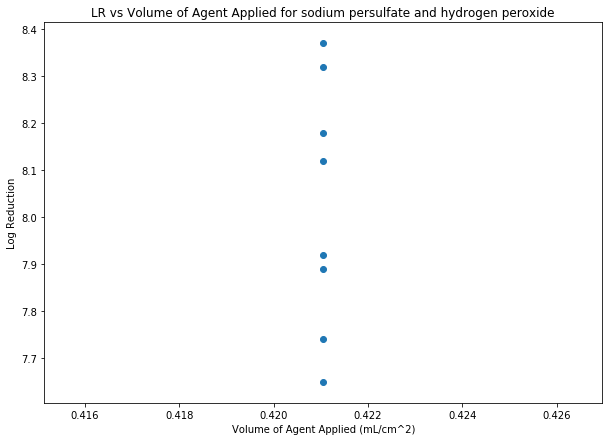

In [37]:
# scatter plots of LR vs VolApp for all decon agents
for i in deconAgents:

    valid_data = df[(df['EffMeas'] == 'LR') & (df['DeconAgent'] == i) & (df['VolApp'] == df['VolApp']) & (df['VolAppUn'] == 'mL/cm^2')]
    
    if len(valid_data) > 0:
        print(len(valid_data))
        
        plt.figure(figsize=(10,7))

        plt.scatter(valid_data.VolApp, valid_data.Eff)

        plt.ylabel('Log Reduction')
        plt.xlabel('Volume of Agent Applied (mL/cm^2)')

        plt.title('LR vs Volume of Agent Applied for ' + i)

        plt.show()

In [34]:
df.VolAppUn.unique()

array(['mL/cm^2', nan, 'mL/cm^3', 'g/cm^2'], dtype=object)

912


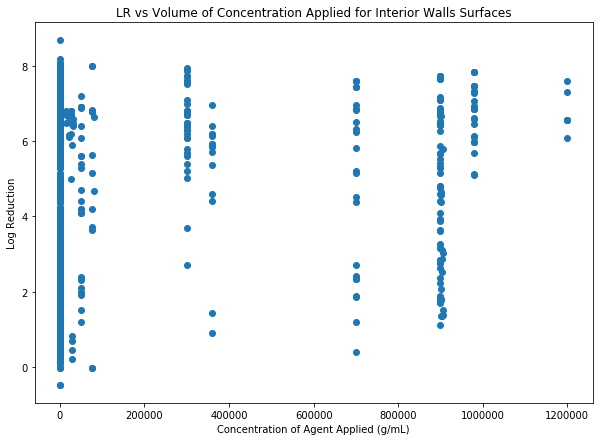

471


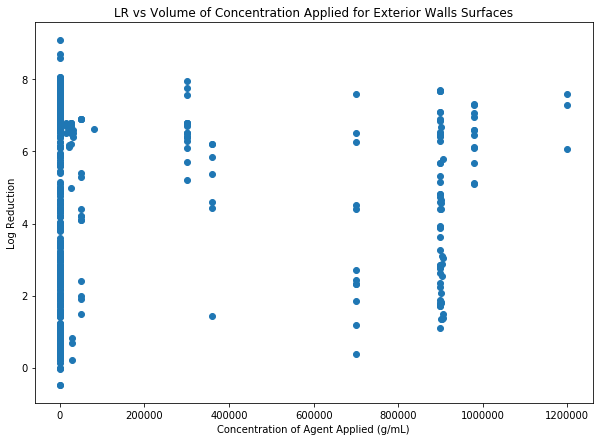

302


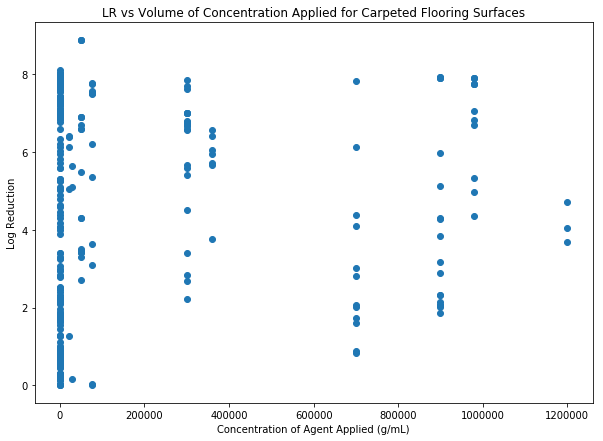

719


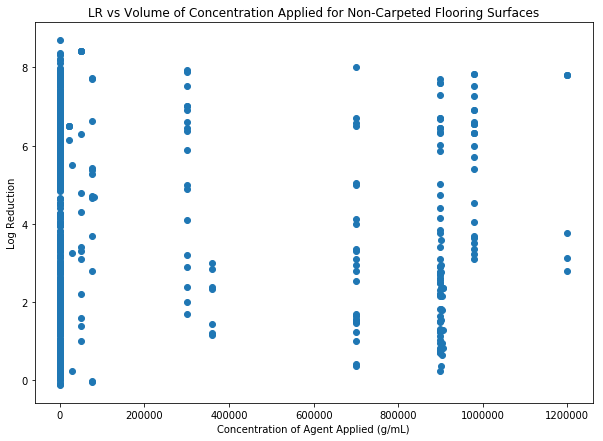

397


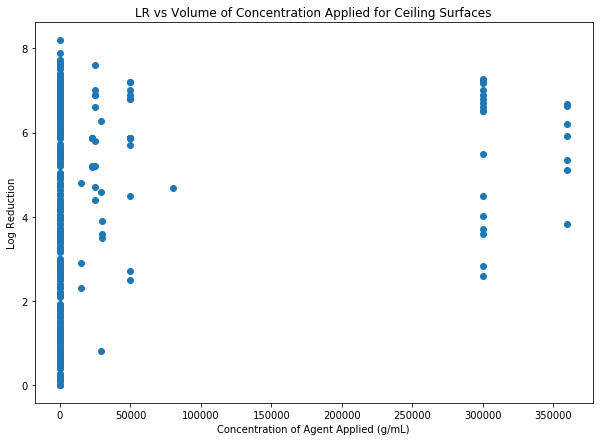

413


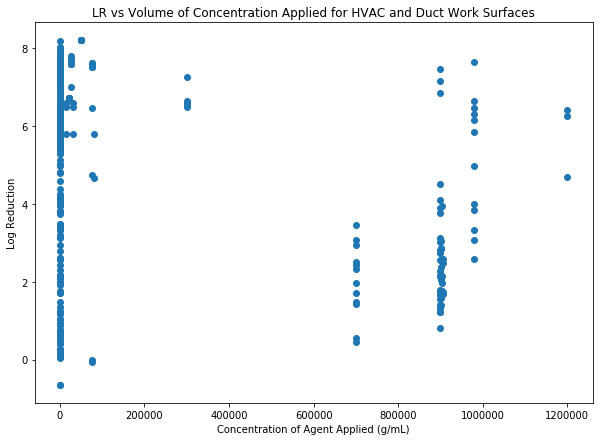

155


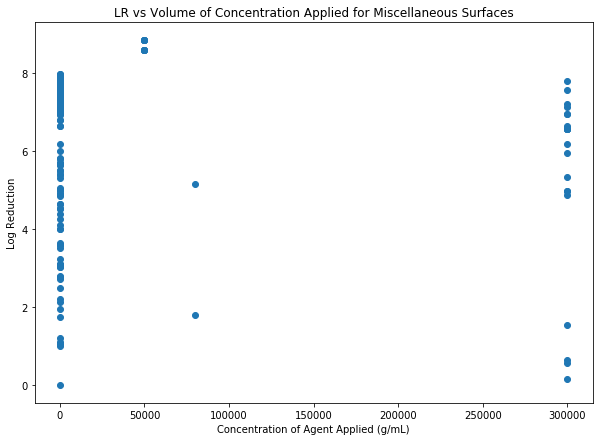

581


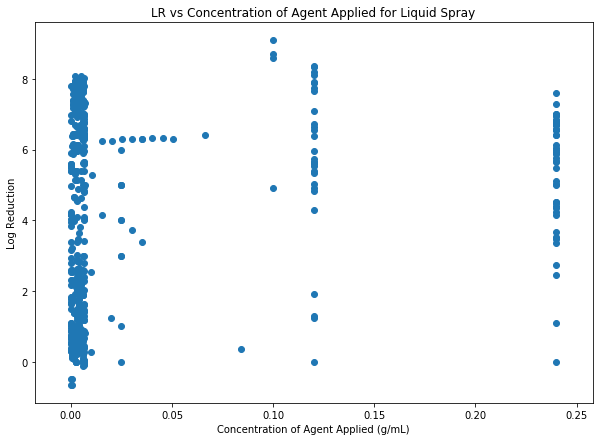

41


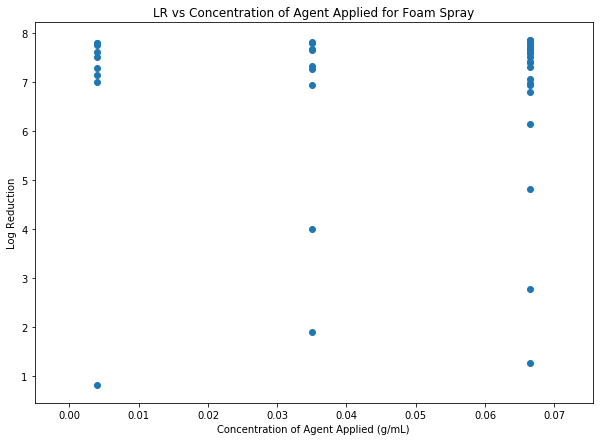

1650


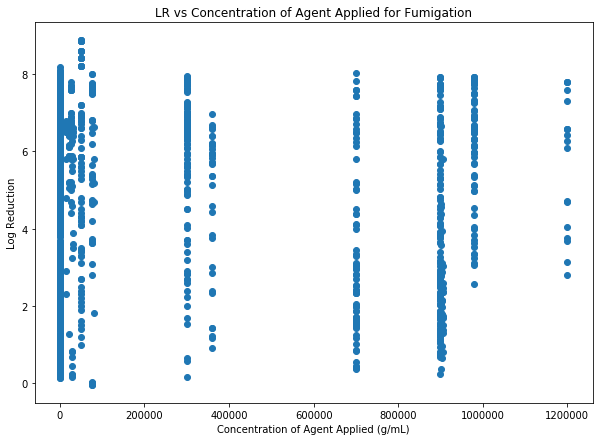

5


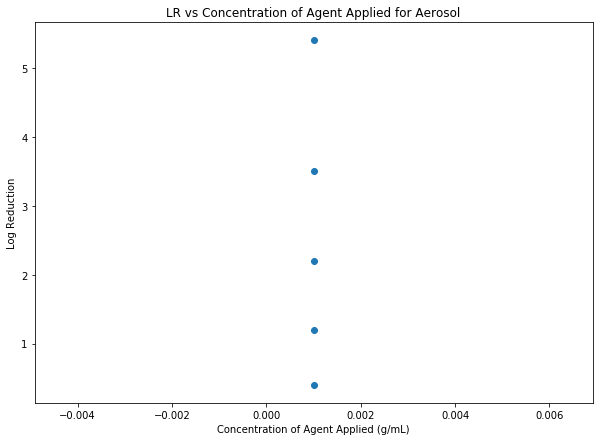

20


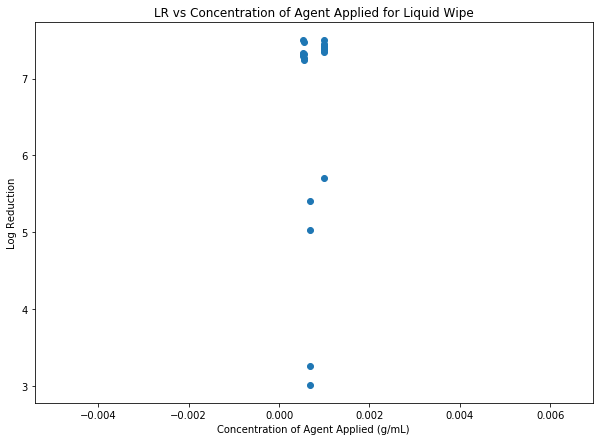

In [38]:
# scatter plots of LR vs VolApp for the surface categories and the application methods
def ConcDoseScatter(parameterColumn, title, columnLabel):
    
    if parameterColumn == 'surfaceCategory':
        valid_data = df[(df['EffMeas'] == 'LR') & (df[columnLabel] == 1) & (df['ConcDose'] == df['ConcDose']) & (df['ConcDoseUn'] == 'g/mL')]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.ConcDose, valid_data.Eff)

            plt.xlabel('Concentration of Agent Applied (g/mL)')
            plt.ylabel('Log Reduction')
        
            plt.title('LR vs Volume of Concentration Applied for ' + title + ' Surfaces')

            plt.show()
    
    elif parameterColumn == 'appMeth':
        valid_data = df[(df['EffMeas'] == 'LR') & (df['ConcDose'] == df['ConcDose']) & (df['ConcDoseUn'] == 'g/mL') & (df['AppMethod'] == columnLabel)]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.ConcDose, valid_data.Eff)

            plt.ylabel('Log Reduction')
            plt.xlabel('Concentration of Agent Applied (g/mL)')

            plt.title('LR vs Concentration of Agent Applied for ' + title)

            plt.show()
        
for p in params:
    ConcDoseScatter(*p)

5


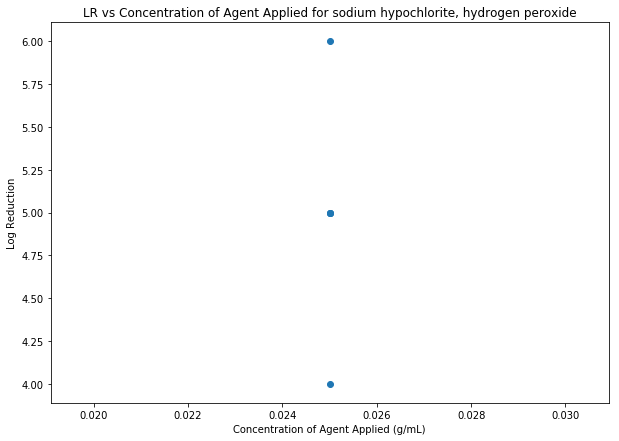

156


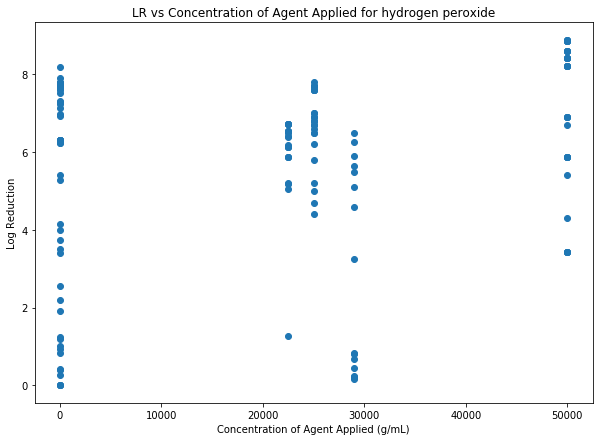

36


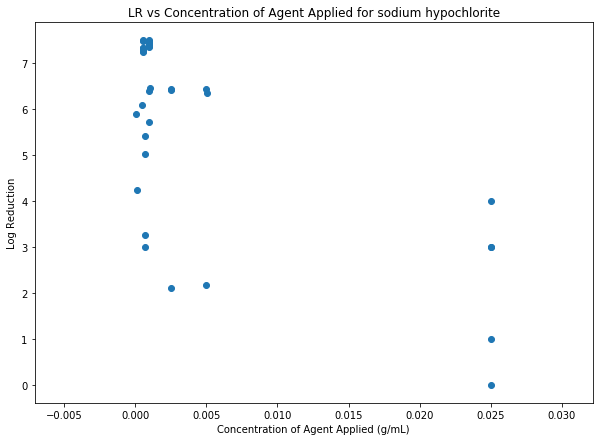

23


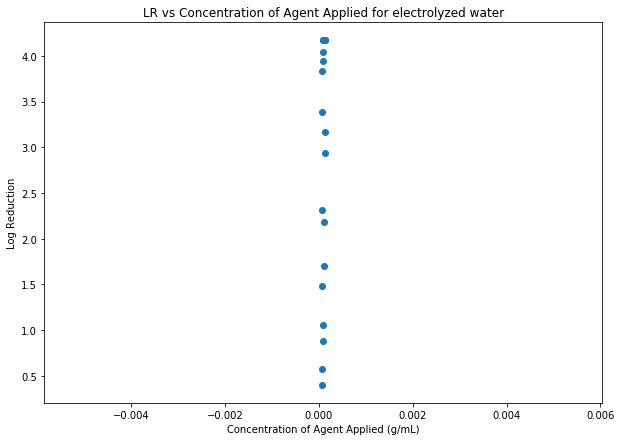

307


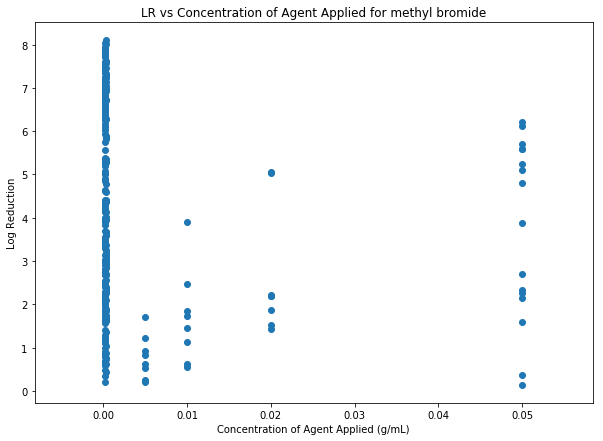

575


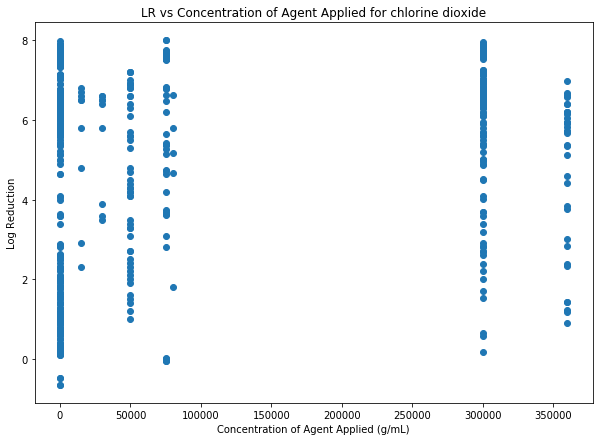

123


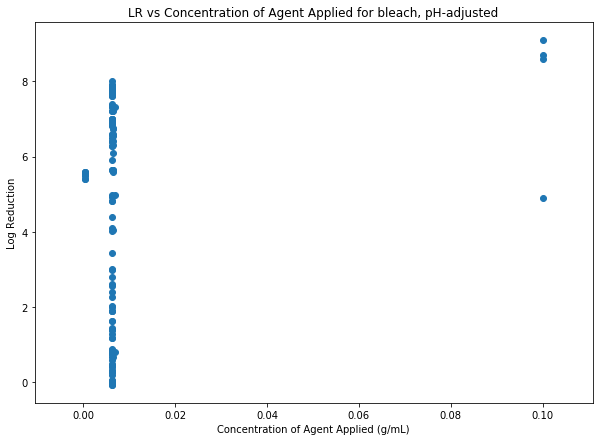

28


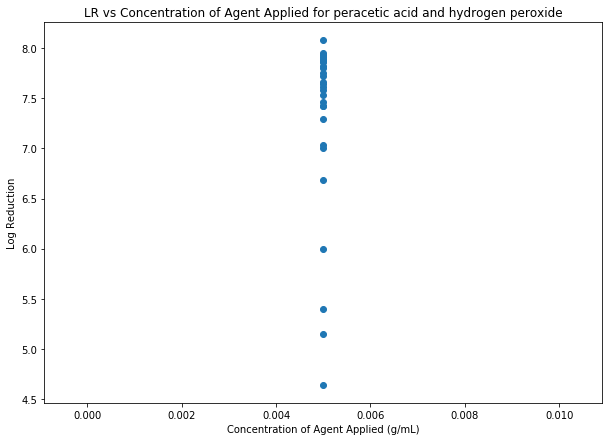

23


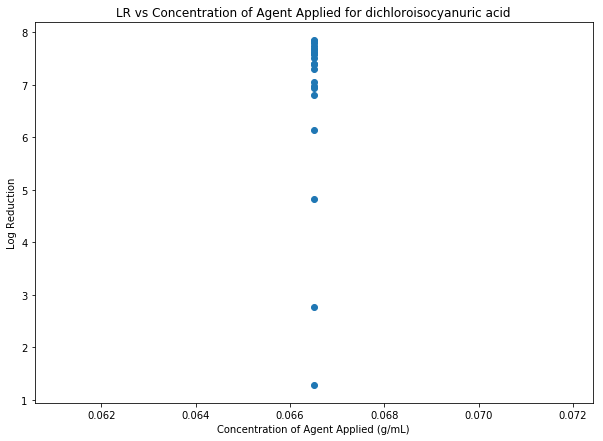

6


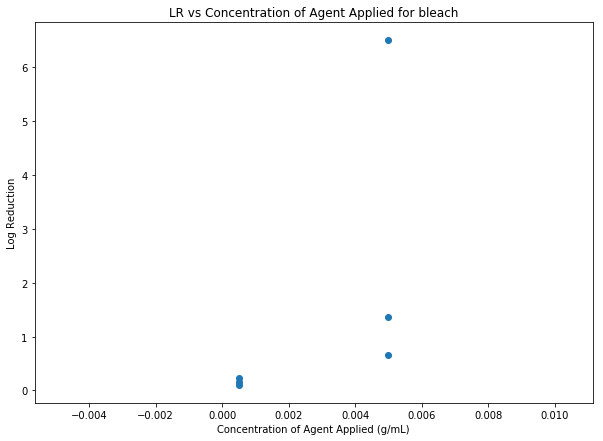

18


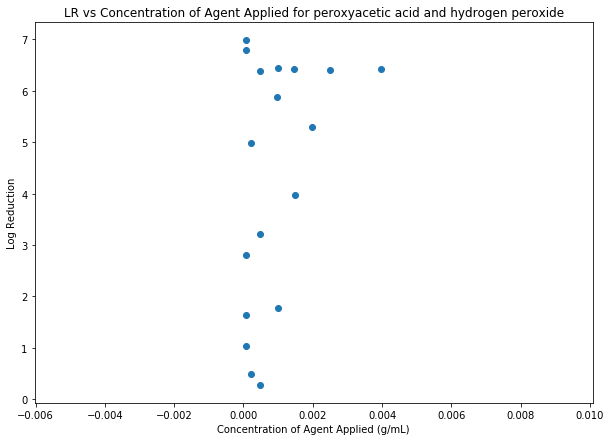

3


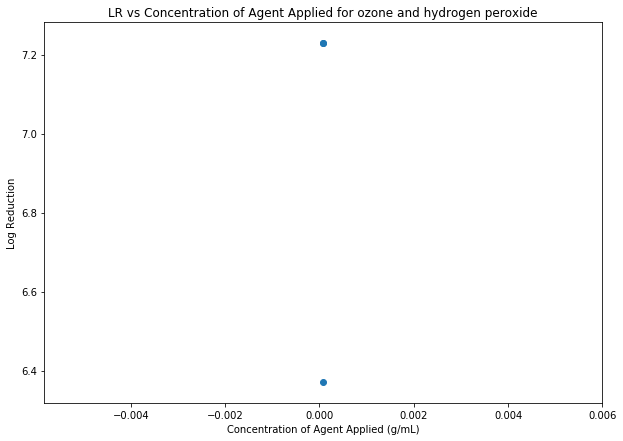

318


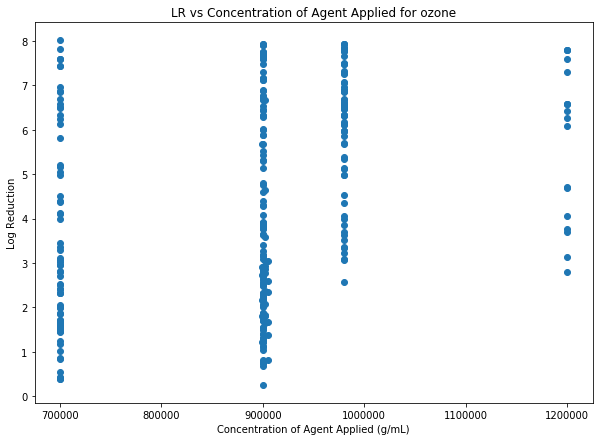

3


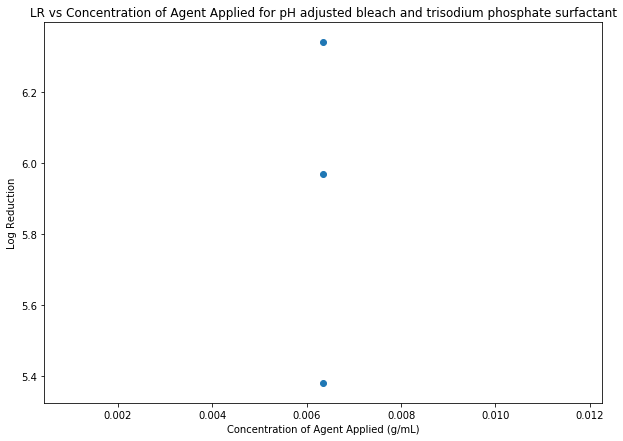

12


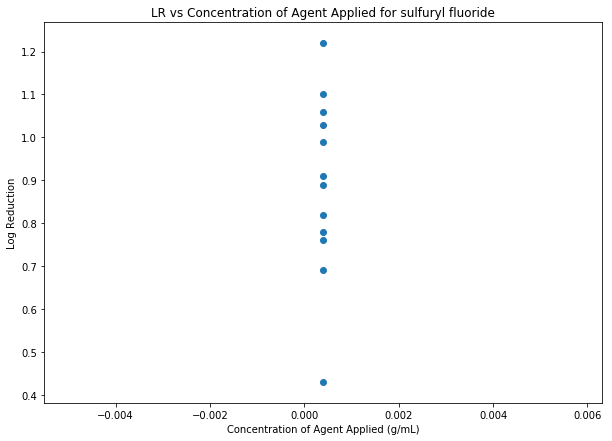

72


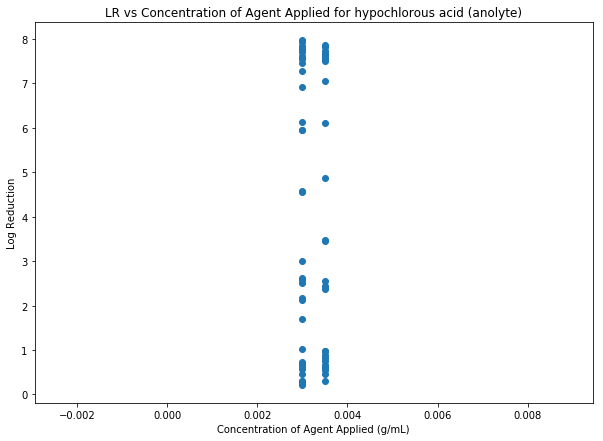

24


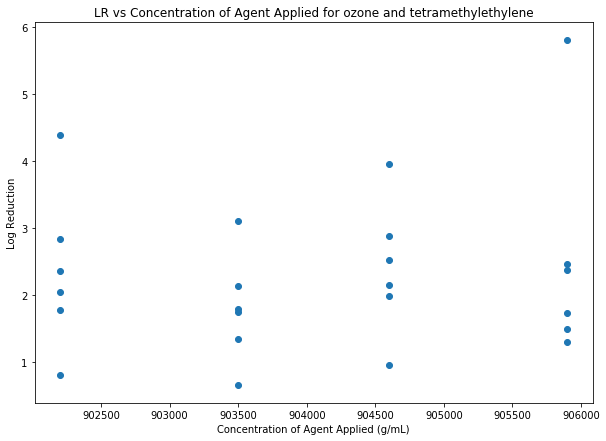

23


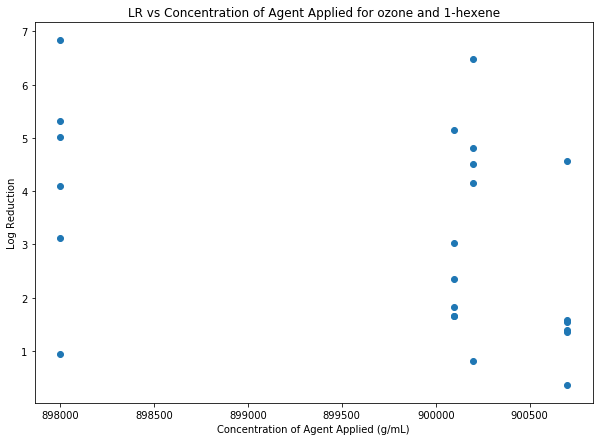

190


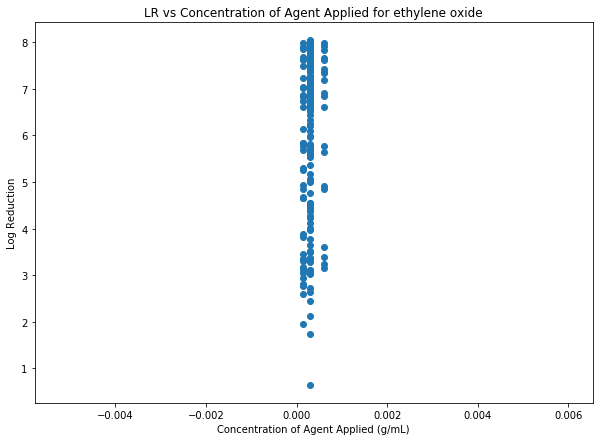

168


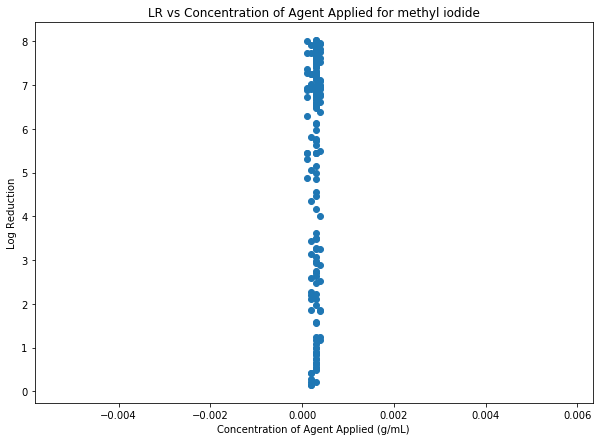

77


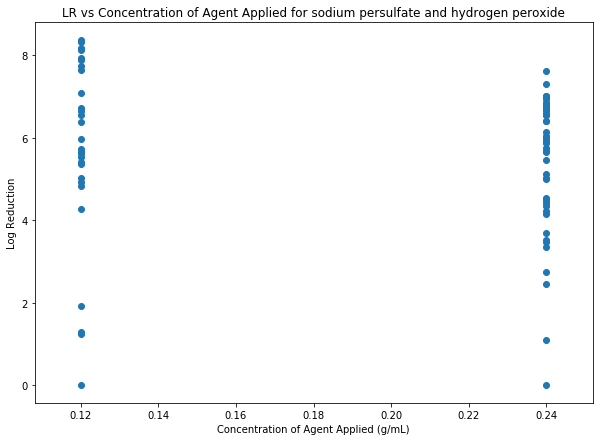

51


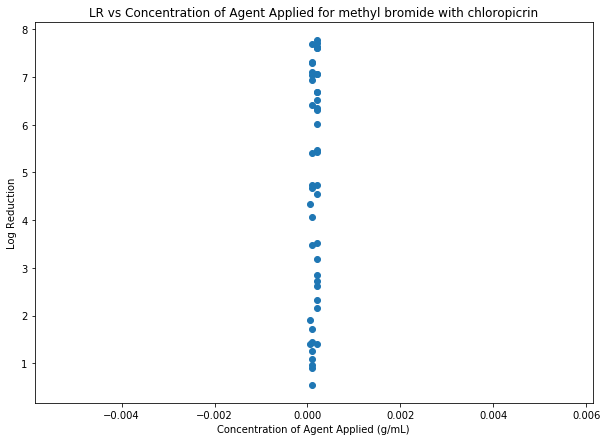

6


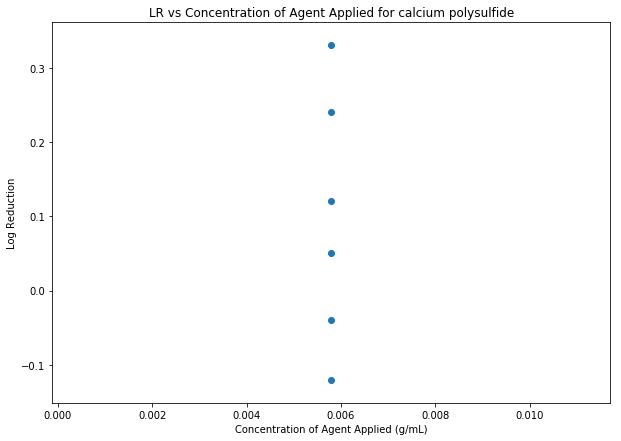

29


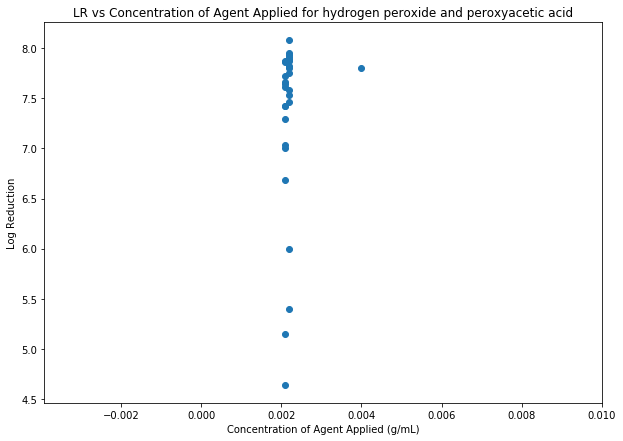

18


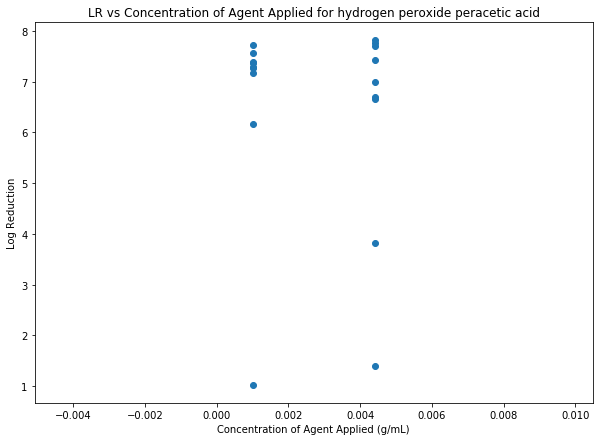

1


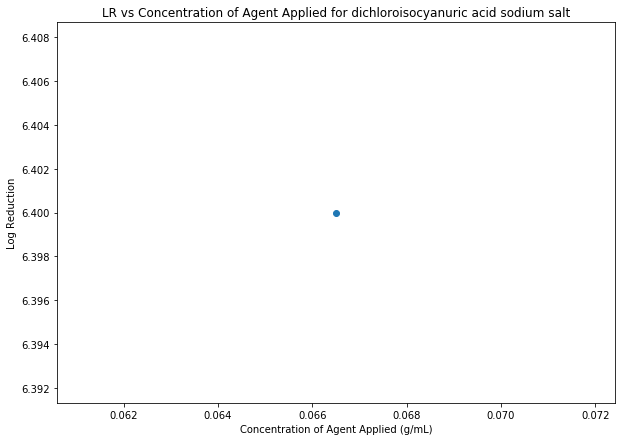

1


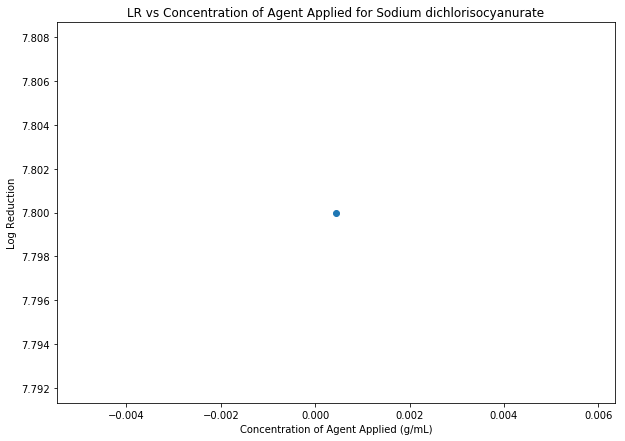

1


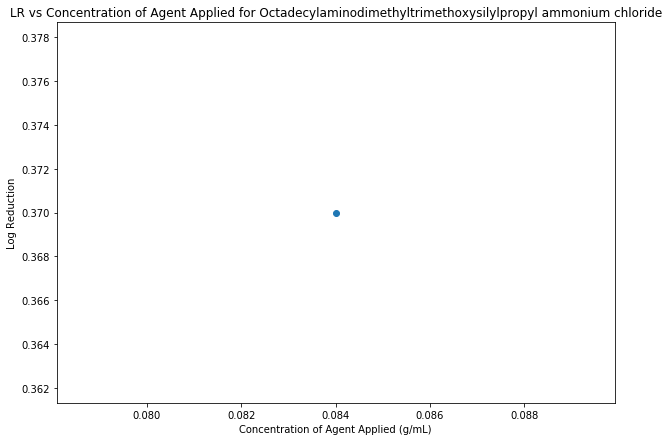

In [39]:
# scatter plots of LR vs ConcDose for all decon agents
for i in deconAgents:

    valid_data = df[(df['EffMeas'] == 'LR') & (df['DeconAgent'] == i) & (df['ConcDose'] == df['ConcDose']) & (df['ConcDoseUn'] == 'g/mL')]
    
    if len(valid_data) > 0:
        print(len(valid_data))
        
        plt.figure(figsize=(10,7))

        plt.scatter(valid_data.ConcDose, valid_data.Eff)

        plt.ylabel('Log Reduction')
        plt.xlabel('Concentration of Agent Applied (g/mL)')

        plt.title('LR vs Concentration of Agent Applied for ' + i)

        plt.show()

161


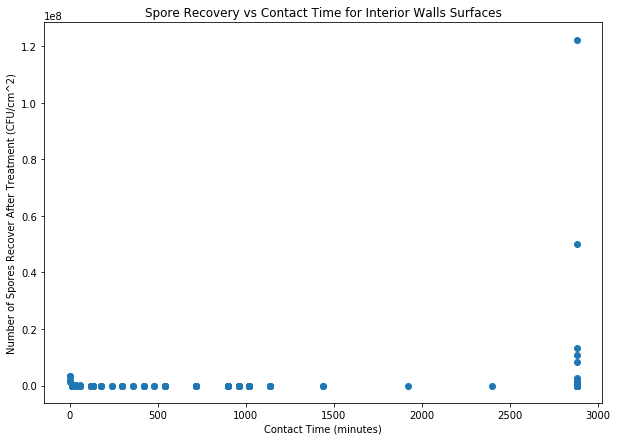

60


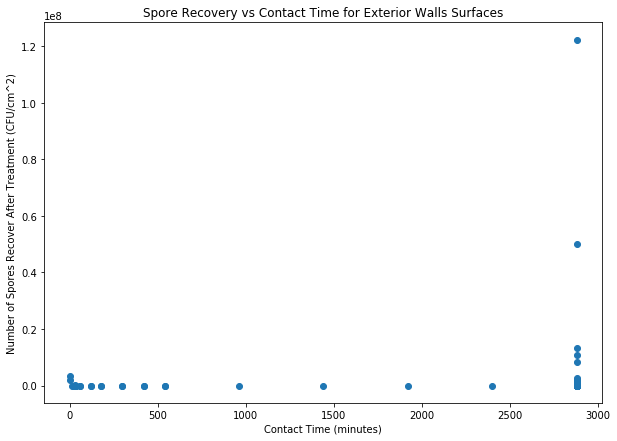

34


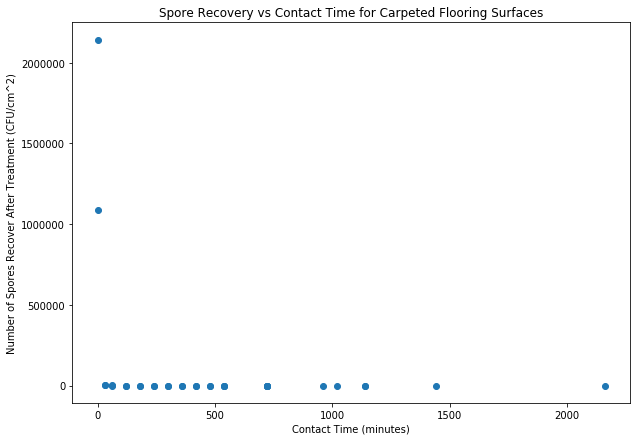

101


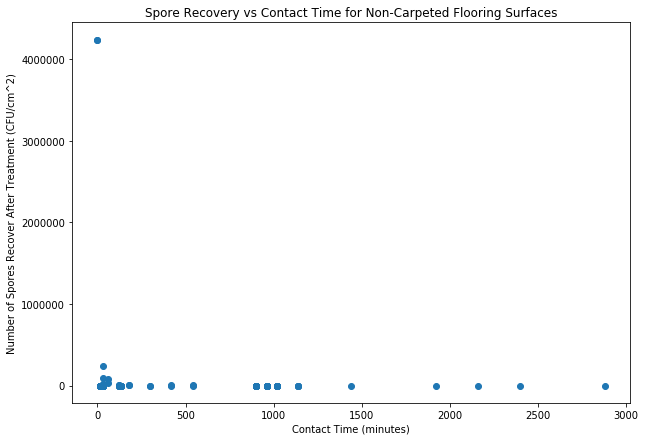

97


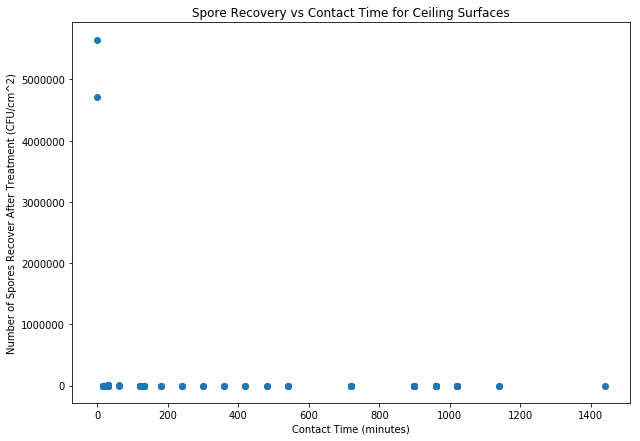

142


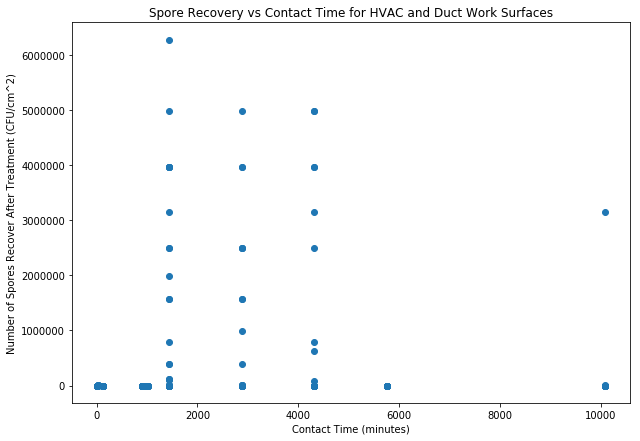

309


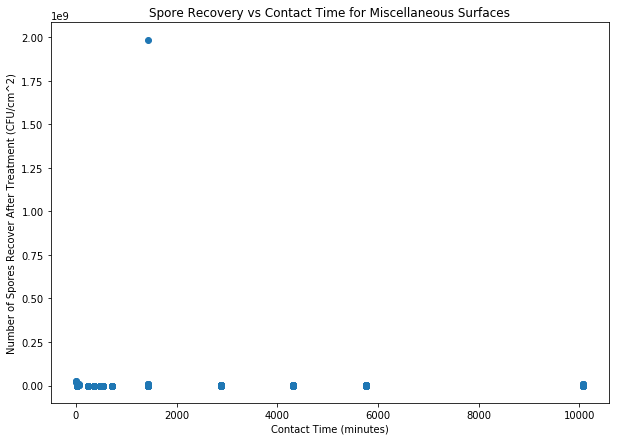

48


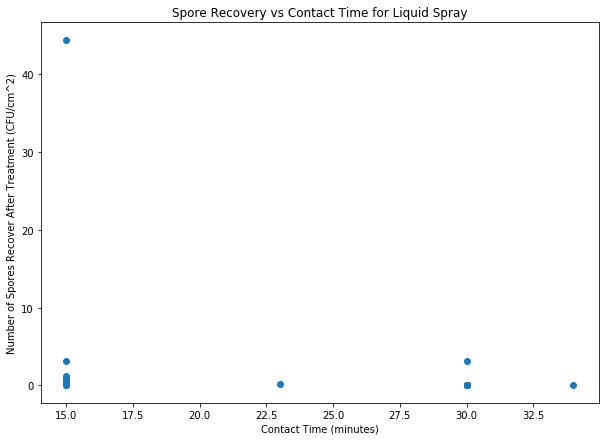

6


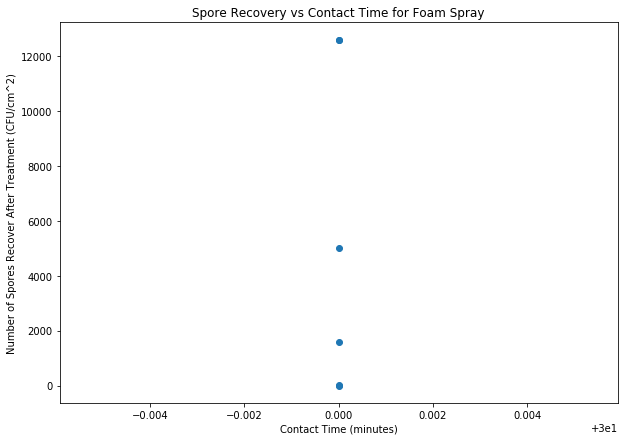

292


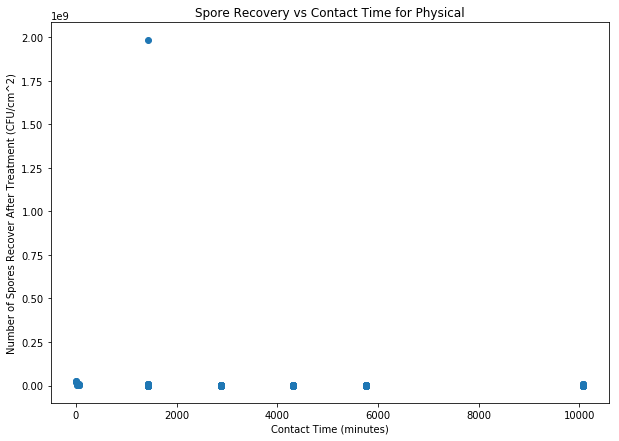

51


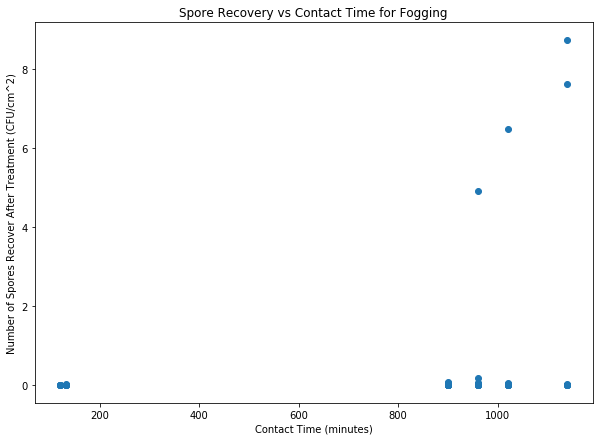

254


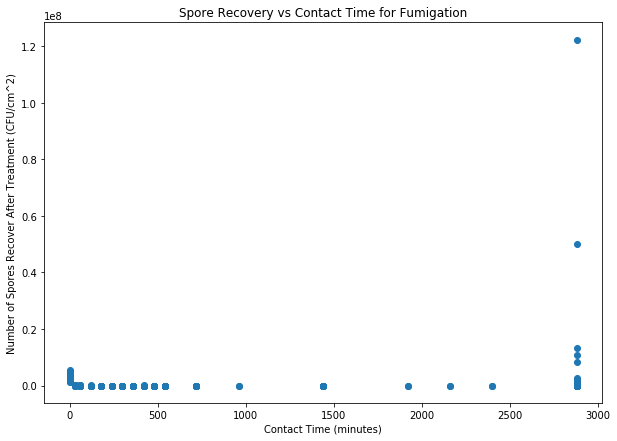

In [42]:
# scatter plots of LR vs Contact Time for the surface categories and the application methods
def ContTimeScatter(parameterColumn, title, columnLabel):
    
    if parameterColumn == 'surfaceCategory':
        valid_data = df[(df['Nt'] == df['Nt']) & (df[columnLabel] == 1) & (df['ContTime'] == df['ContTime']) & (df['LoadingUn'] == 'CFU/cm^2')]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.ContTime, valid_data.Nt)

            plt.xlabel('Contact Time (minutes)')
            plt.ylabel('Number of Spores Recover After Treatment (CFU/cm^2)')
        
            plt.title('Spore Recovery vs Contact Time for ' + title + ' Surfaces')

            plt.show()
    
    elif parameterColumn == 'appMeth':
        valid_data = df[(df['Nt'] == df['Nt']) & (df['ContTime'] == df['ContTime']) & (df['AppMethod'] == columnLabel) & (df['LoadingUn'] == 'CFU/cm^2')]
        
        if len(valid_data) > 0:
            
            print(len(valid_data))
            plt.figure(figsize=(10,7))
            
            plt.scatter(valid_data.ContTime, valid_data.Nt)

            plt.xlabel('Contact Time (minutes)')
            plt.ylabel('Number of Spores Recover After Treatment (CFU/cm^2)')

            plt.title('Spore Recovery vs Contact Time for ' + title)

            plt.show()
        
for p in params:
    ContTimeScatter(*p)

16


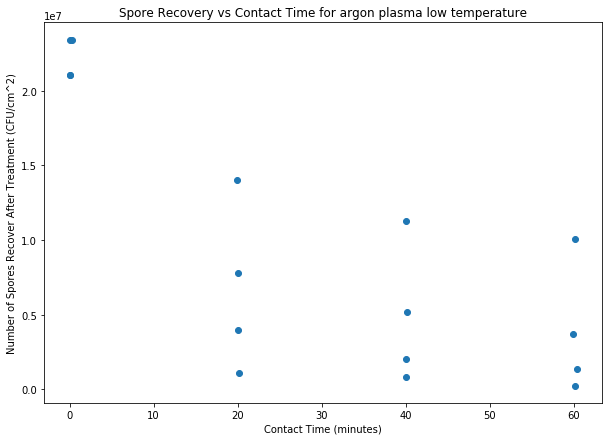

44


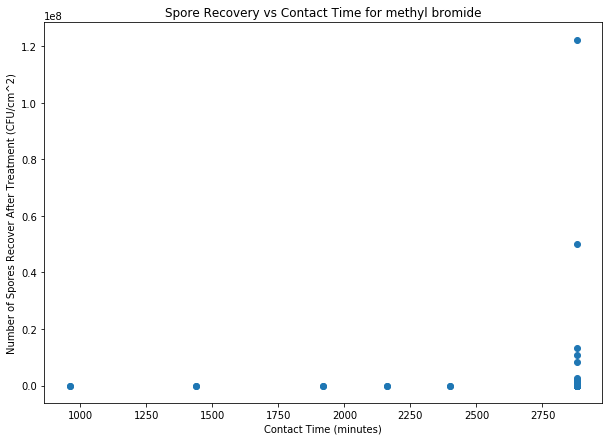

276


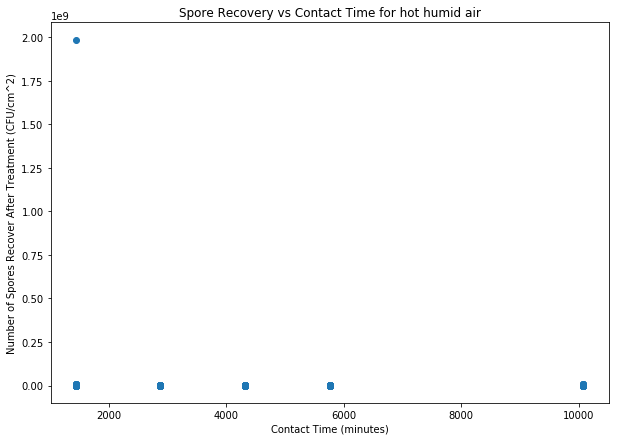

210


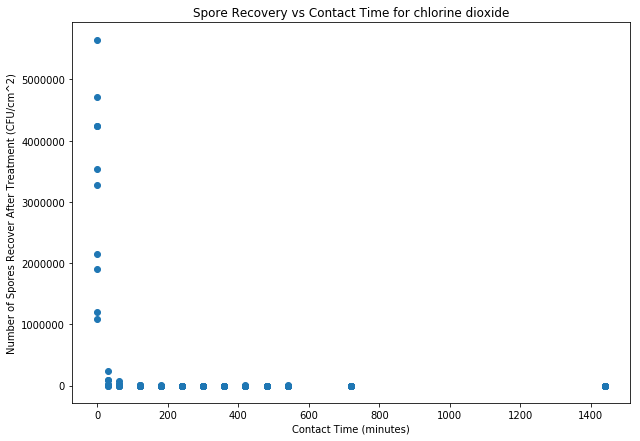

14


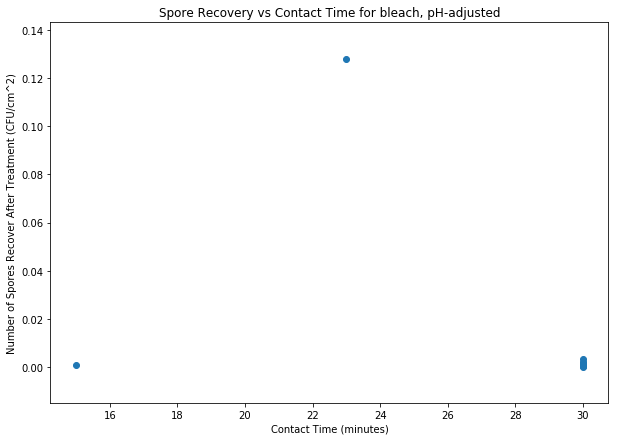

9


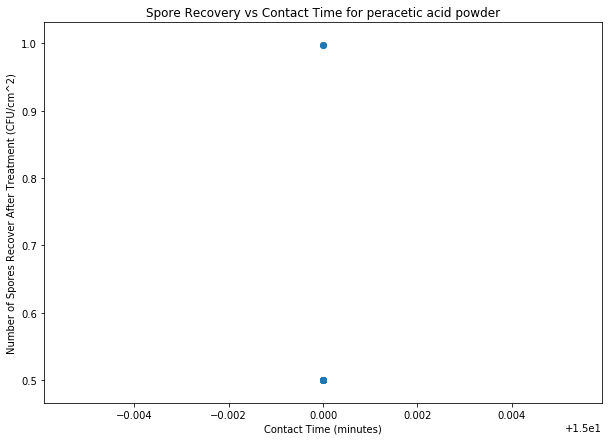

9


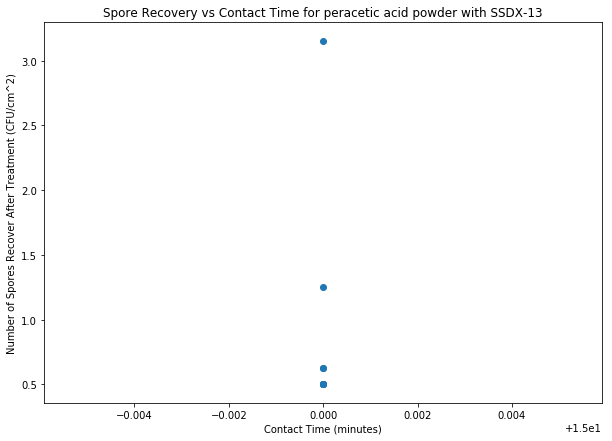

9


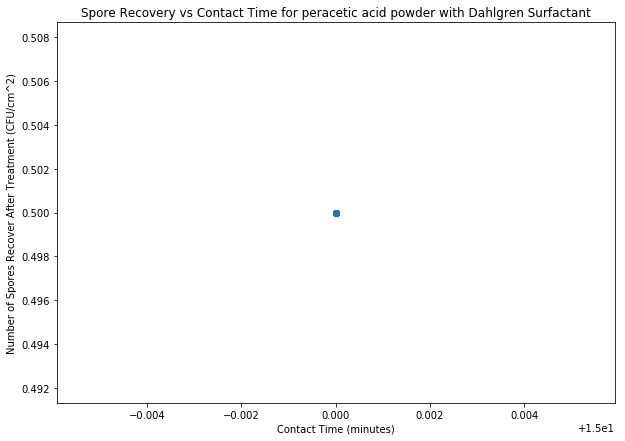

6


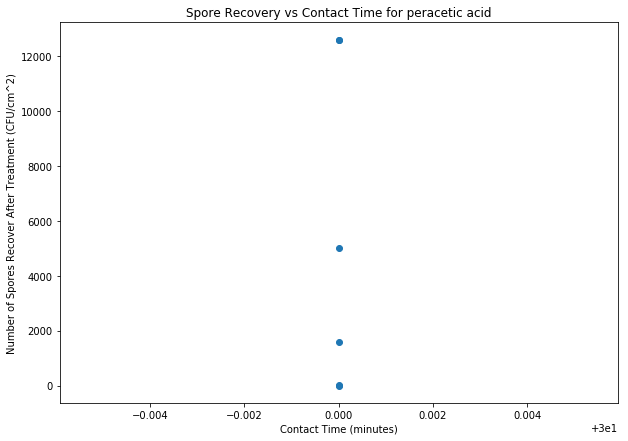

4


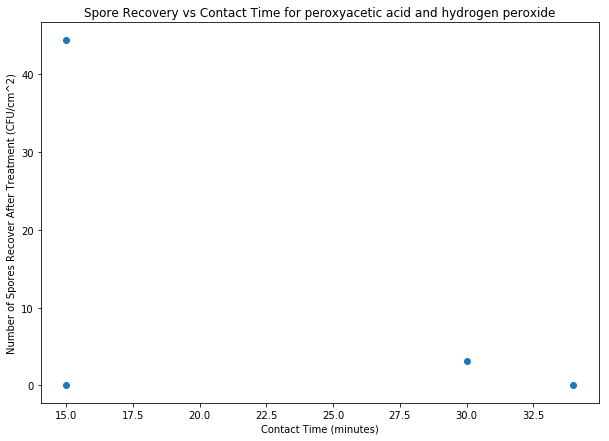

51


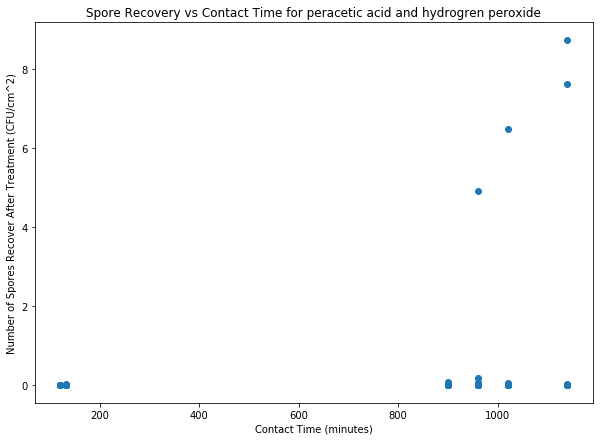

3


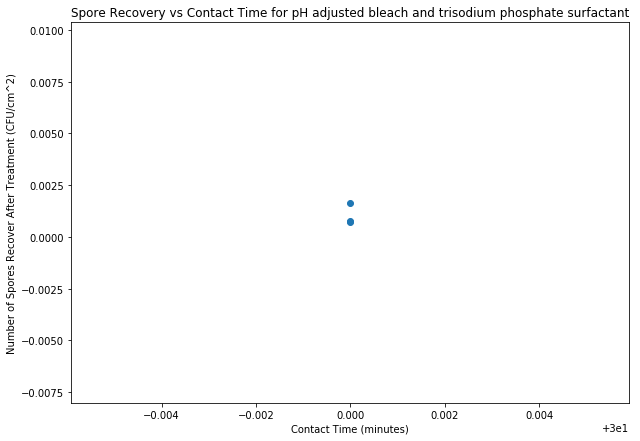

In [43]:
# scatter plots of LR vs Contact Time for all decon agents
for i in deconAgents:

    valid_data = df[(df['LoadingUn'] == 'CFU/cm^2') & (df['DeconAgent'] == i) & (df['ContTime'] == df['ContTime']) & (df['Nt'] == df['Nt'])]
    
    if len(valid_data) > 0:
        print(len(valid_data))
        
        plt.figure(figsize=(10,7))

        plt.scatter(valid_data.ContTime, valid_data.Nt)

        plt.ylabel('Number of Spores Recover After Treatment (CFU/cm^2)')
        plt.xlabel('Contact Time (minutes)')

        plt.title('Spore Recovery vs Contact Time for ' + i)

        plt.show()

44


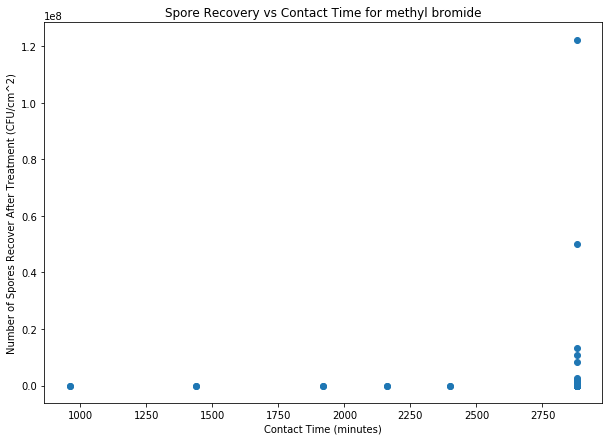

210


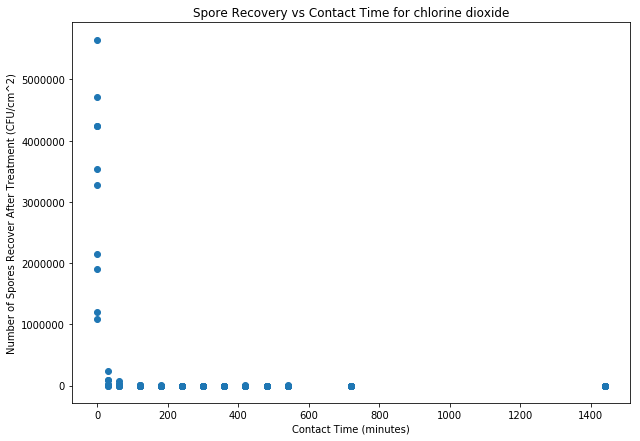

In [6]:
# scatter plots of LR vs Contact Time for all decon agents
for i in deconAgents:

    valid_data = df[(df['LoadingUn'] == 'CFU/cm^2') & (df['DeconAgent'] == i) & 
                    (df['ContTime'] == df['ContTime']) & (df['Nt'] == df['Nt']) &
                   (df['AppMethod'] == 'fumigation')]
    
    if len(valid_data) > 0:
        print(len(valid_data))
        
        plt.figure(figsize=(10,7))

        plt.scatter(valid_data.ContTime, valid_data.Nt)

        plt.ylabel('Number of Spores Recover After Treatment (CFU/cm^2)')
        plt.xlabel('Contact Time (minutes)')

        plt.title('Spore Recovery vs Contact Time for ' + i)

        plt.show()

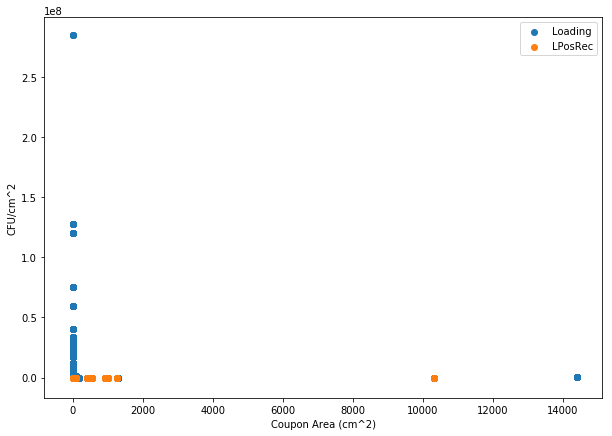

In [6]:
this = df.query('LoadingUn == "CFU/cm^2" & AreaUn == "cm^2"')

plt.figure(figsize=(10,7))

plt.scatter(this.Area, this.Loading)
plt.scatter(this.Area, this.LPosRec)

plt.ylabel('CFU/cm^2')
plt.xlabel('Coupon Area (cm^2)')

plt.legend()

plt.show()

In [5]:
surfaceCats = ['IndoorInterior', 'IndoorExterior', 'IndoorCarpet', 'IndoorNonCarpet', 'IndoorCeilings', 'HVAC','IndoorMisc', 
               'OutdoorExterior', 'Roofing', 'Pavement', 'Water', 'Soil', 'OutdoorMisc', 'UndergroundInterior', 
               'UndergroundCarpet', 'UndergroundNonCarpet', 'UndergroundCeilings', 'UndergroundMisc']

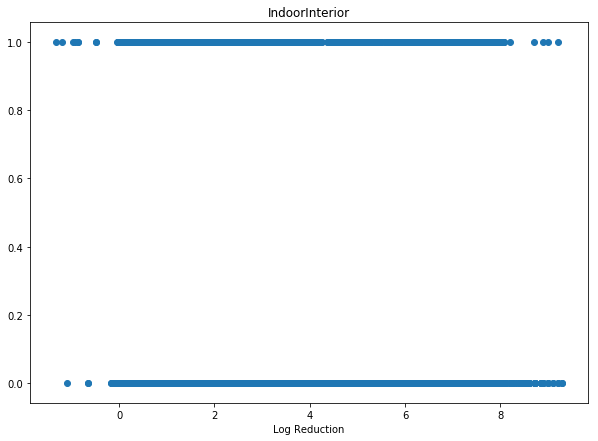

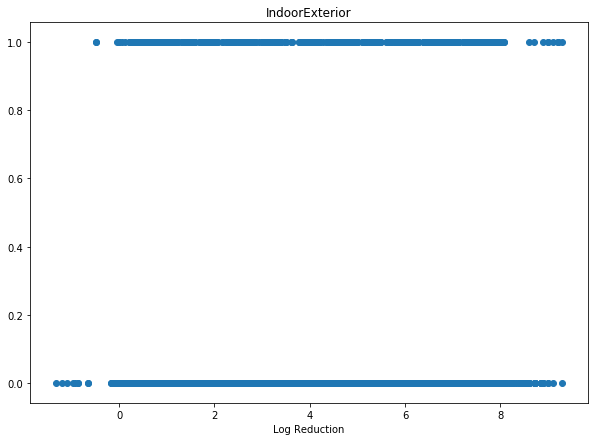

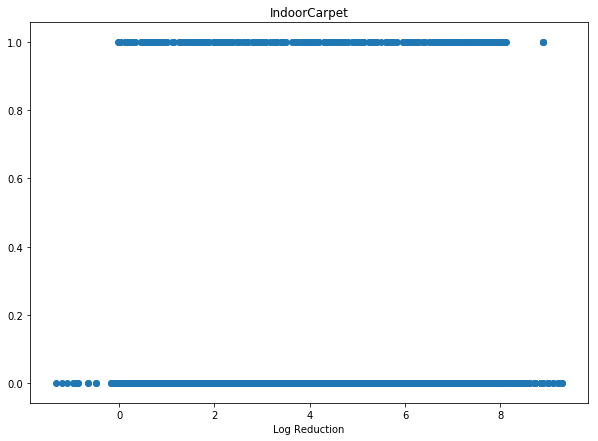

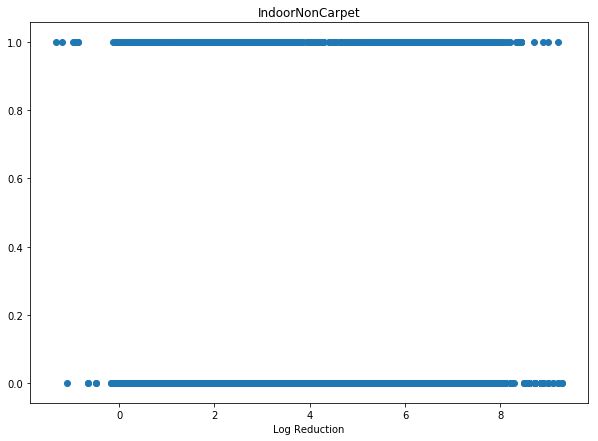

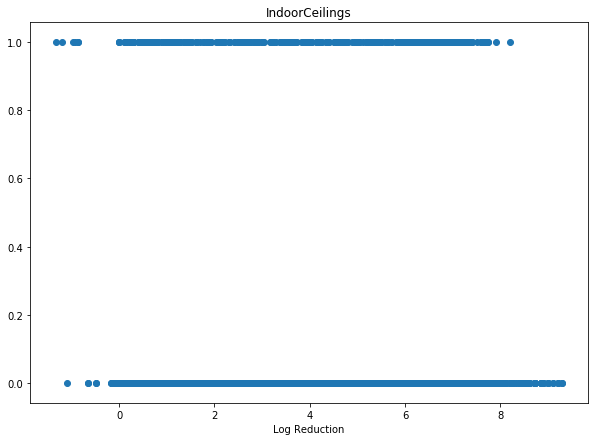

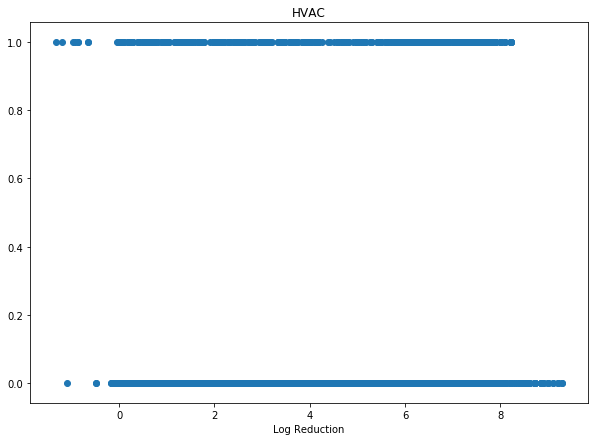

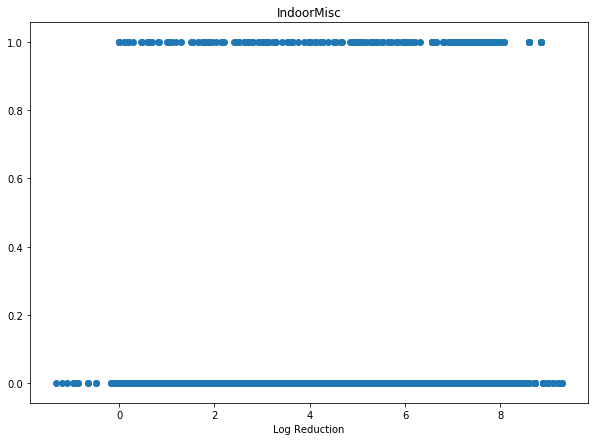

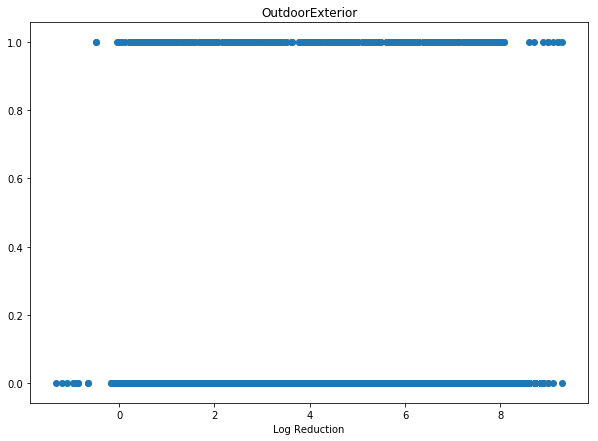

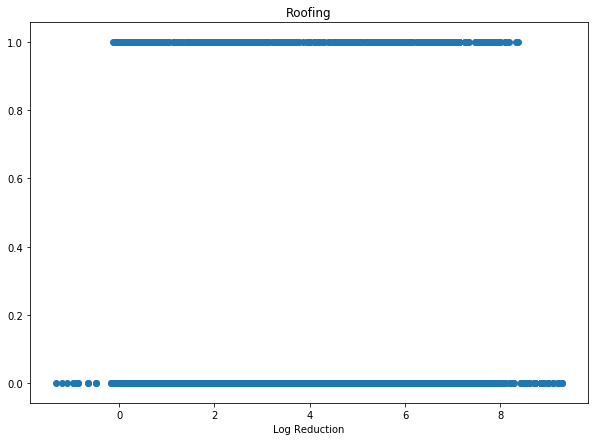

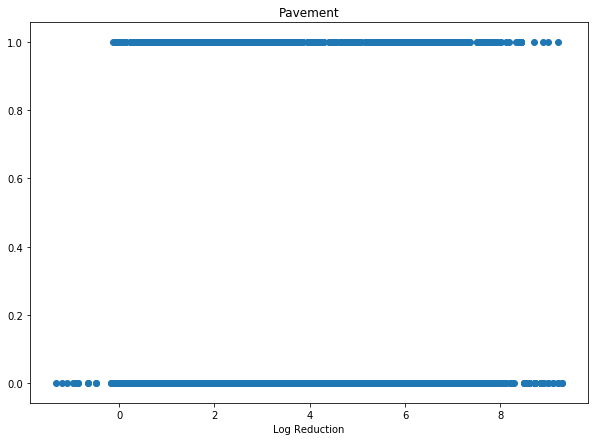

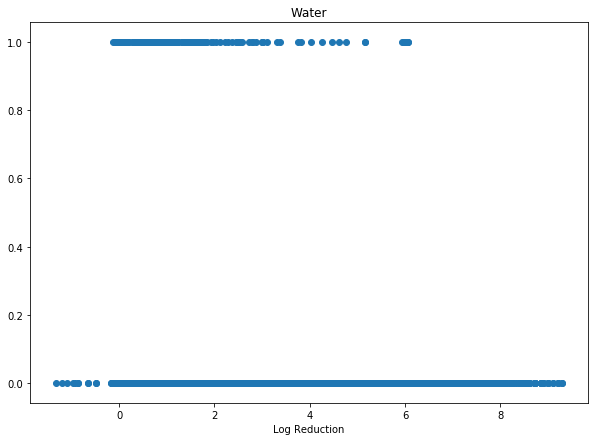

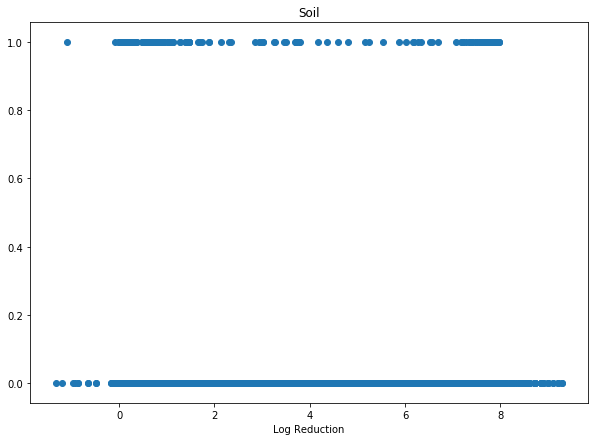

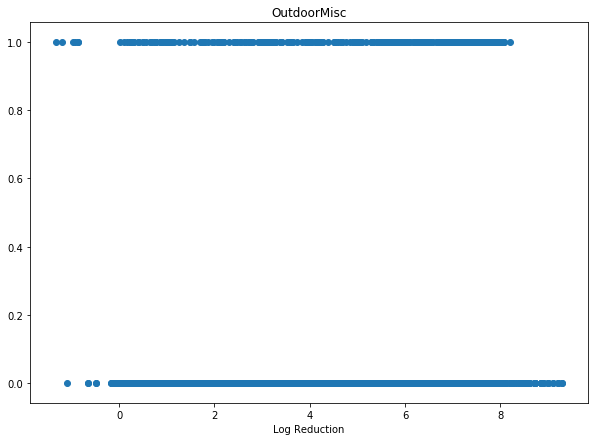

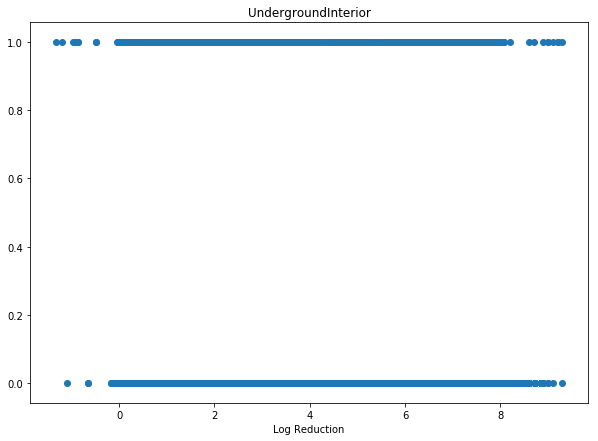

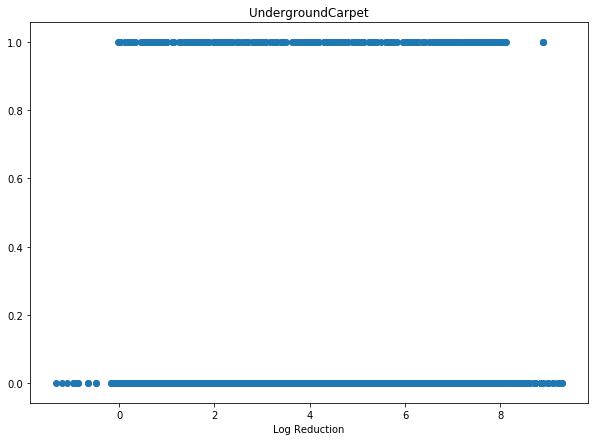

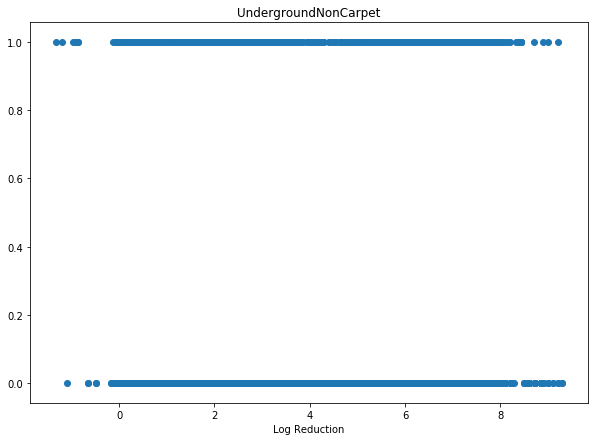

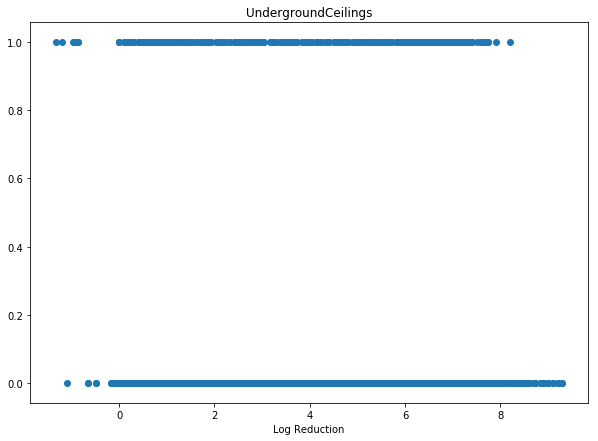

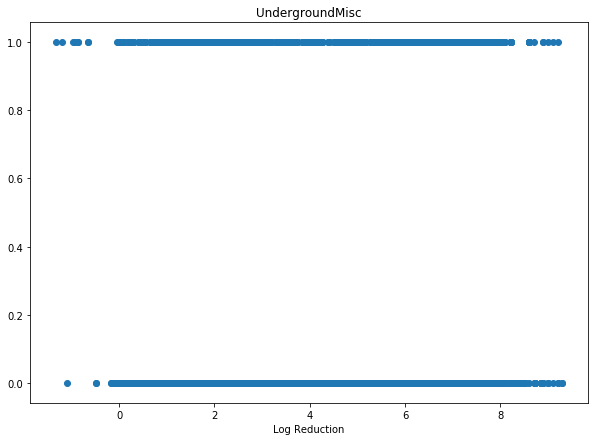

In [9]:
for surface in surfaceCats:
    data = df[(df['EffMeas'] == 'LR')]
    
    plt.figure(figsize=(10,7))

    plt.scatter(data.Eff, data[surface])

    plt.xlabel('Log Reduction')

    plt.title(surface)
    
    plt.show()